# Performance of Random Swap

In [1]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline, ModelType

## Download datasets

In [2]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Augment and Concatenate Dataset to enlarge it

In [3]:
# Augment by 5%, 10%, and 20%
percentage= {
    MODE.RANDOM.SWAP: 0.05,
}
augmented_random_5_SUB = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.SWAP: 0.10,
}
augmented_random_10_SUB = augment_data(original_train_data,  percentage)
percentage= {
    MODE.RANDOM.SWAP: 0.20,
}
augmented_random_20_SUB = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.SWAP: 0.50,
}
augmented_random_50_SUB = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.SWAP: 1.00,
}
augmented_random_100_SUB = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.SWAP: 2.00,
}
augmented_random_200_SUB = augment_data(original_train_data, percentage)

# Convert augmented data into Datasets
augmented_random_5_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_5_SUB],
    "label": [item["label"] for item in augmented_random_5_SUB]
}, features=features)

augmented_random_10_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_10_SUB],
    "label": [item["label"] for item in augmented_random_10_SUB]
}, features=features)

augmented_random_20_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_20_SUB],
    "label": [item["label"] for item in augmented_random_20_SUB]
}, features=features)

augmented_random_50_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_50_SUB],
    "label": [item["label"] for item in augmented_random_50_SUB]
}, features=features)

augmented_random_100_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_100_SUB],
    "label": [item["label"] for item in augmented_random_100_SUB]
}, features=features)

augmented_random_200_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_200_SUB],
    "label": [item["label"] for item in augmented_random_200_SUB]
}, features=features)

# Concatenate original and augmented datasets
augmented_random_train_data_5 = concatenate_datasets([original_train_data, augmented_random_5_SUB_dataset])
augmented_random_train_data_10 = concatenate_datasets([original_train_data, augmented_random_10_SUB_dataset])
augmented_random_train_data_20 = concatenate_datasets([original_train_data, augmented_random_20_SUB_dataset])
augmented_random_train_data_50 = concatenate_datasets([original_train_data, augmented_random_50_SUB_dataset])
augmented_random_train_data_100 = concatenate_datasets([original_train_data, augmented_random_100_SUB_dataset])
augmented_random_train_data_200 = concatenate_datasets([original_train_data, augmented_random_200_SUB_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% augmentation: {len(augmented_random_train_data_5)}")
print(f"Train size after 10% augmentation: {len(augmented_random_train_data_10)}")
print(f"Train size after 20% augmentation: {len(augmented_random_train_data_20)}")
print(f"Train size after 50% augmentation: {len(augmented_random_train_data_50)}")
print(f"Train size after 100% augmentation: {len(augmented_random_train_data_100)}")
print(f"Train size after 200% augmentation: {len(augmented_random_train_data_200)}")

Original train size: 8530
Train size after 5% augmentation: 8956
Train size after 10% augmentation: 9382
Train size after 20% augmentation: 10235
Train size after 50% augmentation: 12794
Train size after 100% augmentation: 17058
Train size after 200% augmentation: 25586


## Build and Train Pipeline - RNN Max Pooling

In [4]:
pipeline_random_5= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_10 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_20 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_50 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_100 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_200 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_200, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [5]:
pipeline_random_5.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.65it/s]


Epoch: 1/10
Train Loss: 0.674, Train Acc: 0.602
Valid Loss: 0.635, Valid Acc: 0.668


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.08it/s]


Epoch: 2/10
Train Loss: 0.599, Train Acc: 0.705
Valid Loss: 0.578, Valid Acc: 0.722


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.30it/s]


Epoch: 3/10
Train Loss: 0.554, Train Acc: 0.753
Valid Loss: 0.574, Valid Acc: 0.725


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.27it/s]


Epoch: 4/10
Train Loss: 0.533, Train Acc: 0.775
Valid Loss: 0.561, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.36it/s]


Epoch: 5/10
Train Loss: 0.511, Train Acc: 0.801
Valid Loss: 0.562, Valid Acc: 0.733


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.27it/s]


Epoch: 6/10
Train Loss: 0.494, Train Acc: 0.818
Valid Loss: 0.554, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.44it/s]


Epoch: 7/10
Train Loss: 0.478, Train Acc: 0.836
Valid Loss: 0.565, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.27it/s]


Epoch: 8/10
Train Loss: 0.466, Train Acc: 0.852
Valid Loss: 0.553, Valid Acc: 0.742


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.51it/s]


Epoch: 9/10
Train Loss: 0.450, Train Acc: 0.867
Valid Loss: 0.551, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.19it/s]

Epoch: 10/10
Train Loss: 0.441, Train Acc: 0.875
Valid Loss: 0.551, Valid Acc: 0.745


In [6]:
pipeline_random_10.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.62it/s]


Epoch: 1/10
Train Loss: 0.673, Train Acc: 0.604
Valid Loss: 0.639, Valid Acc: 0.654


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.84it/s]


Epoch: 2/10
Train Loss: 0.594, Train Acc: 0.714
Valid Loss: 0.583, Valid Acc: 0.711


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.16it/s]


Epoch: 3/10
Train Loss: 0.556, Train Acc: 0.753
Valid Loss: 0.578, Valid Acc: 0.723


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]


Epoch: 4/10
Train Loss: 0.526, Train Acc: 0.785
Valid Loss: 0.564, Valid Acc: 0.731


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.06it/s]


Epoch: 5/10
Train Loss: 0.503, Train Acc: 0.809
Valid Loss: 0.555, Valid Acc: 0.737


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]


Epoch: 6/10
Train Loss: 0.486, Train Acc: 0.827
Valid Loss: 0.554, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]


Epoch: 7/10
Train Loss: 0.473, Train Acc: 0.843
Valid Loss: 0.542, Valid Acc: 0.758


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.98it/s]


Epoch: 8/10
Train Loss: 0.461, Train Acc: 0.855
Valid Loss: 0.550, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]


Epoch: 9/10
Train Loss: 0.446, Train Acc: 0.871
Valid Loss: 0.537, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.93it/s]

Epoch: 10/10
Train Loss: 0.433, Train Acc: 0.886
Valid Loss: 0.537, Valid Acc: 0.759


In [7]:
pipeline_random_20.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]


Epoch: 1/10
Train Loss: 0.667, Train Acc: 0.627
Valid Loss: 0.636, Valid Acc: 0.664


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]


Epoch: 2/10
Train Loss: 0.597, Train Acc: 0.710
Valid Loss: 0.575, Valid Acc: 0.727


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]


Epoch: 3/10
Train Loss: 0.543, Train Acc: 0.770
Valid Loss: 0.551, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]


Epoch: 4/10
Train Loss: 0.514, Train Acc: 0.795
Valid Loss: 0.542, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]


Epoch: 5/10
Train Loss: 0.491, Train Acc: 0.823
Valid Loss: 0.551, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]


Epoch: 6/10
Train Loss: 0.473, Train Acc: 0.840
Valid Loss: 0.535, Valid Acc: 0.767


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]


Epoch: 7/10
Train Loss: 0.456, Train Acc: 0.856
Valid Loss: 0.544, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]


Epoch: 8/10
Train Loss: 0.441, Train Acc: 0.877
Valid Loss: 0.528, Valid Acc: 0.779


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]


Epoch: 9/10
Train Loss: 0.430, Train Acc: 0.885
Valid Loss: 0.534, Valid Acc: 0.768


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]

Epoch: 10/10
Train Loss: 0.422, Train Acc: 0.895
Valid Loss: 0.538, Valid Acc: 0.768


In [8]:
pipeline_random_50.train_model(n_epochs=10)

evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.24it/s]


Epoch: 1/10
Train Loss: 0.654, Train Acc: 0.627
Valid Loss: 0.601, Valid Acc: 0.721


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.42it/s]


Epoch: 2/10
Train Loss: 0.570, Train Acc: 0.739
Valid Loss: 0.553, Valid Acc: 0.753


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.24it/s]


Epoch: 3/10
Train Loss: 0.524, Train Acc: 0.787
Valid Loss: 0.553, Valid Acc: 0.746


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.52it/s]


Epoch: 4/10
Train Loss: 0.501, Train Acc: 0.815
Valid Loss: 0.547, Valid Acc: 0.750


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]


Epoch: 5/10
Train Loss: 0.479, Train Acc: 0.836
Valid Loss: 0.508, Valid Acc: 0.803


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.55it/s]


Epoch: 6/10
Train Loss: 0.451, Train Acc: 0.867
Valid Loss: 0.497, Valid Acc: 0.812


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]


Epoch: 7/10
Train Loss: 0.434, Train Acc: 0.884
Valid Loss: 0.492, Valid Acc: 0.820


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]


Epoch: 8/10
Train Loss: 0.420, Train Acc: 0.898
Valid Loss: 0.488, Valid Acc: 0.825


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.72it/s]


Epoch: 9/10
Train Loss: 0.411, Train Acc: 0.909
Valid Loss: 0.482, Valid Acc: 0.830


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

Epoch: 10/10
Train Loss: 0.401, Train Acc: 0.917
Valid Loss: 0.481, Valid Acc: 0.828


In [9]:
pipeline_random_100.train_model(n_epochs=10)

evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


Epoch: 1/10
Train Loss: 0.653, Train Acc: 0.652
Valid Loss: 0.608, Valid Acc: 0.706


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.61it/s]


Epoch: 2/10
Train Loss: 0.561, Train Acc: 0.751
Valid Loss: 0.548, Valid Acc: 0.760


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.48it/s]


Epoch: 3/10
Train Loss: 0.510, Train Acc: 0.803
Valid Loss: 0.522, Valid Acc: 0.783


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.61it/s]


Epoch: 4/10
Train Loss: 0.479, Train Acc: 0.835
Valid Loss: 0.507, Valid Acc: 0.797


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.71it/s]


Epoch: 5/10
Train Loss: 0.453, Train Acc: 0.864
Valid Loss: 0.492, Valid Acc: 0.813


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.90it/s]


Epoch: 6/10
Train Loss: 0.430, Train Acc: 0.887
Valid Loss: 0.480, Valid Acc: 0.833


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.15it/s]


Epoch: 7/10
Train Loss: 0.415, Train Acc: 0.903
Valid Loss: 0.471, Valid Acc: 0.840


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.89it/s]


Epoch: 8/10
Train Loss: 0.400, Train Acc: 0.918
Valid Loss: 0.465, Valid Acc: 0.845


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.22it/s]


Epoch: 9/10
Train Loss: 0.390, Train Acc: 0.927
Valid Loss: 0.480, Valid Acc: 0.829


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.21it/s]

Epoch: 10/10
Train Loss: 0.387, Train Acc: 0.931
Valid Loss: 0.462, Valid Acc: 0.849


In [10]:
pipeline_random_200.train_model(n_epochs=10)

evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.34it/s]


Epoch: 1/10
Train Loss: 0.616, Train Acc: 0.692
Valid Loss: 0.558, Valid Acc: 0.746


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.55it/s]


Epoch: 2/10
Train Loss: 0.518, Train Acc: 0.793
Valid Loss: 0.512, Valid Acc: 0.799


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]


Epoch: 3/10
Train Loss: 0.469, Train Acc: 0.845
Valid Loss: 0.479, Valid Acc: 0.835


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.61it/s]


Epoch: 4/10
Train Loss: 0.434, Train Acc: 0.881
Valid Loss: 0.458, Valid Acc: 0.853


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.03it/s]


Epoch: 5/10
Train Loss: 0.408, Train Acc: 0.908
Valid Loss: 0.431, Valid Acc: 0.884


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]


Epoch: 6/10
Train Loss: 0.392, Train Acc: 0.925
Valid Loss: 0.420, Valid Acc: 0.898


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.17it/s]


Epoch: 7/10
Train Loss: 0.382, Train Acc: 0.935
Valid Loss: 0.419, Valid Acc: 0.898


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]


Epoch: 8/10
Train Loss: 0.376, Train Acc: 0.941
Valid Loss: 0.407, Valid Acc: 0.908


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.56it/s]


Epoch: 9/10
Train Loss: 0.370, Train Acc: 0.945
Valid Loss: 0.403, Valid Acc: 0.912


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.56it/s]

Epoch: 10/10
Train Loss: 0.368, Train Acc: 0.948
Valid Loss: 0.413, Valid Acc: 0.900


### Accuracy and Loss Plots

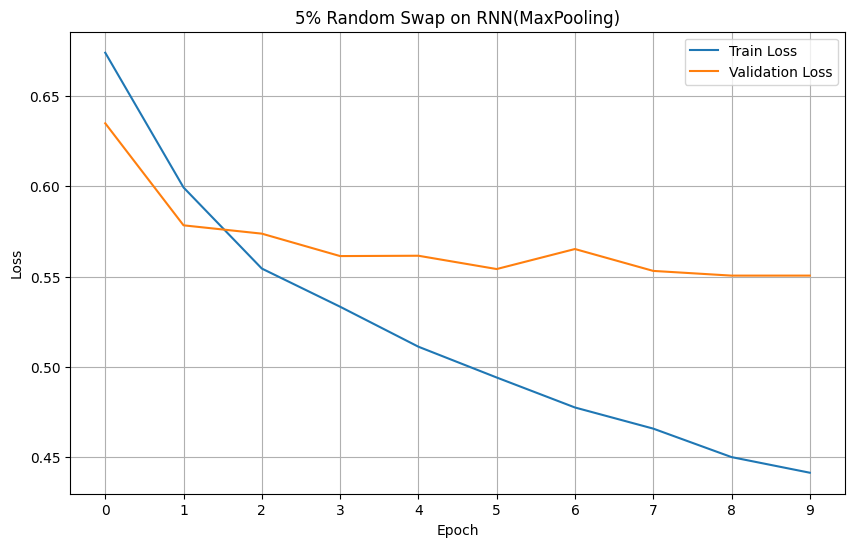

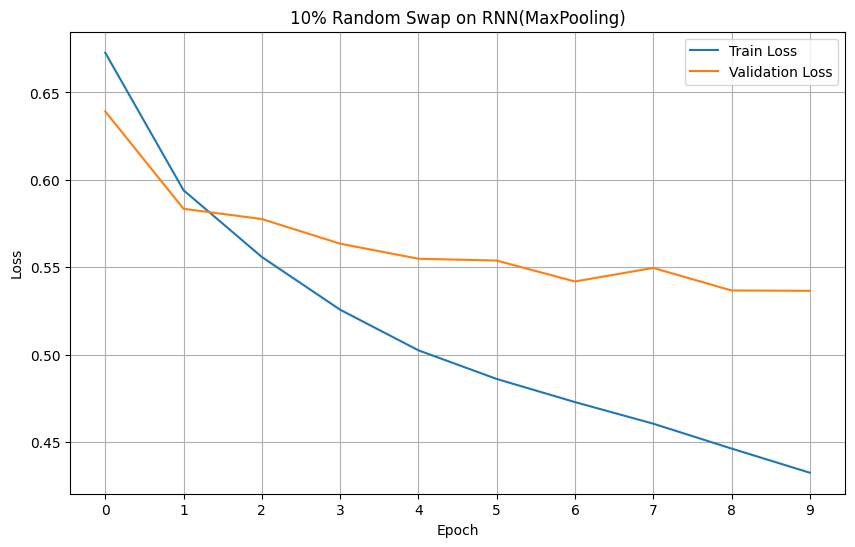

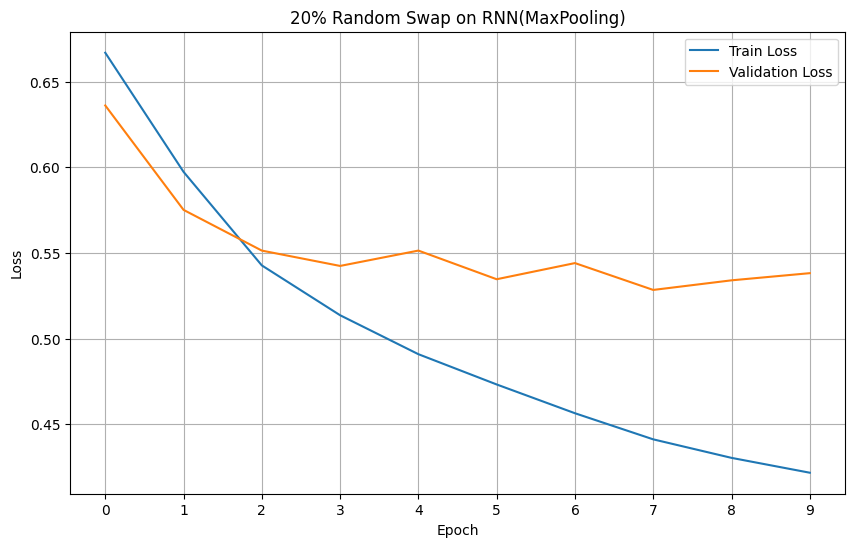

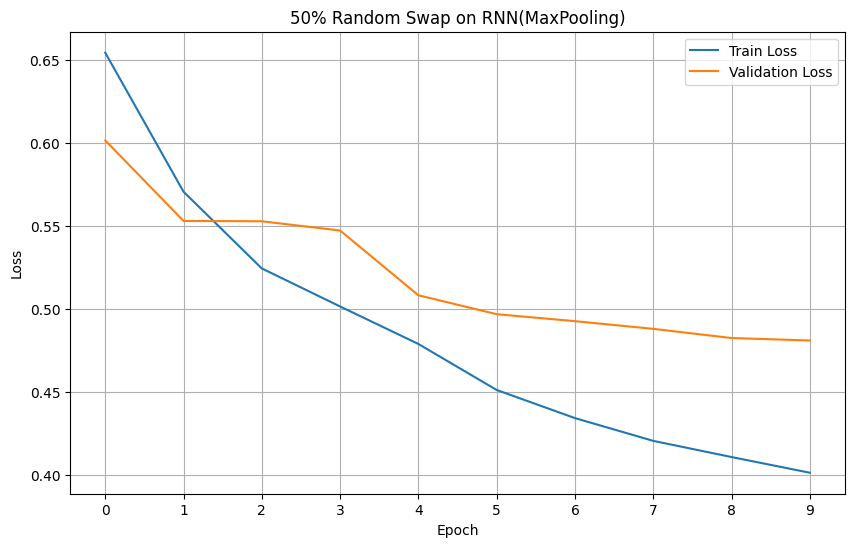

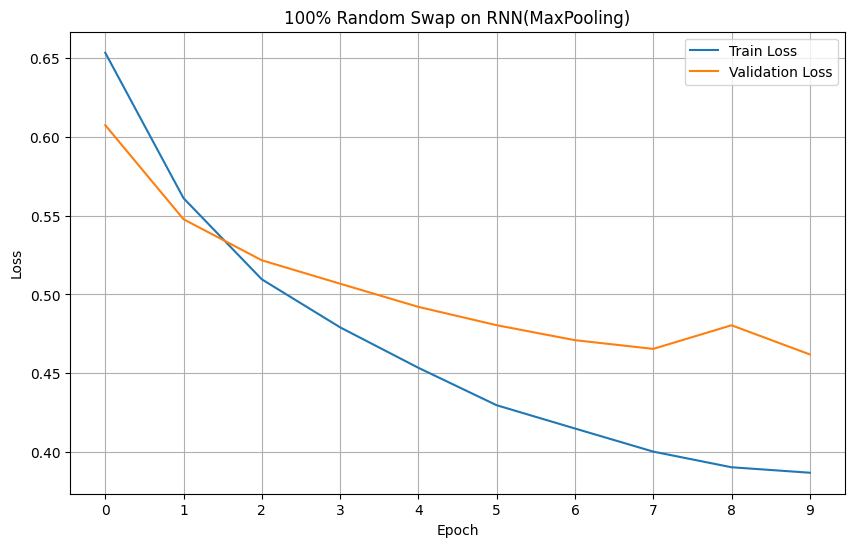

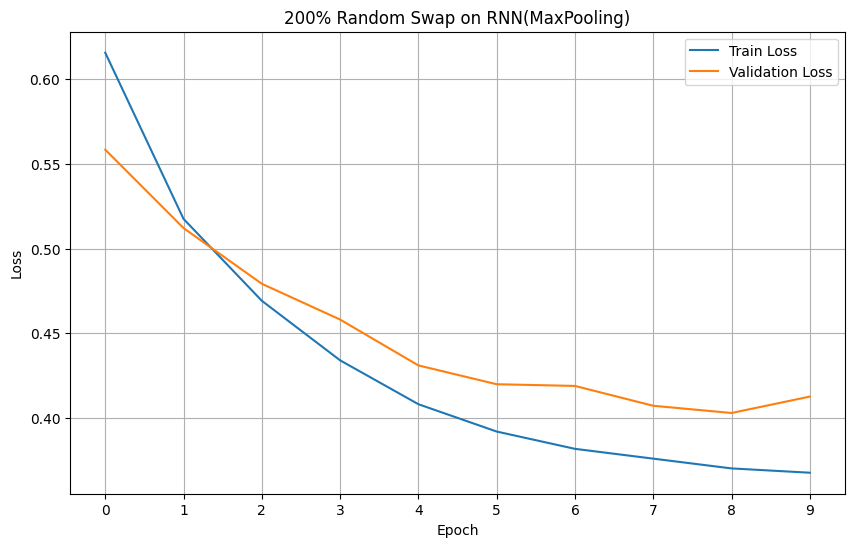

In [11]:
# Plot the loss graph
pipeline_random_5.plot_loss(title="5% Random Swap on RNN(MaxPooling)")
pipeline_random_10.plot_loss(title="10% Random Swap on RNN(MaxPooling)")
pipeline_random_20.plot_loss(title="20% Random Swap on RNN(MaxPooling)")
pipeline_random_50.plot_loss(title="50% Random Swap on RNN(MaxPooling)")
pipeline_random_100.plot_loss(title="100% Random Swap on RNN(MaxPooling)")
pipeline_random_200.plot_loss(title="200% Random Swap on RNN(MaxPooling)")

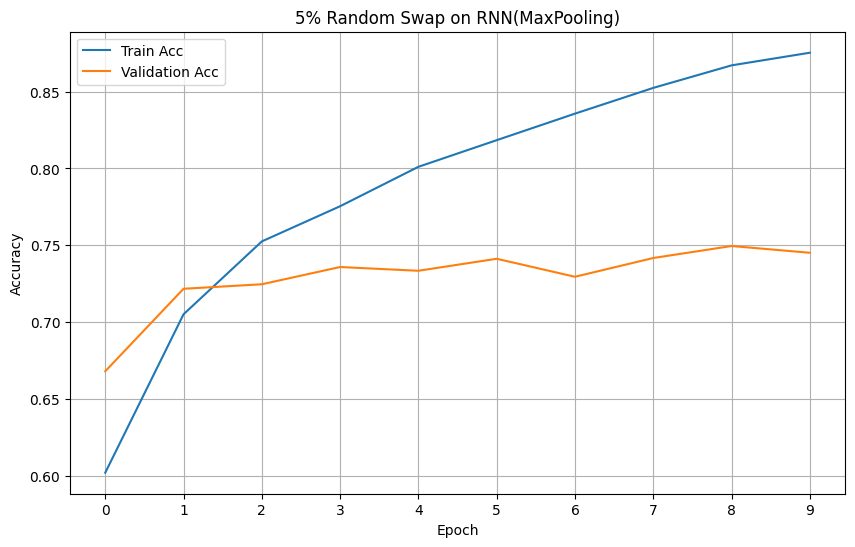

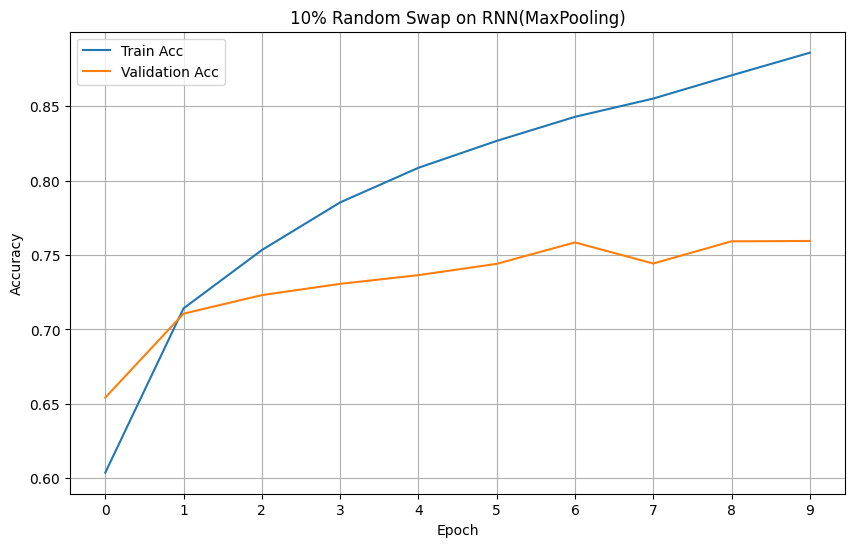

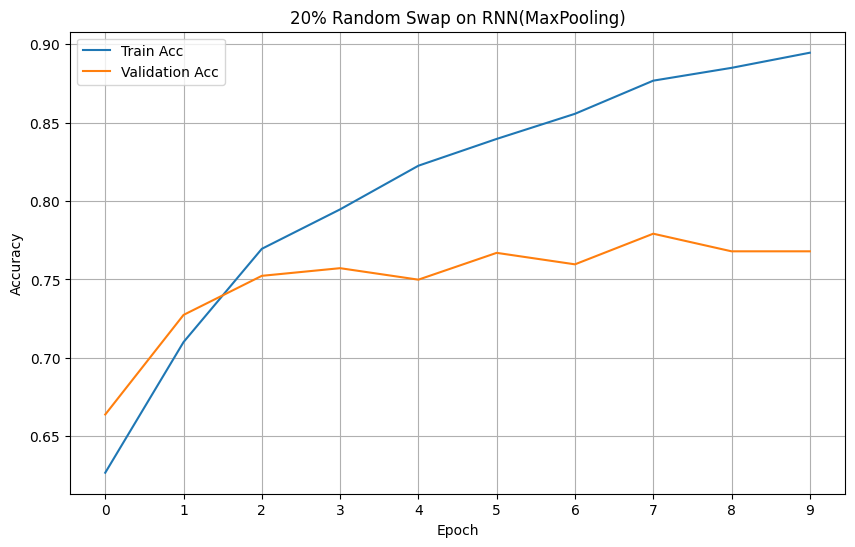

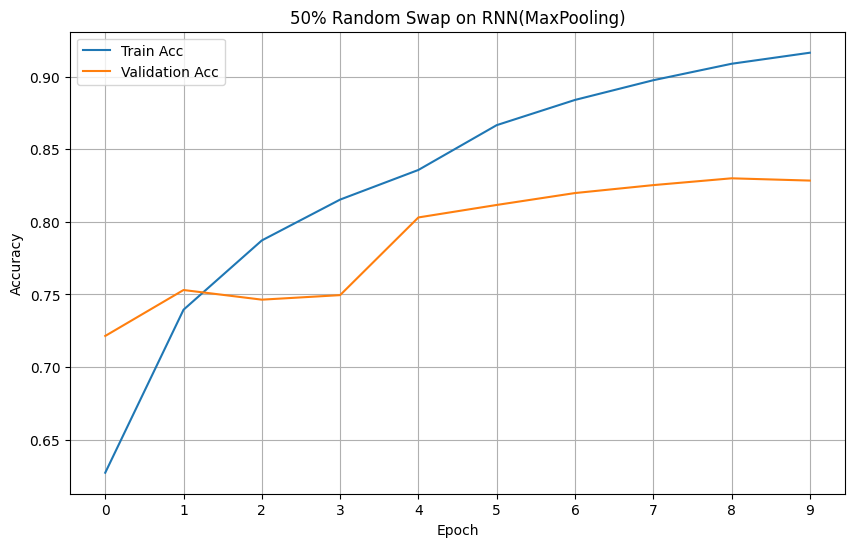

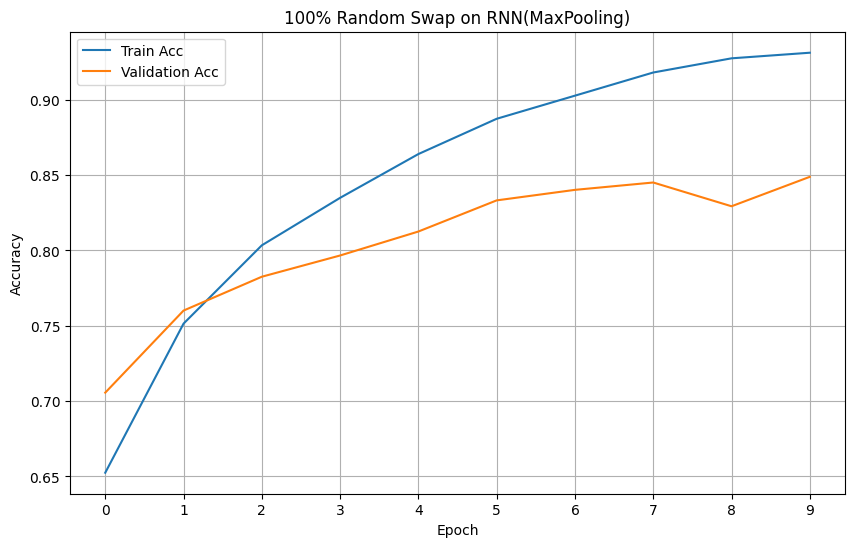

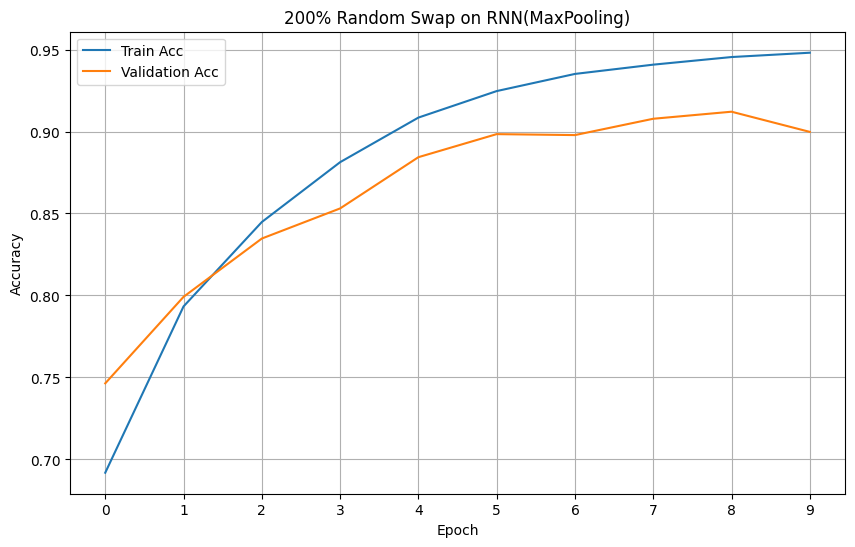

In [12]:
# Plot the acc graph
pipeline_random_5.plot_acc(title="5% Random Swap on RNN(MaxPooling)")
pipeline_random_10.plot_acc(title="10% Random Swap on RNN(MaxPooling)")
pipeline_random_20.plot_acc(title="20% Random Swap on RNN(MaxPooling)")
pipeline_random_50.plot_acc(title="50% Random Swap on RNN(MaxPooling)")
pipeline_random_100.plot_acc(title="100% Random Swap on RNN(MaxPooling)")
pipeline_random_200.plot_acc(title="200% Random Swap on RNN(MaxPooling)")

## Build and Train Pipelines - LSTM

In [13]:
pipeline_random_5_LSTM= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_10_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_20_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_50_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_100_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_200_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_200, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)


Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [14]:
pipeline_random_5_LSTM.train_model(n_epochs=10)
pipeline_random_10_LSTM.train_model(n_epochs=10)
pipeline_random_20_LSTM.train_model(n_epochs=10)
pipeline_random_50_LSTM.train_model(n_epochs=10)
pipeline_random_100_LSTM.train_model(n_epochs=10)
pipeline_random_200_LSTM.train_model(n_epochs=10)


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


Epoch: 1/10
Train Loss: 0.688, Train Acc: 0.564
Valid Loss: 0.661, Valid Acc: 0.646


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


Epoch: 2/10
Train Loss: 0.605, Train Acc: 0.696
Valid Loss: 0.585, Valid Acc: 0.703


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


Epoch: 3/10
Train Loss: 0.557, Train Acc: 0.746
Valid Loss: 0.572, Valid Acc: 0.720


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]


Epoch: 4/10
Train Loss: 0.530, Train Acc: 0.772
Valid Loss: 0.568, Valid Acc: 0.721


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]


Epoch: 5/10
Train Loss: 0.508, Train Acc: 0.798
Valid Loss: 0.566, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


Epoch: 6/10
Train Loss: 0.489, Train Acc: 0.817
Valid Loss: 0.557, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]


Epoch: 7/10
Train Loss: 0.476, Train Acc: 0.834
Valid Loss: 0.563, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


Epoch: 8/10
Train Loss: 0.469, Train Acc: 0.841
Valid Loss: 0.561, Valid Acc: 0.742


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]


Epoch: 9/10
Train Loss: 0.458, Train Acc: 0.853
Valid Loss: 0.567, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]


Epoch: 10/10
Train Loss: 0.454, Train Acc: 0.857
Valid Loss: 0.564, Valid Acc: 0.740


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]


Epoch: 1/10
Train Loss: 0.685, Train Acc: 0.554
Valid Loss: 0.638, Valid Acc: 0.655


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


Epoch: 2/10
Train Loss: 0.603, Train Acc: 0.689
Valid Loss: 0.563, Valid Acc: 0.742


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


Epoch: 3/10
Train Loss: 0.552, Train Acc: 0.740
Valid Loss: 0.548, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]


Epoch: 4/10
Train Loss: 0.524, Train Acc: 0.774
Valid Loss: 0.544, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]


Epoch: 5/10
Train Loss: 0.502, Train Acc: 0.804
Valid Loss: 0.537, Valid Acc: 0.771


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


Epoch: 6/10
Train Loss: 0.491, Train Acc: 0.816
Valid Loss: 0.536, Valid Acc: 0.770


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


Epoch: 7/10
Train Loss: 0.487, Train Acc: 0.818
Valid Loss: 0.538, Valid Acc: 0.758


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]


Epoch: 8/10
Train Loss: 0.480, Train Acc: 0.827
Valid Loss: 0.548, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]


Epoch: 9/10
Train Loss: 0.470, Train Acc: 0.839
Valid Loss: 0.549, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


Epoch: 10/10
Train Loss: 0.466, Train Acc: 0.845
Valid Loss: 0.546, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


Epoch: 1/10
Train Loss: 0.683, Train Acc: 0.559
Valid Loss: 0.621, Valid Acc: 0.693


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]


Epoch: 2/10
Train Loss: 0.592, Train Acc: 0.710
Valid Loss: 0.583, Valid Acc: 0.714


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


Epoch: 3/10
Train Loss: 0.547, Train Acc: 0.756
Valid Loss: 0.548, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]


Epoch: 4/10
Train Loss: 0.522, Train Acc: 0.780
Valid Loss: 0.546, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]


Epoch: 5/10
Train Loss: 0.501, Train Acc: 0.805
Valid Loss: 0.543, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]


Epoch: 6/10
Train Loss: 0.483, Train Acc: 0.826
Valid Loss: 0.543, Valid Acc: 0.766


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


Epoch: 7/10
Train Loss: 0.473, Train Acc: 0.834
Valid Loss: 0.537, Valid Acc: 0.769


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


Epoch: 8/10
Train Loss: 0.458, Train Acc: 0.852
Valid Loss: 0.530, Valid Acc: 0.769


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]


Epoch: 9/10
Train Loss: 0.449, Train Acc: 0.863
Valid Loss: 0.529, Valid Acc: 0.782


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]


Epoch: 10/10
Train Loss: 0.445, Train Acc: 0.866
Valid Loss: 0.532, Valid Acc: 0.779


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]


Epoch: 1/10
Train Loss: 0.674, Train Acc: 0.583
Valid Loss: 0.606, Valid Acc: 0.690


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]


Epoch: 2/10
Train Loss: 0.562, Train Acc: 0.732
Valid Loss: 0.544, Valid Acc: 0.751


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Epoch: 3/10
Train Loss: 0.522, Train Acc: 0.781
Valid Loss: 0.529, Valid Acc: 0.776


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


Epoch: 4/10
Train Loss: 0.497, Train Acc: 0.807
Valid Loss: 0.523, Valid Acc: 0.780


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]


Epoch: 5/10
Train Loss: 0.475, Train Acc: 0.834
Valid Loss: 0.519, Valid Acc: 0.792


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]


Epoch: 6/10
Train Loss: 0.459, Train Acc: 0.851
Valid Loss: 0.516, Valid Acc: 0.788


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]


Epoch: 7/10
Train Loss: 0.447, Train Acc: 0.863
Valid Loss: 0.500, Valid Acc: 0.809


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]


Epoch: 8/10
Train Loss: 0.432, Train Acc: 0.878
Valid Loss: 0.490, Valid Acc: 0.823


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]


Epoch: 9/10
Train Loss: 0.448, Train Acc: 0.862
Valid Loss: 0.502, Valid Acc: 0.805


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]


Epoch: 10/10
Train Loss: 0.427, Train Acc: 0.885
Valid Loss: 0.500, Valid Acc: 0.810


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Epoch: 1/10
Train Loss: 0.661, Train Acc: 0.590
Valid Loss: 0.576, Valid Acc: 0.725


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Epoch: 2/10
Train Loss: 0.552, Train Acc: 0.752
Valid Loss: 0.537, Valid Acc: 0.764


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Epoch: 3/10
Train Loss: 0.508, Train Acc: 0.798
Valid Loss: 0.523, Valid Acc: 0.787


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Epoch: 4/10
Train Loss: 0.487, Train Acc: 0.824
Valid Loss: 0.549, Valid Acc: 0.756


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Epoch: 5/10
Train Loss: 0.489, Train Acc: 0.823
Valid Loss: 0.542, Valid Acc: 0.768


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Epoch: 6/10
Train Loss: 0.476, Train Acc: 0.831
Valid Loss: 0.504, Valid Acc: 0.802


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Epoch: 7/10
Train Loss: 0.454, Train Acc: 0.858
Valid Loss: 0.521, Valid Acc: 0.788


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Epoch: 8/10
Train Loss: 0.461, Train Acc: 0.851
Valid Loss: 0.512, Valid Acc: 0.797


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Epoch: 9/10
Train Loss: 0.460, Train Acc: 0.849
Valid Loss: 0.514, Valid Acc: 0.784


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Epoch: 10/10
Train Loss: 0.463, Train Acc: 0.844
Valid Loss: 0.508, Valid Acc: 0.799


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


Epoch: 1/10
Train Loss: 0.668, Train Acc: 0.589
Valid Loss: 0.619, Valid Acc: 0.695


evaluating...: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


Epoch: 2/10
Train Loss: 0.577, Train Acc: 0.732
Valid Loss: 0.538, Valid Acc: 0.766


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]


Epoch: 3/10
Train Loss: 0.510, Train Acc: 0.798
Valid Loss: 0.504, Valid Acc: 0.802


evaluating...: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


Epoch: 4/10
Train Loss: 0.466, Train Acc: 0.844
Valid Loss: 0.471, Valid Acc: 0.837


evaluating...: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]


Epoch: 5/10
Train Loss: 0.438, Train Acc: 0.874
Valid Loss: 0.478, Valid Acc: 0.833


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


Epoch: 6/10
Train Loss: 0.427, Train Acc: 0.886
Valid Loss: 0.448, Valid Acc: 0.864


evaluating...: 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


Epoch: 7/10
Train Loss: 0.422, Train Acc: 0.891
Valid Loss: 0.452, Valid Acc: 0.859


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]


Epoch: 8/10
Train Loss: 0.417, Train Acc: 0.895
Valid Loss: 0.439, Valid Acc: 0.872


evaluating...: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


Epoch: 9/10
Train Loss: 0.411, Train Acc: 0.902
Valid Loss: 0.455, Valid Acc: 0.857


evaluating...: 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

Epoch: 10/10
Train Loss: 0.431, Train Acc: 0.882
Valid Loss: 0.492, Valid Acc: 0.822


### Accuracy and Loss Plots

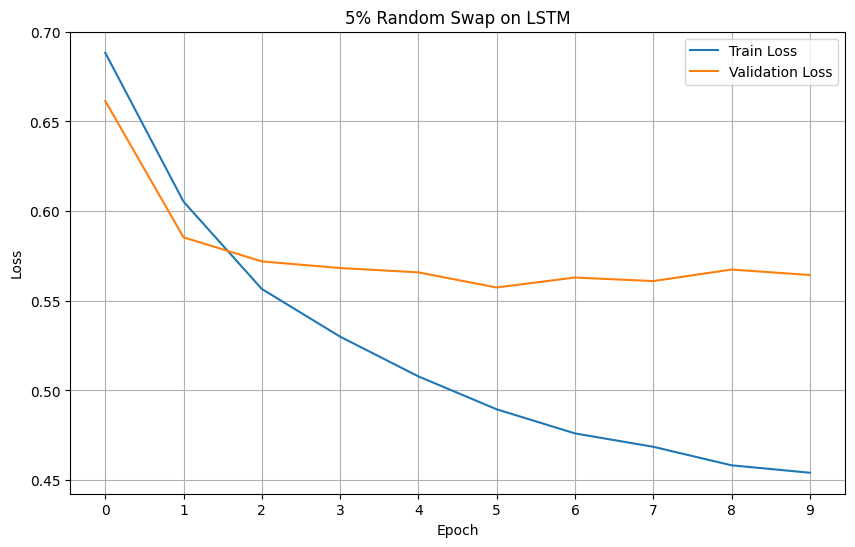

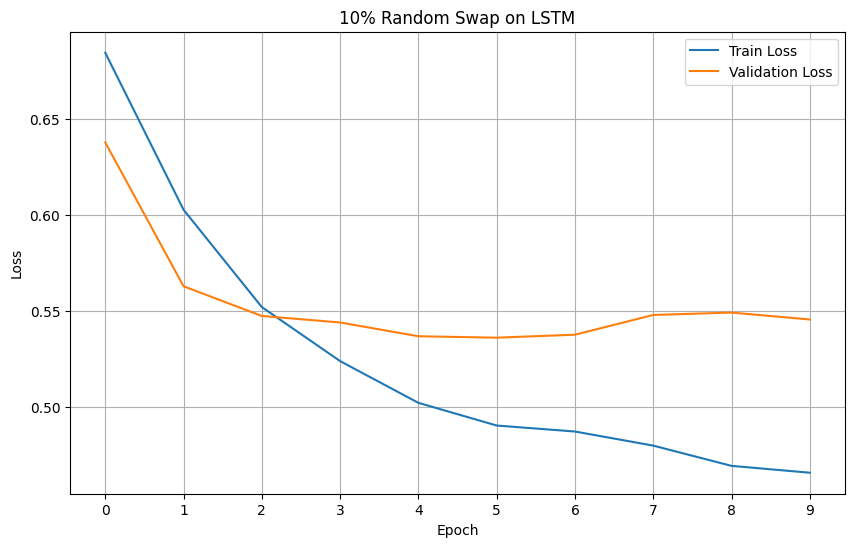

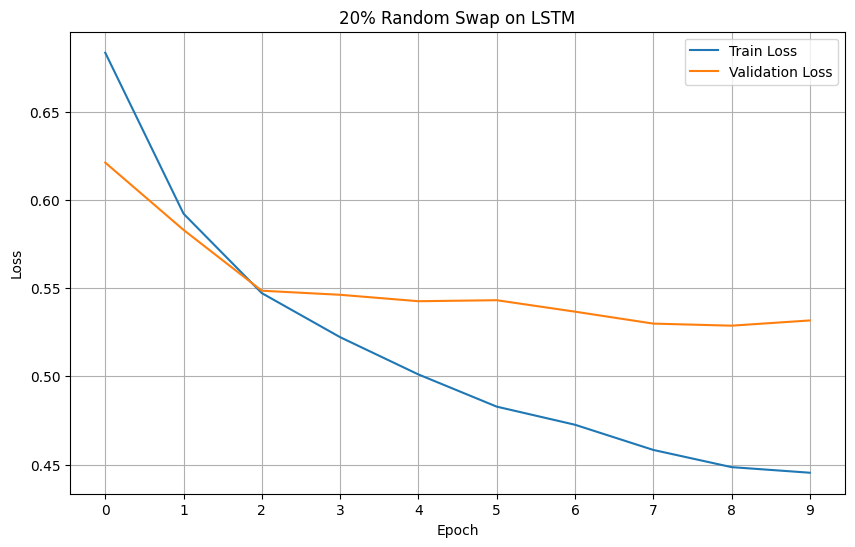

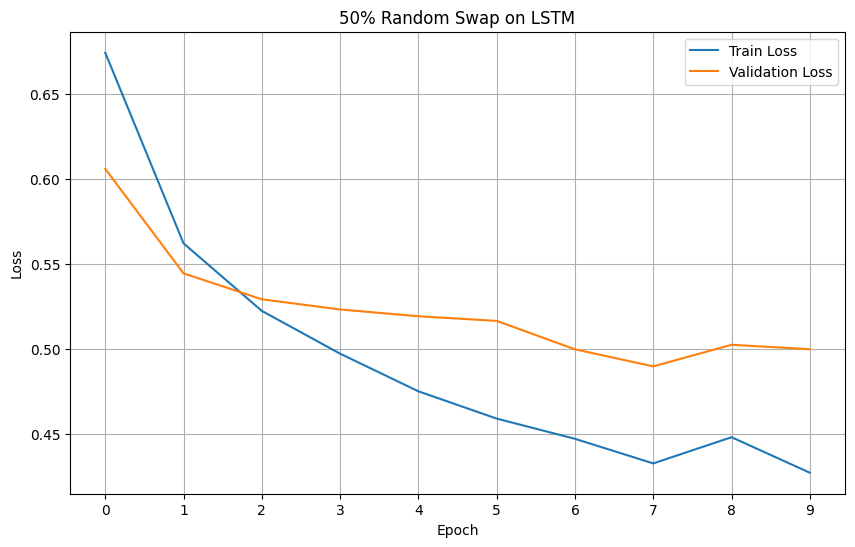

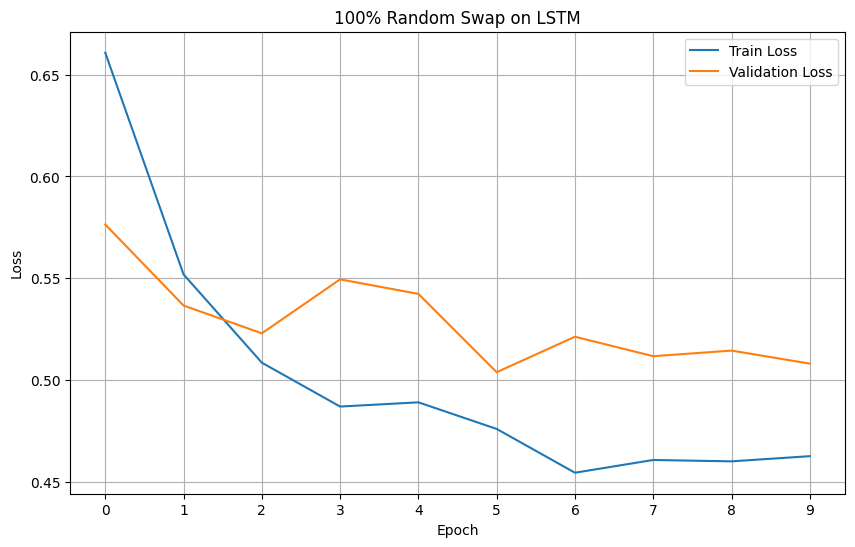

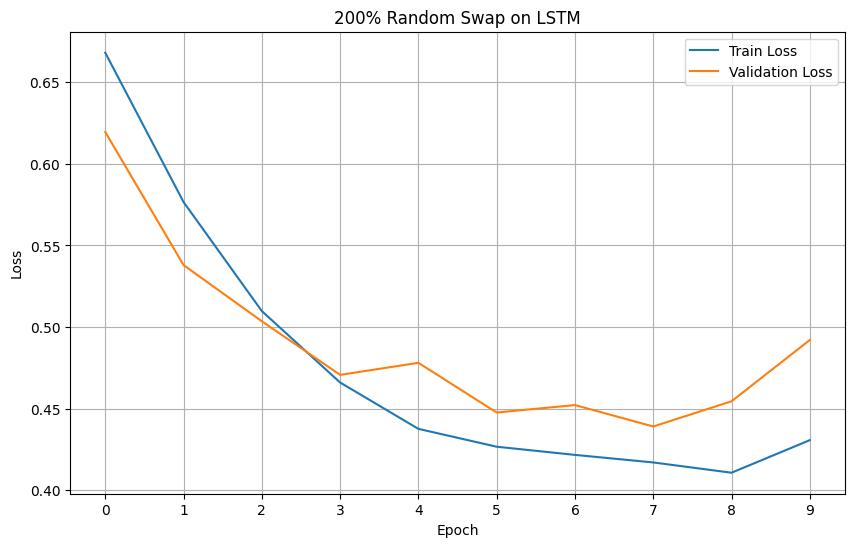

In [15]:
# Plot the loss graph
pipeline_random_5_LSTM.plot_loss(title="5% Random Swap on LSTM")
pipeline_random_10_LSTM.plot_loss(title="10% Random Swap on LSTM")
pipeline_random_20_LSTM.plot_loss(title="20% Random Swap on LSTM")
pipeline_random_50_LSTM.plot_loss(title="50% Random Swap on LSTM")
pipeline_random_100_LSTM.plot_loss(title="100% Random Swap on LSTM")
pipeline_random_200_LSTM.plot_loss(title="200% Random Swap on LSTM")

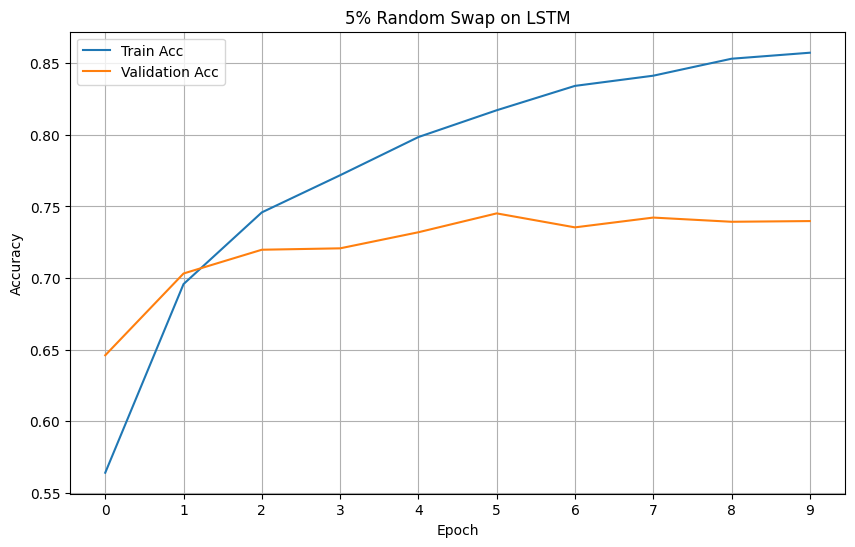

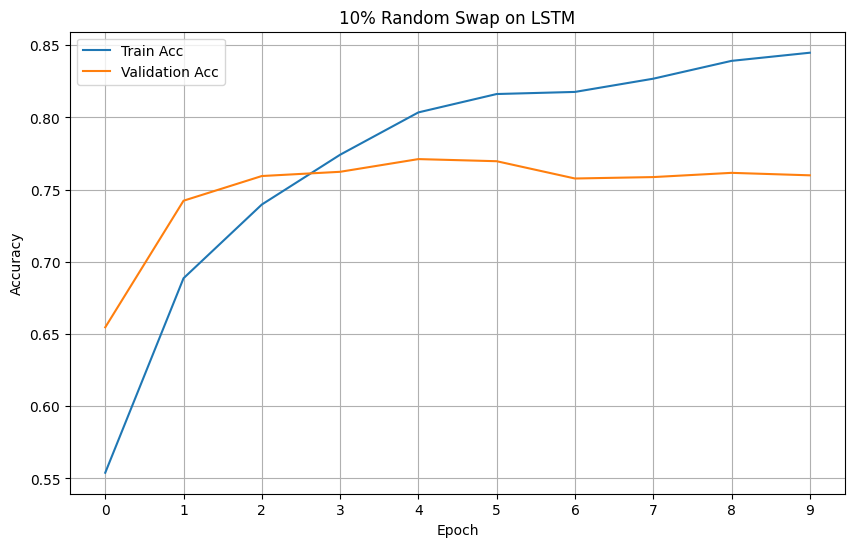

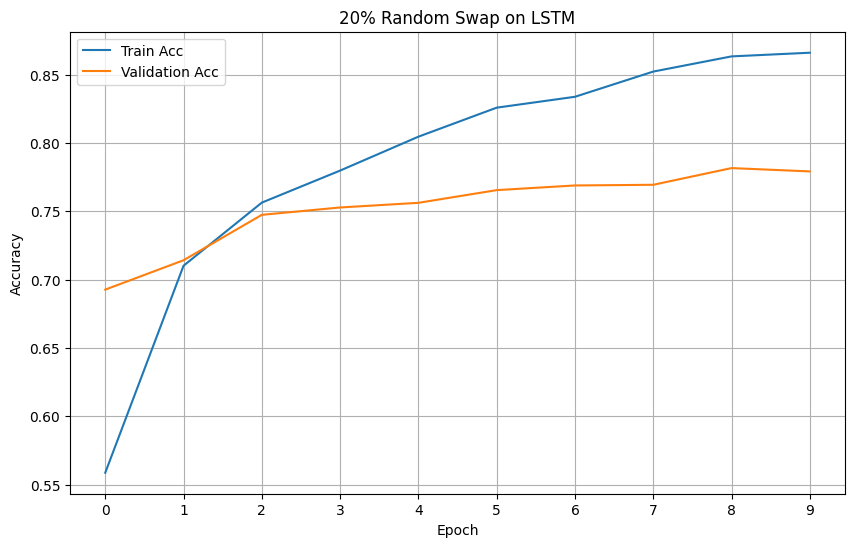

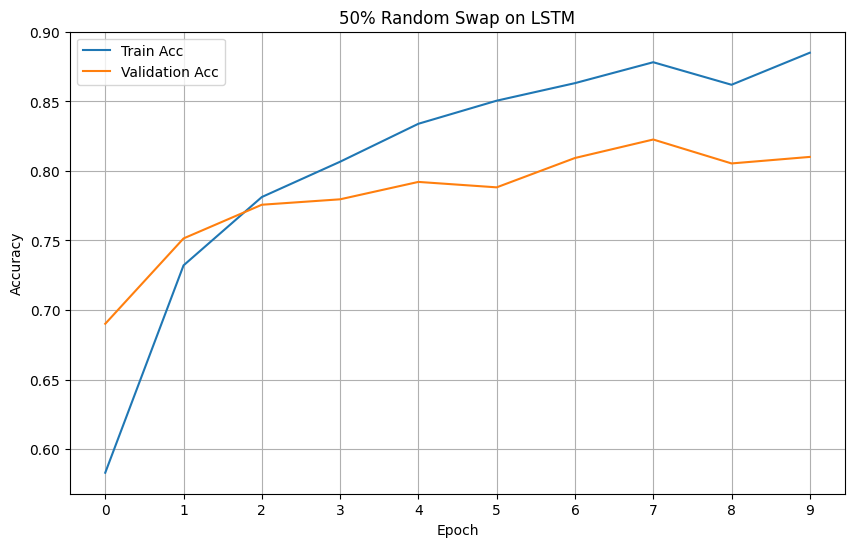

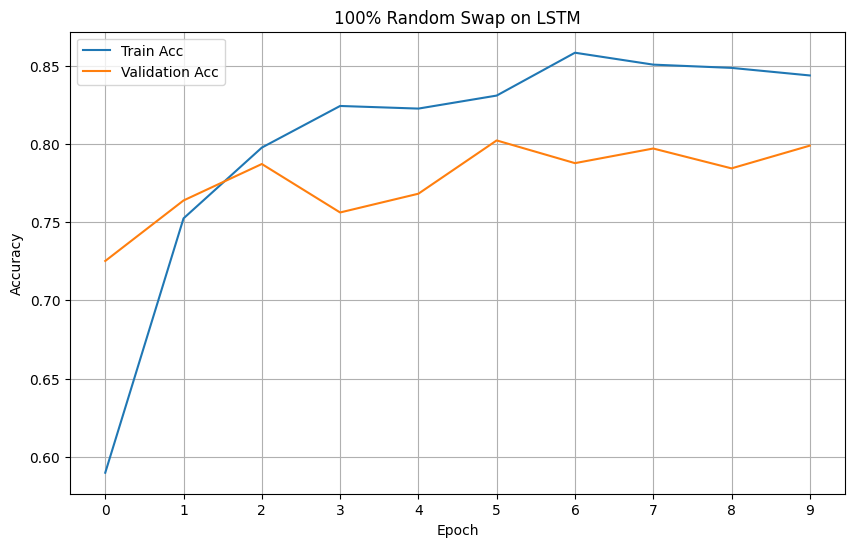

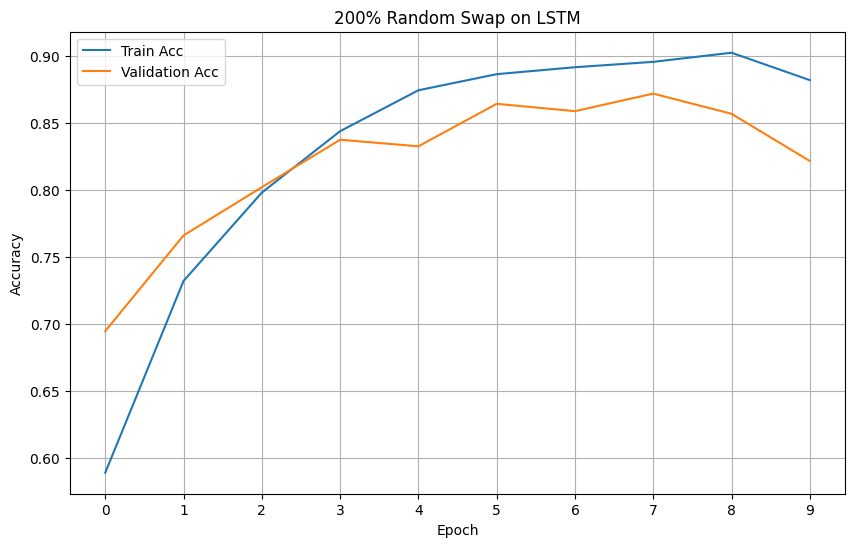

In [16]:
# Plot the acc graph
pipeline_random_5_LSTM.plot_acc(title="5% Random Swap on LSTM")
pipeline_random_10_LSTM.plot_acc(title="10% Random Swap on LSTM")
pipeline_random_20_LSTM.plot_acc(title="20% Random Swap on LSTM")
pipeline_random_50_LSTM.plot_acc(title="50% Random Swap on LSTM")
pipeline_random_100_LSTM.plot_acc(title="100% Random Swap on LSTM")
pipeline_random_200_LSTM.plot_acc(title="200% Random Swap on LSTM")

____

# Performance of Random Substitute

## Download datasets

In [17]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Augment and Concatenate Dataset to enlarge it

In [18]:
# Augment by 5%, 10%, and 20%
percentage= {
    MODE.RANDOM.SUBSTITUTE: 0.05,
}
augmented_random_5_SUB = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.SUBSTITUTE: 0.10,
}
augmented_random_10_SUB = augment_data(original_train_data,  percentage)
percentage= {
    MODE.RANDOM.SUBSTITUTE: 0.20,
}
augmented_random_20_SUB = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.SUBSTITUTE: 0.50,
}
augmented_random_50_SUB = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.SUBSTITUTE: 1.00,
}
augmented_random_100_SUB = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.SUBSTITUTE: 2.00,
}
augmented_random_200_SUB = augment_data(original_train_data, percentage)

# Convert augmented data into Datasets
augmented_random_5_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_5_SUB],
    "label": [item["label"] for item in augmented_random_5_SUB]
}, features=features)

augmented_random_10_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_10_SUB],
    "label": [item["label"] for item in augmented_random_10_SUB]
}, features=features)

augmented_random_20_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_20_SUB],
    "label": [item["label"] for item in augmented_random_20_SUB]
}, features=features)

augmented_random_50_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_50_SUB],
    "label": [item["label"] for item in augmented_random_50_SUB]
}, features=features)

augmented_random_100_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_100_SUB],
    "label": [item["label"] for item in augmented_random_100_SUB]
}, features=features)

augmented_random_200_SUB_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_200_SUB],
    "label": [item["label"] for item in augmented_random_200_SUB]
}, features=features)

# Concatenate original and augmented datasets
augmented_random_train_data_5_CROP = concatenate_datasets([original_train_data, augmented_random_5_SUB_dataset])
augmented_random_train_data_10_CROP = concatenate_datasets([original_train_data, augmented_random_10_SUB_dataset])
augmented_random_train_data_20_CROP = concatenate_datasets([original_train_data, augmented_random_20_SUB_dataset])
augmented_random_train_data_50_CROP = concatenate_datasets([original_train_data, augmented_random_50_SUB_dataset])
augmented_random_train_data_100_CROP = concatenate_datasets([original_train_data, augmented_random_100_SUB_dataset])
augmented_random_train_data_200_CROP = concatenate_datasets([original_train_data, augmented_random_200_SUB_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% augmentation: {len(augmented_random_train_data_5_CROP)}")
print(f"Train size after 10% augmentation: {len(augmented_random_train_data_10_CROP)}")
print(f"Train size after 20% augmentation: {len(augmented_random_train_data_20_CROP)}")
print(f"Train size after 50% augmentation: {len(augmented_random_train_data_50_CROP)}")
print(f"Train size after 100% augmentation: {len(augmented_random_train_data_100_CROP)}")
print(f"Train size after 200% augmentation: {len(augmented_random_train_data_200_CROP)}")

Original train size: 8530
Train size after 5% augmentation: 8956
Train size after 10% augmentation: 9382
Train size after 20% augmentation: 10235
Train size after 50% augmentation: 12794
Train size after 100% augmentation: 17058
Train size after 200% augmentation: 25586


## Build and Train Pipeline - RNN (MaxPooling)

In [19]:
pipeline_random_5_CROP= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_10_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_20_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_50_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_50_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_100_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_100_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_200_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_200_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [20]:
pipeline_random_5_CROP.train_model(n_epochs=10)
pipeline_random_10_CROP.train_model(n_epochs=10)
pipeline_random_20_CROP.train_model(n_epochs=10)
pipeline_random_50_CROP.train_model(n_epochs=10)
pipeline_random_100_CROP.train_model(n_epochs=10)
pipeline_random_200_CROP.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]


Epoch: 1/10
Train Loss: 0.678, Train Acc: 0.587
Valid Loss: 0.636, Valid Acc: 0.684


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]


Epoch: 2/10
Train Loss: 0.607, Train Acc: 0.699
Valid Loss: 0.585, Valid Acc: 0.725


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.45it/s]


Epoch: 3/10
Train Loss: 0.563, Train Acc: 0.746
Valid Loss: 0.569, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]


Epoch: 4/10
Train Loss: 0.534, Train Acc: 0.777
Valid Loss: 0.566, Valid Acc: 0.734


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.34it/s]


Epoch: 5/10
Train Loss: 0.519, Train Acc: 0.792
Valid Loss: 0.573, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]


Epoch: 6/10
Train Loss: 0.498, Train Acc: 0.814
Valid Loss: 0.551, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.29it/s]


Epoch: 7/10
Train Loss: 0.476, Train Acc: 0.841
Valid Loss: 0.552, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.66it/s]


Epoch: 8/10
Train Loss: 0.462, Train Acc: 0.857
Valid Loss: 0.545, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.62it/s]


Epoch: 9/10
Train Loss: 0.459, Train Acc: 0.860
Valid Loss: 0.547, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.35it/s]


Epoch: 10/10
Train Loss: 0.446, Train Acc: 0.868
Valid Loss: 0.551, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.51it/s]


Epoch: 1/10
Train Loss: 0.674, Train Acc: 0.609
Valid Loss: 0.636, Valid Acc: 0.669


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.49it/s]


Epoch: 2/10
Train Loss: 0.617, Train Acc: 0.688
Valid Loss: 0.590, Valid Acc: 0.717


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.51it/s]


Epoch: 3/10
Train Loss: 0.563, Train Acc: 0.744
Valid Loss: 0.569, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]


Epoch: 4/10
Train Loss: 0.526, Train Acc: 0.784
Valid Loss: 0.565, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]


Epoch: 5/10
Train Loss: 0.504, Train Acc: 0.810
Valid Loss: 0.554, Valid Acc: 0.738


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]


Epoch: 6/10
Train Loss: 0.480, Train Acc: 0.838
Valid Loss: 0.554, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.45it/s]


Epoch: 7/10
Train Loss: 0.481, Train Acc: 0.829
Valid Loss: 0.561, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]


Epoch: 8/10
Train Loss: 0.466, Train Acc: 0.851
Valid Loss: 0.546, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]


Epoch: 9/10
Train Loss: 0.449, Train Acc: 0.866
Valid Loss: 0.544, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]


Epoch: 10/10
Train Loss: 0.437, Train Acc: 0.876
Valid Loss: 0.546, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]


Epoch: 1/10
Train Loss: 0.667, Train Acc: 0.610
Valid Loss: 0.620, Valid Acc: 0.678


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]


Epoch: 2/10
Train Loss: 0.589, Train Acc: 0.718
Valid Loss: 0.577, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]


Epoch: 3/10
Train Loss: 0.552, Train Acc: 0.758
Valid Loss: 0.550, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]


Epoch: 4/10
Train Loss: 0.524, Train Acc: 0.788
Valid Loss: 0.539, Valid Acc: 0.763


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]


Epoch: 5/10
Train Loss: 0.496, Train Acc: 0.815
Valid Loss: 0.536, Valid Acc: 0.763


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]


Epoch: 6/10
Train Loss: 0.479, Train Acc: 0.833
Valid Loss: 0.531, Valid Acc: 0.772


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]


Epoch: 7/10
Train Loss: 0.464, Train Acc: 0.854
Valid Loss: 0.529, Valid Acc: 0.770


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]


Epoch: 8/10
Train Loss: 0.447, Train Acc: 0.870
Valid Loss: 0.522, Valid Acc: 0.787


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]


Epoch: 9/10
Train Loss: 0.432, Train Acc: 0.885
Valid Loss: 0.523, Valid Acc: 0.784


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]


Epoch: 10/10
Train Loss: 0.423, Train Acc: 0.897
Valid Loss: 0.522, Valid Acc: 0.786


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]


Epoch: 1/10
Train Loss: 0.659, Train Acc: 0.613
Valid Loss: 0.602, Valid Acc: 0.714


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]


Epoch: 2/10
Train Loss: 0.568, Train Acc: 0.741
Valid Loss: 0.552, Valid Acc: 0.750


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]


Epoch: 3/10
Train Loss: 0.523, Train Acc: 0.789
Valid Loss: 0.546, Valid Acc: 0.751


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]


Epoch: 4/10
Train Loss: 0.495, Train Acc: 0.817
Valid Loss: 0.521, Valid Acc: 0.781


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.77it/s]


Epoch: 5/10
Train Loss: 0.470, Train Acc: 0.846
Valid Loss: 0.516, Valid Acc: 0.794


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]


Epoch: 6/10
Train Loss: 0.456, Train Acc: 0.859
Valid Loss: 0.519, Valid Acc: 0.783


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.78it/s]


Epoch: 7/10
Train Loss: 0.438, Train Acc: 0.879
Valid Loss: 0.500, Valid Acc: 0.809


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.88it/s]


Epoch: 8/10
Train Loss: 0.422, Train Acc: 0.894
Valid Loss: 0.497, Valid Acc: 0.814


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]


Epoch: 9/10
Train Loss: 0.414, Train Acc: 0.904
Valid Loss: 0.491, Valid Acc: 0.821


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  5.90it/s]


Epoch: 10/10
Train Loss: 0.407, Train Acc: 0.909
Valid Loss: 0.488, Valid Acc: 0.821


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]


Epoch: 1/10
Train Loss: 0.639, Train Acc: 0.667
Valid Loss: 0.579, Valid Acc: 0.727


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


Epoch: 2/10
Train Loss: 0.549, Train Acc: 0.756
Valid Loss: 0.538, Valid Acc: 0.772


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.17it/s]


Epoch: 3/10
Train Loss: 0.506, Train Acc: 0.809
Valid Loss: 0.512, Valid Acc: 0.799


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.83it/s]


Epoch: 4/10
Train Loss: 0.474, Train Acc: 0.841
Valid Loss: 0.497, Valid Acc: 0.813


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.40it/s]


Epoch: 5/10
Train Loss: 0.448, Train Acc: 0.870
Valid Loss: 0.482, Valid Acc: 0.832


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]


Epoch: 6/10
Train Loss: 0.429, Train Acc: 0.890
Valid Loss: 0.473, Valid Acc: 0.840


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.65it/s]


Epoch: 7/10
Train Loss: 0.415, Train Acc: 0.903
Valid Loss: 0.473, Valid Acc: 0.837


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]


Epoch: 8/10
Train Loss: 0.409, Train Acc: 0.910
Valid Loss: 0.457, Valid Acc: 0.854


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.81it/s]


Epoch: 9/10
Train Loss: 0.394, Train Acc: 0.924
Valid Loss: 0.452, Valid Acc: 0.860


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.59it/s]


Epoch: 10/10
Train Loss: 0.389, Train Acc: 0.929
Valid Loss: 0.447, Valid Acc: 0.864


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]


Epoch: 1/10
Train Loss: 0.620, Train Acc: 0.679
Valid Loss: 0.552, Valid Acc: 0.759


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.82it/s]


Epoch: 2/10
Train Loss: 0.512, Train Acc: 0.802
Valid Loss: 0.508, Valid Acc: 0.808


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]


Epoch: 3/10
Train Loss: 0.464, Train Acc: 0.850
Valid Loss: 0.479, Valid Acc: 0.829


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.58it/s]


Epoch: 4/10
Train Loss: 0.432, Train Acc: 0.884
Valid Loss: 0.461, Valid Acc: 0.850


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]


Epoch: 5/10
Train Loss: 0.407, Train Acc: 0.908
Valid Loss: 0.441, Valid Acc: 0.876


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]


Epoch: 6/10
Train Loss: 0.392, Train Acc: 0.925
Valid Loss: 0.432, Valid Acc: 0.884


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.34it/s]


Epoch: 7/10
Train Loss: 0.388, Train Acc: 0.929
Valid Loss: 0.427, Valid Acc: 0.887


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]


Epoch: 8/10
Train Loss: 0.377, Train Acc: 0.939
Valid Loss: 0.418, Valid Acc: 0.897


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]


Epoch: 9/10
Train Loss: 0.369, Train Acc: 0.946
Valid Loss: 0.416, Valid Acc: 0.897


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]

Epoch: 10/10
Train Loss: 0.366, Train Acc: 0.949
Valid Loss: 0.415, Valid Acc: 0.899


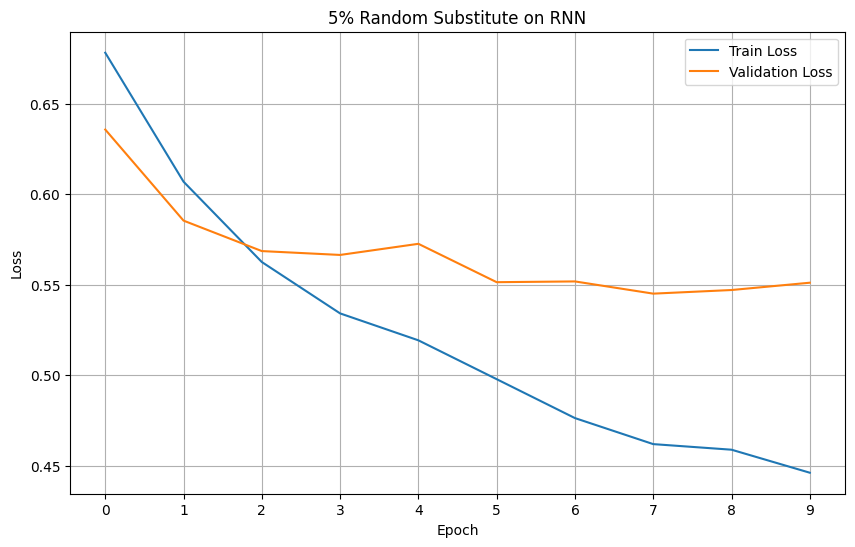

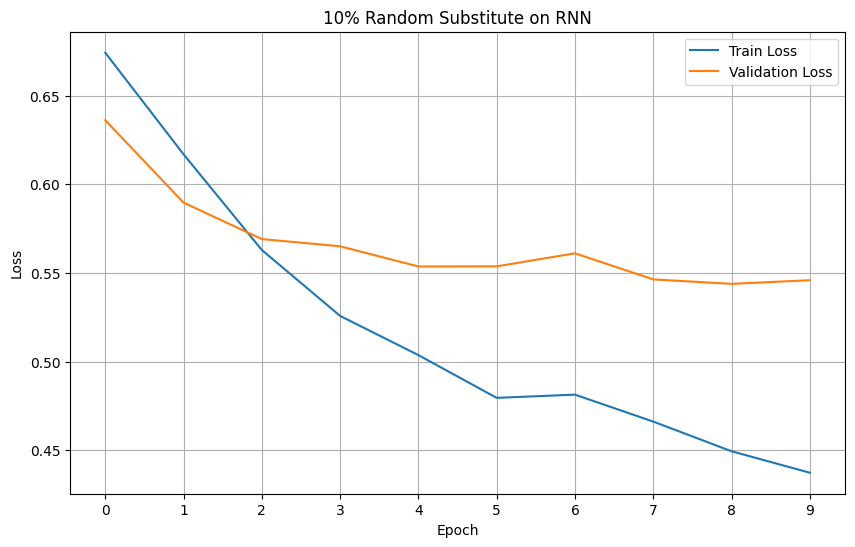

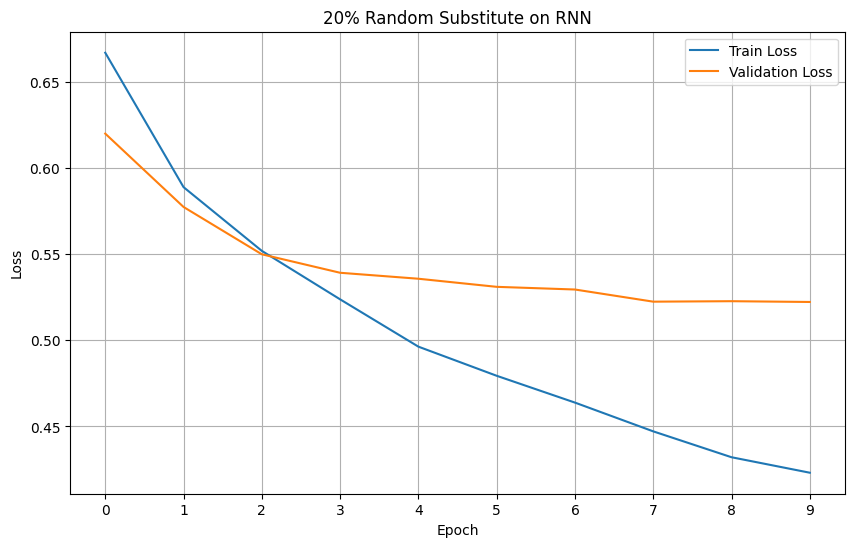

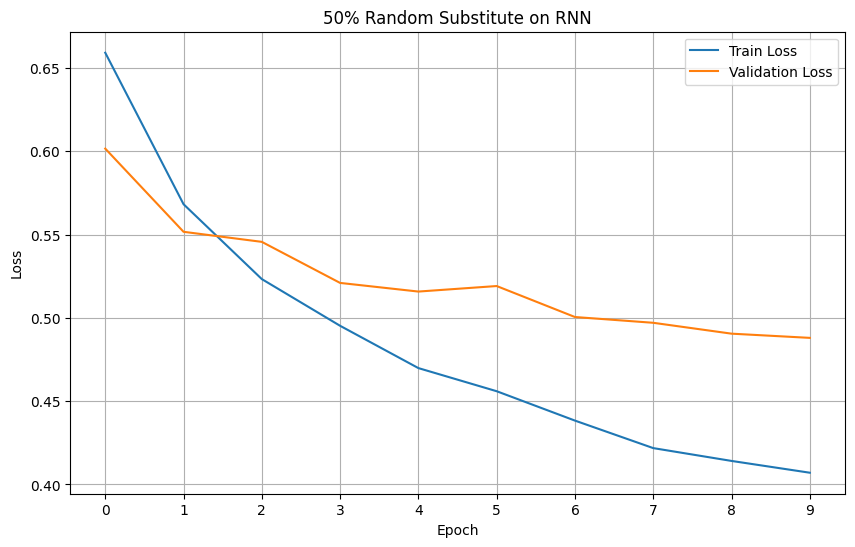

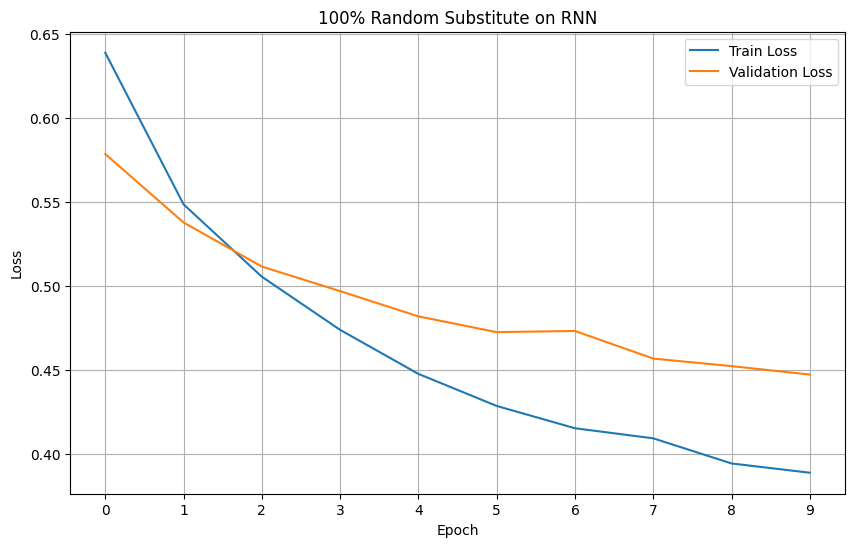

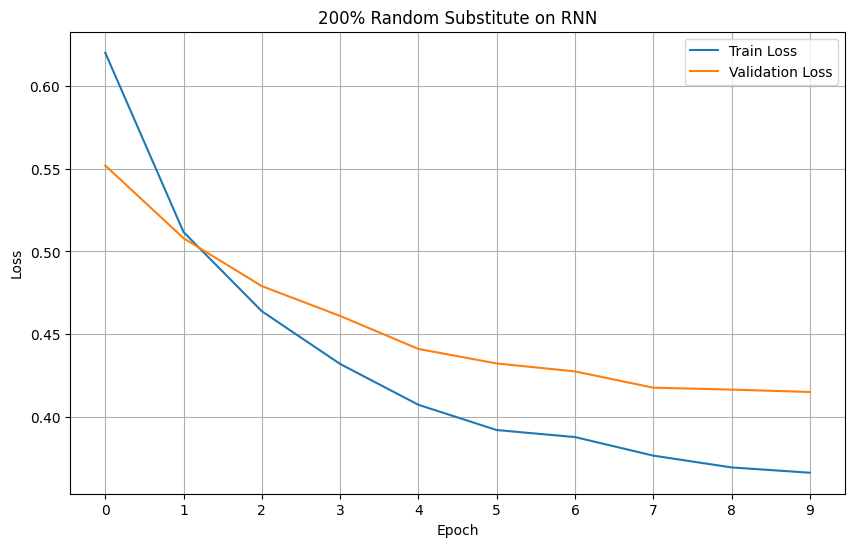

In [21]:
# Plot the acc graph
pipeline_random_5_CROP.plot_loss(title="5% Random Substitute on RNN")
pipeline_random_10_CROP.plot_loss(title="10% Random Substitute on RNN")
pipeline_random_20_CROP.plot_loss(title="20% Random Substitute on RNN")
pipeline_random_50_CROP.plot_loss(title="50% Random Substitute on RNN")
pipeline_random_100_CROP.plot_loss(title="100% Random Substitute on RNN")
pipeline_random_200_CROP.plot_loss(title="200% Random Substitute on RNN")

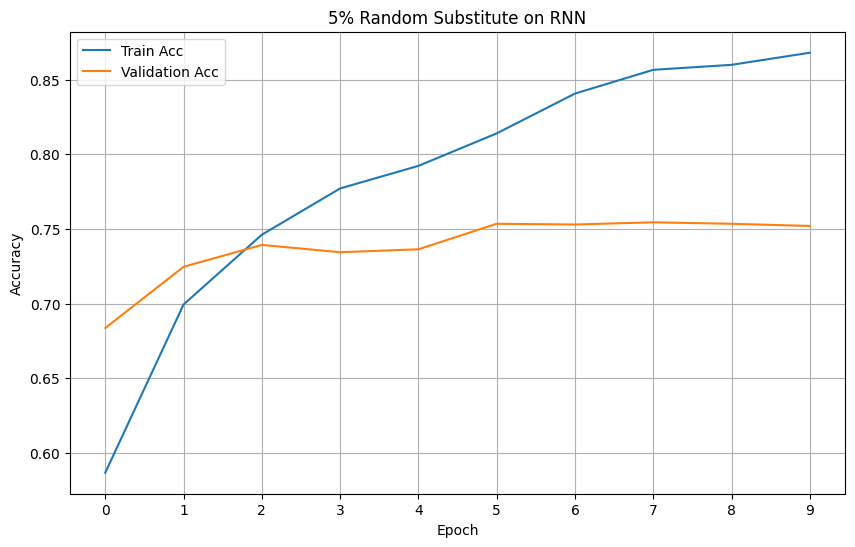

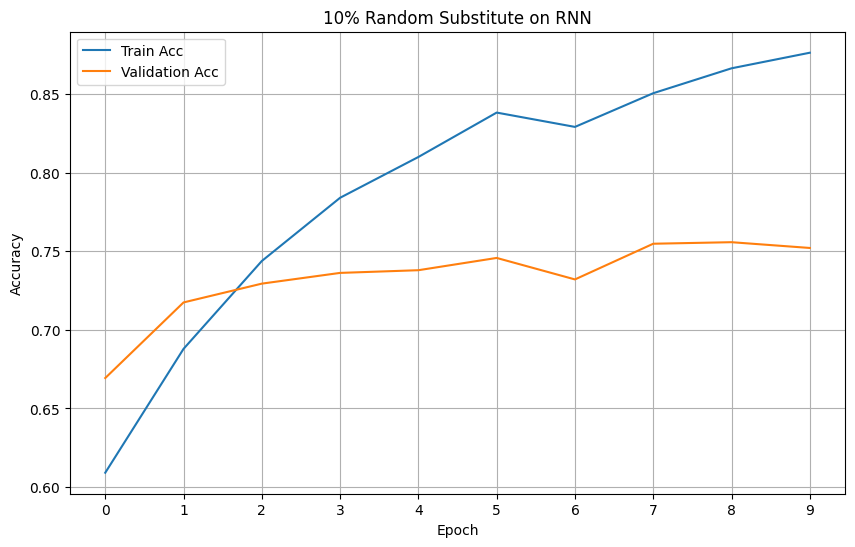

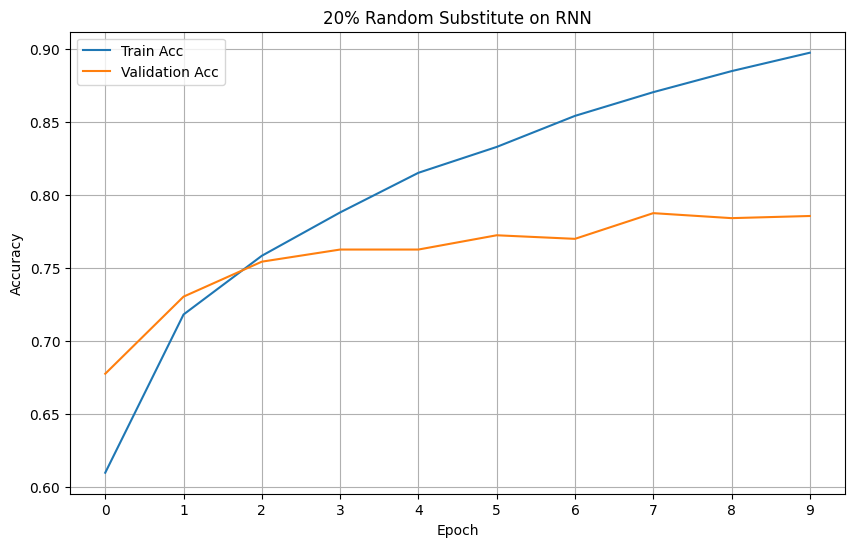

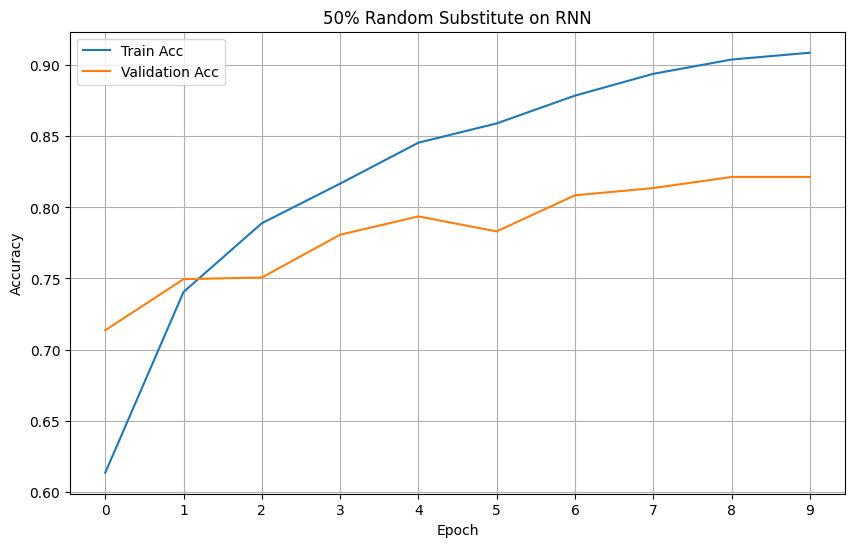

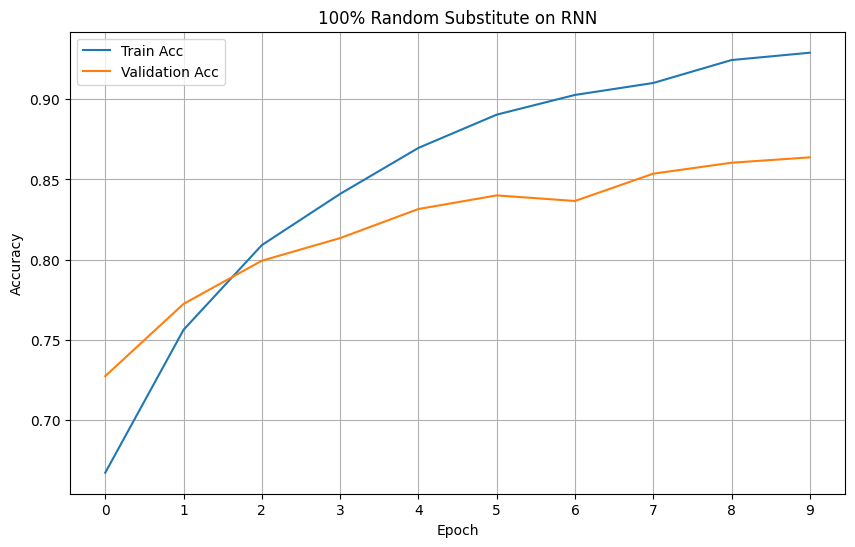

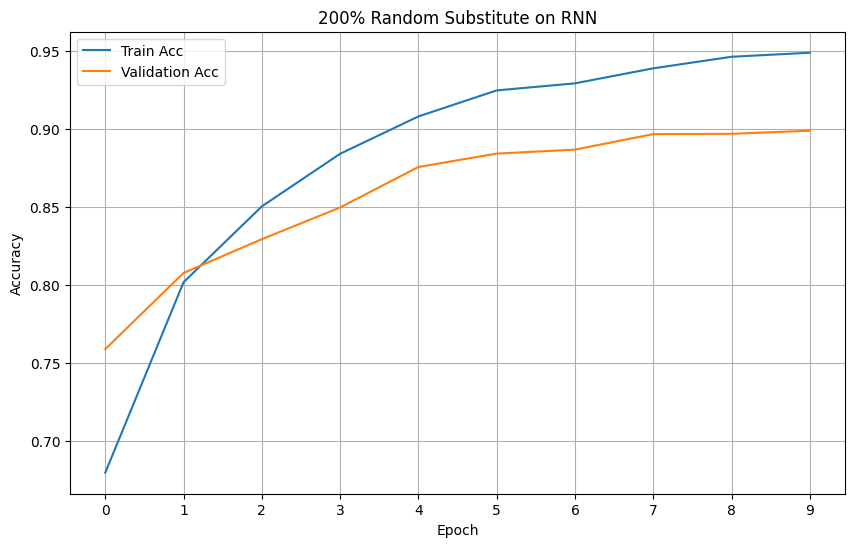

In [22]:
# Plot the acc graph
pipeline_random_5_CROP.plot_acc(title="5% Random Substitute on RNN")
pipeline_random_10_CROP.plot_acc(title="10% Random Substitute on RNN")
pipeline_random_20_CROP.plot_acc(title="20% Random Substitute on RNN")
pipeline_random_50_CROP.plot_acc(title="50% Random Substitute on RNN")
pipeline_random_100_CROP.plot_acc(title="100% Random Substitute on RNN")
pipeline_random_200_CROP.plot_acc(title="200% Random Substitute on RNN")

## Build and Train Pipelines - LSTM

In [23]:
pipeline_random_5_CROP_LSTM= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_10_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_20_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_50_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_50_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_100_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_100_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_200_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_200_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [24]:
pipeline_random_5_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_10_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_20_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_50_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_100_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_200_CROP_LSTM.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]


Epoch: 1/10
Train Loss: 0.688, Train Acc: 0.561
Valid Loss: 0.658, Valid Acc: 0.660


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]


Epoch: 2/10
Train Loss: 0.620, Train Acc: 0.677
Valid Loss: 0.584, Valid Acc: 0.719


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


Epoch: 3/10
Train Loss: 0.553, Train Acc: 0.752
Valid Loss: 0.563, Valid Acc: 0.743


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]


Epoch: 4/10
Train Loss: 0.522, Train Acc: 0.780
Valid Loss: 0.557, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]


Epoch: 5/10
Train Loss: 0.504, Train Acc: 0.804
Valid Loss: 0.545, Valid Acc: 0.763


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


Epoch: 6/10
Train Loss: 0.488, Train Acc: 0.819
Valid Loss: 0.543, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]


Epoch: 7/10
Train Loss: 0.475, Train Acc: 0.836
Valid Loss: 0.551, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]


Epoch: 8/10
Train Loss: 0.463, Train Acc: 0.849
Valid Loss: 0.556, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]


Epoch: 9/10
Train Loss: 0.459, Train Acc: 0.853
Valid Loss: 0.556, Valid Acc: 0.751


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


Epoch: 10/10
Train Loss: 0.450, Train Acc: 0.861
Valid Loss: 0.559, Valid Acc: 0.749


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


Epoch: 1/10
Train Loss: 0.680, Train Acc: 0.569
Valid Loss: 0.628, Valid Acc: 0.656


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


Epoch: 2/10
Train Loss: 0.594, Train Acc: 0.704
Valid Loss: 0.615, Valid Acc: 0.693


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]


Epoch: 3/10
Train Loss: 0.560, Train Acc: 0.742
Valid Loss: 0.575, Valid Acc: 0.727


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


Epoch: 4/10
Train Loss: 0.528, Train Acc: 0.778
Valid Loss: 0.560, Valid Acc: 0.734


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


Epoch: 5/10
Train Loss: 0.506, Train Acc: 0.799
Valid Loss: 0.555, Valid Acc: 0.738


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]


Epoch: 6/10
Train Loss: 0.488, Train Acc: 0.821
Valid Loss: 0.564, Valid Acc: 0.742


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]


Epoch: 7/10
Train Loss: 0.487, Train Acc: 0.821
Valid Loss: 0.555, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


Epoch: 8/10
Train Loss: 0.470, Train Acc: 0.838
Valid Loss: 0.558, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]


Epoch: 9/10
Train Loss: 0.459, Train Acc: 0.851
Valid Loss: 0.557, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


Epoch: 10/10
Train Loss: 0.455, Train Acc: 0.854
Valid Loss: 0.561, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]


Epoch: 1/10
Train Loss: 0.684, Train Acc: 0.574
Valid Loss: 0.630, Valid Acc: 0.684


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]


Epoch: 2/10
Train Loss: 0.594, Train Acc: 0.711
Valid Loss: 0.596, Valid Acc: 0.704


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]


Epoch: 3/10
Train Loss: 0.552, Train Acc: 0.752
Valid Loss: 0.562, Valid Acc: 0.742


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]


Epoch: 4/10
Train Loss: 0.529, Train Acc: 0.775
Valid Loss: 0.558, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]


Epoch: 5/10
Train Loss: 0.503, Train Acc: 0.803
Valid Loss: 0.545, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]


Epoch: 6/10
Train Loss: 0.488, Train Acc: 0.820
Valid Loss: 0.549, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]


Epoch: 7/10
Train Loss: 0.470, Train Acc: 0.840
Valid Loss: 0.543, Valid Acc: 0.766


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]


Epoch: 8/10
Train Loss: 0.456, Train Acc: 0.856
Valid Loss: 0.543, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]


Epoch: 9/10
Train Loss: 0.449, Train Acc: 0.863
Valid Loss: 0.538, Valid Acc: 0.768


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]


Epoch: 10/10
Train Loss: 0.441, Train Acc: 0.870
Valid Loss: 0.547, Valid Acc: 0.762


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


Epoch: 1/10
Train Loss: 0.674, Train Acc: 0.582
Valid Loss: 0.613, Valid Acc: 0.687


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]


Epoch: 2/10
Train Loss: 0.597, Train Acc: 0.705
Valid Loss: 0.639, Valid Acc: 0.645


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]


Epoch: 3/10
Train Loss: 0.578, Train Acc: 0.719
Valid Loss: 0.553, Valid Acc: 0.748


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]


Epoch: 4/10
Train Loss: 0.526, Train Acc: 0.778
Valid Loss: 0.532, Valid Acc: 0.771


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]


Epoch: 5/10
Train Loss: 0.498, Train Acc: 0.811
Valid Loss: 0.522, Valid Acc: 0.784


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


Epoch: 6/10
Train Loss: 0.471, Train Acc: 0.839
Valid Loss: 0.513, Valid Acc: 0.789


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]


Epoch: 7/10
Train Loss: 0.454, Train Acc: 0.858
Valid Loss: 0.506, Valid Acc: 0.802


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]


Epoch: 8/10
Train Loss: 0.446, Train Acc: 0.865
Valid Loss: 0.553, Valid Acc: 0.759


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


Epoch: 9/10
Train Loss: 0.482, Train Acc: 0.827
Valid Loss: 0.537, Valid Acc: 0.769


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


Epoch: 10/10
Train Loss: 0.460, Train Acc: 0.849
Valid Loss: 0.522, Valid Acc: 0.786


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]


Epoch: 1/10
Train Loss: 0.666, Train Acc: 0.591
Valid Loss: 0.618, Valid Acc: 0.661


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]


Epoch: 2/10
Train Loss: 0.553, Train Acc: 0.750
Valid Loss: 0.547, Valid Acc: 0.750


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]


Epoch: 3/10
Train Loss: 0.512, Train Acc: 0.791
Valid Loss: 0.535, Valid Acc: 0.771


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]


Epoch: 4/10
Train Loss: 0.497, Train Acc: 0.809
Valid Loss: 0.535, Valid Acc: 0.771


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Epoch: 5/10
Train Loss: 0.467, Train Acc: 0.843
Valid Loss: 0.506, Valid Acc: 0.800


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]


Epoch: 6/10
Train Loss: 0.453, Train Acc: 0.857
Valid Loss: 0.512, Valid Acc: 0.799


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]


Epoch: 7/10
Train Loss: 0.448, Train Acc: 0.864
Valid Loss: 0.506, Valid Acc: 0.804


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]


Epoch: 8/10
Train Loss: 0.435, Train Acc: 0.879
Valid Loss: 0.490, Valid Acc: 0.821


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]


Epoch: 9/10
Train Loss: 0.439, Train Acc: 0.874
Valid Loss: 0.503, Valid Acc: 0.807


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]


Epoch: 10/10
Train Loss: 0.480, Train Acc: 0.833
Valid Loss: 0.540, Valid Acc: 0.773


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


Epoch: 1/10
Train Loss: 0.633, Train Acc: 0.633
Valid Loss: 0.555, Valid Acc: 0.754


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


Epoch: 2/10
Train Loss: 0.515, Train Acc: 0.790
Valid Loss: 0.497, Valid Acc: 0.812


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


Epoch: 3/10
Train Loss: 0.464, Train Acc: 0.846
Valid Loss: 0.470, Valid Acc: 0.838


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


Epoch: 4/10
Train Loss: 0.449, Train Acc: 0.862
Valid Loss: 0.470, Valid Acc: 0.839


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]


Epoch: 5/10
Train Loss: 0.425, Train Acc: 0.887
Valid Loss: 0.441, Valid Acc: 0.871


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


Epoch: 6/10
Train Loss: 0.404, Train Acc: 0.909
Valid Loss: 0.442, Valid Acc: 0.870


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]


Epoch: 7/10
Train Loss: 0.407, Train Acc: 0.905
Valid Loss: 0.479, Valid Acc: 0.832


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


Epoch: 8/10
Train Loss: 0.417, Train Acc: 0.896
Valid Loss: 0.433, Valid Acc: 0.879


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]


Epoch: 9/10
Train Loss: 0.400, Train Acc: 0.913
Valid Loss: 0.435, Valid Acc: 0.876


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

Epoch: 10/10
Train Loss: 0.425, Train Acc: 0.888
Valid Loss: 0.505, Valid Acc: 0.805


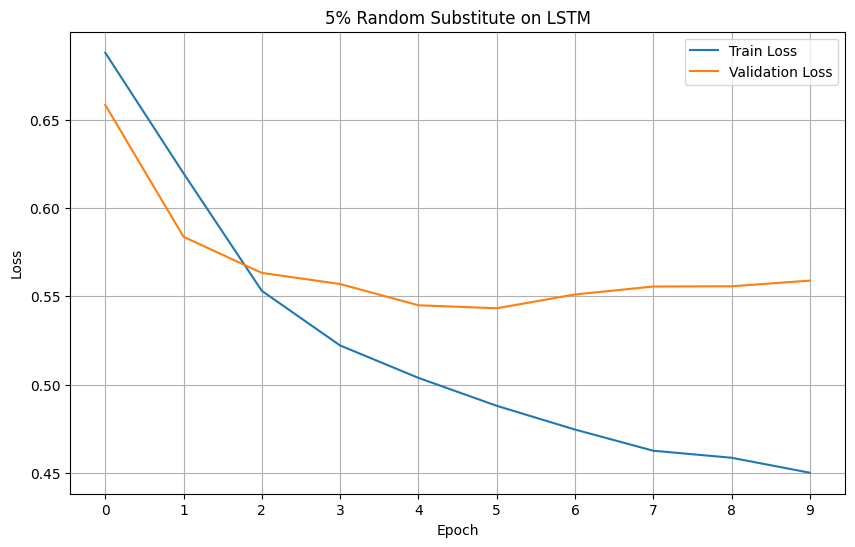

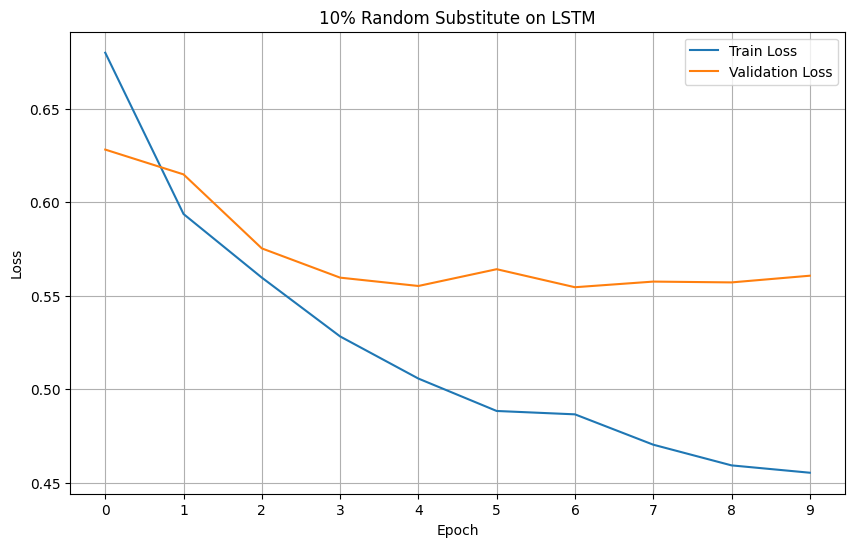

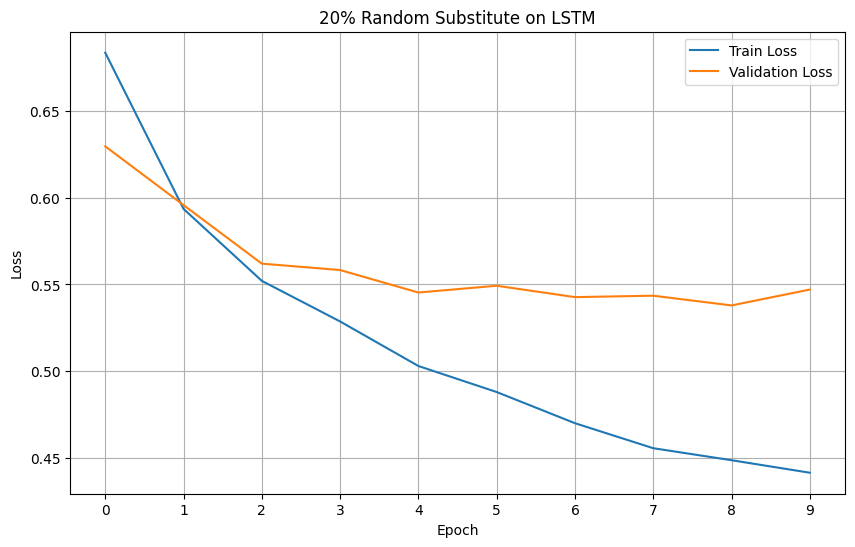

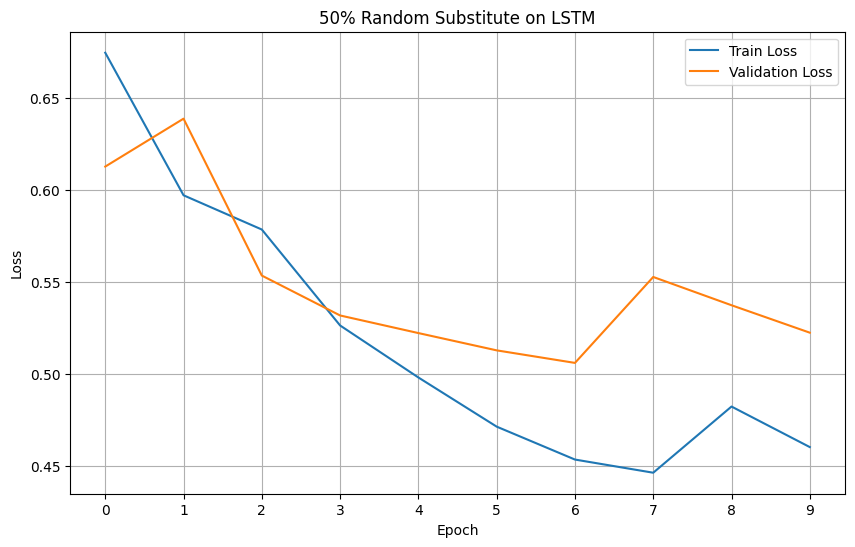

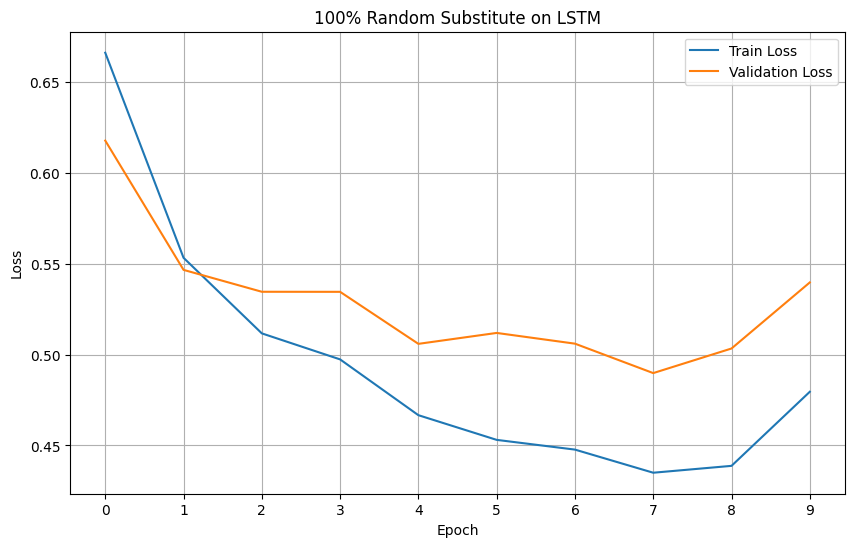

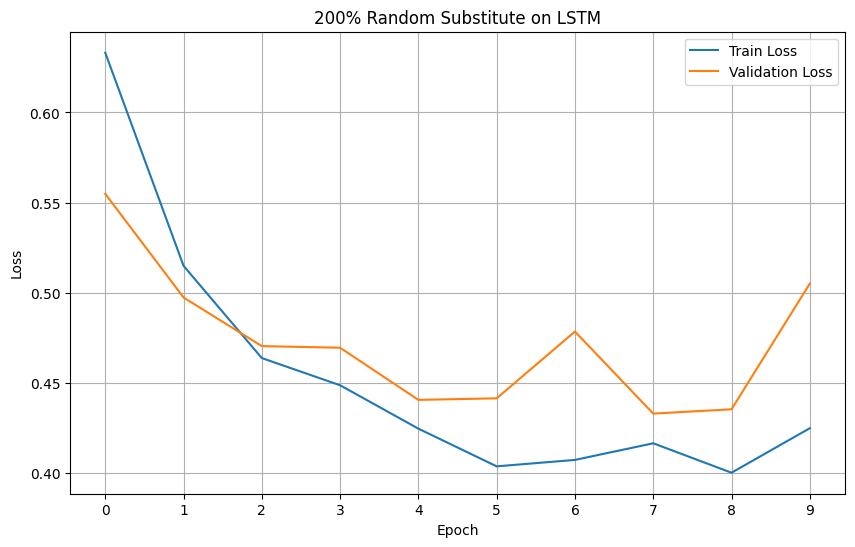

In [25]:
pipeline_random_5_CROP_LSTM.plot_loss(title="5% Random Substitute on LSTM")
pipeline_random_10_CROP_LSTM.plot_loss(title="10% Random Substitute on LSTM")
pipeline_random_20_CROP_LSTM.plot_loss(title="20% Random Substitute on LSTM")
pipeline_random_50_CROP_LSTM.plot_loss(title="50% Random Substitute on LSTM")
pipeline_random_100_CROP_LSTM.plot_loss(title="100% Random Substitute on LSTM")
pipeline_random_200_CROP_LSTM.plot_loss(title="200% Random Substitute on LSTM")

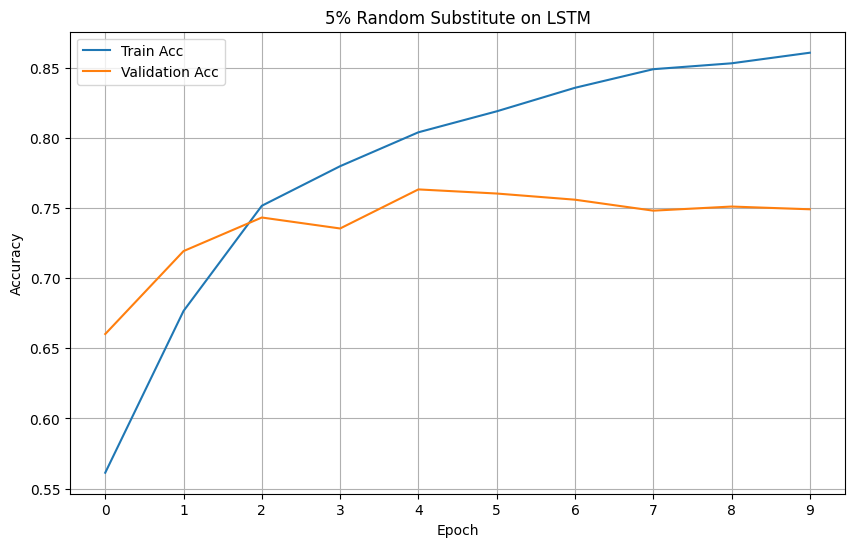

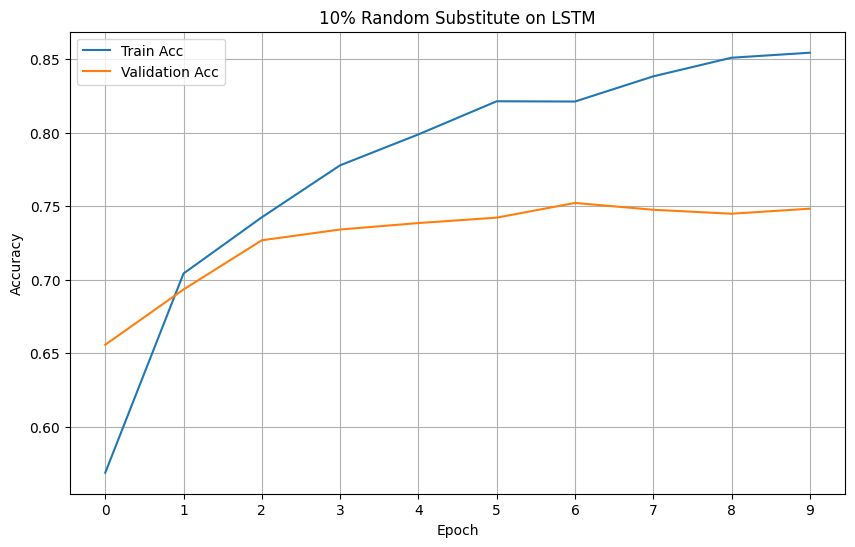

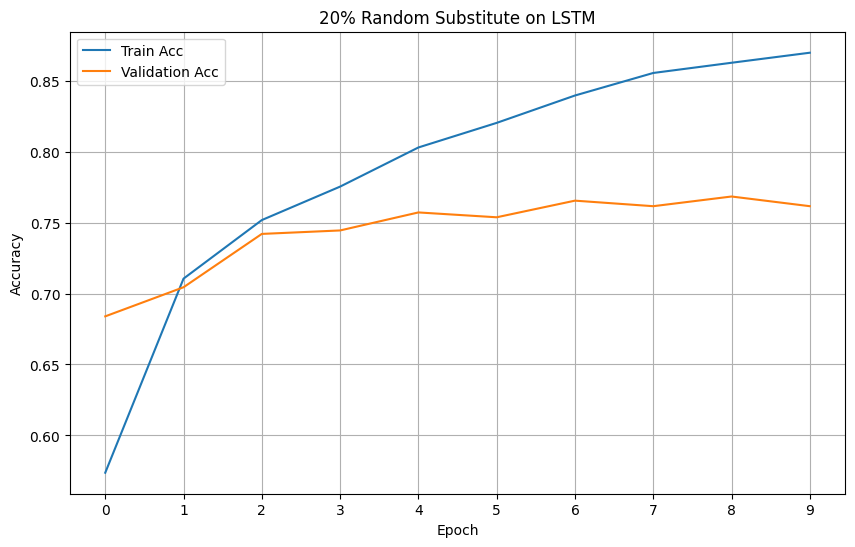

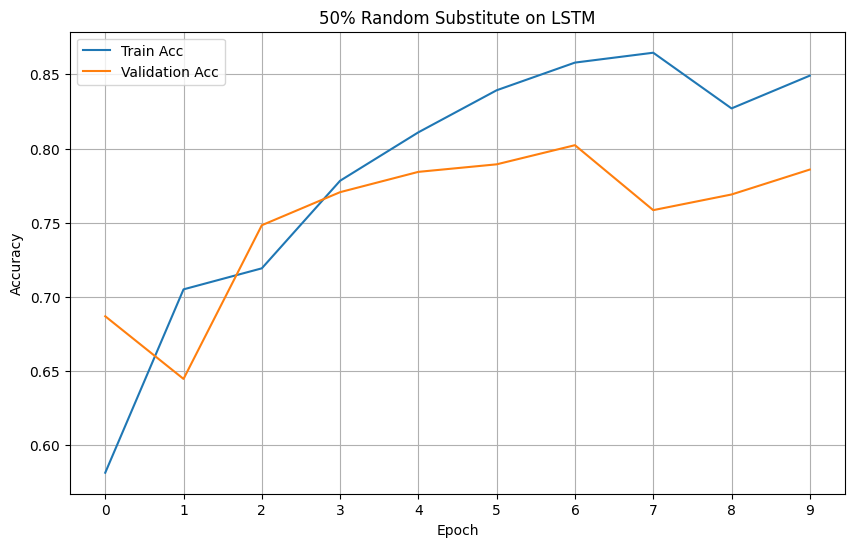

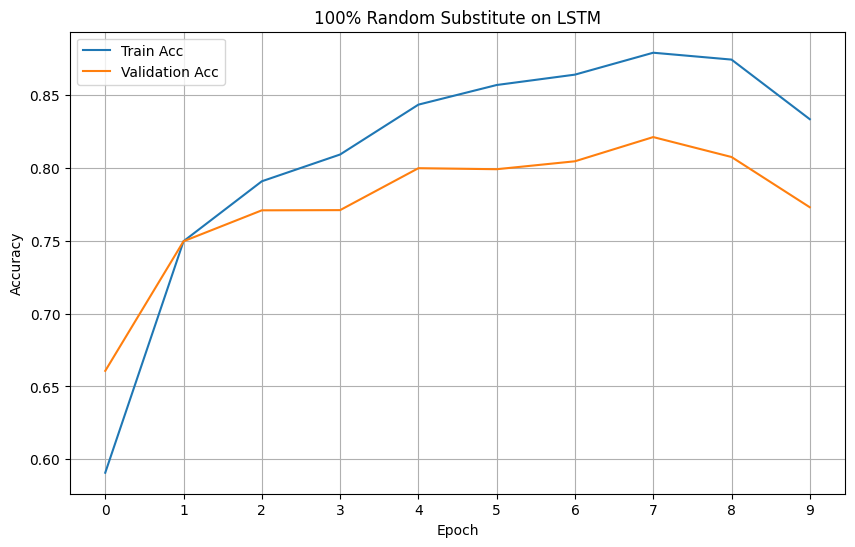

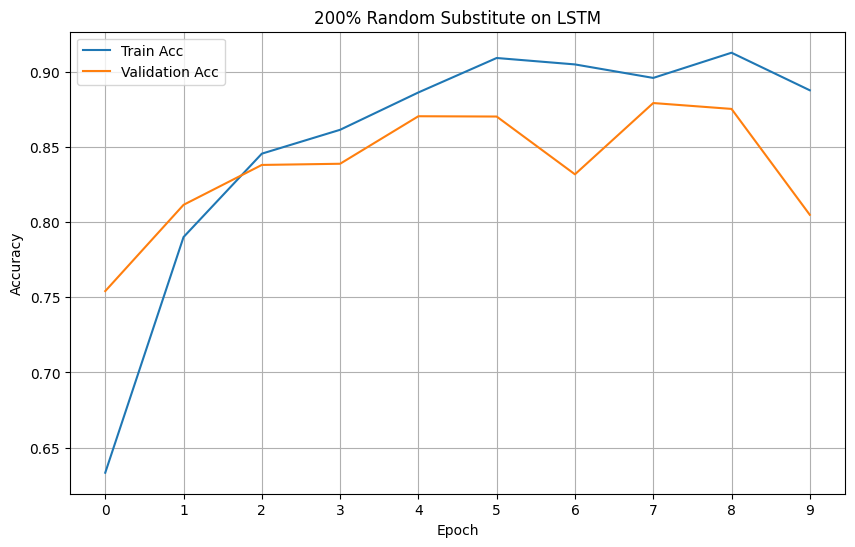

In [26]:
pipeline_random_5_CROP_LSTM.plot_acc(title="5% Random Substitute on LSTM")
pipeline_random_10_CROP_LSTM.plot_acc(title="10% Random Substitute on LSTM")
pipeline_random_20_CROP_LSTM.plot_acc(title="20% Random Substitute on LSTM")
pipeline_random_50_CROP_LSTM.plot_acc(title="50% Random Substitute on LSTM")
pipeline_random_100_CROP_LSTM.plot_acc(title="100% Random Substitute on LSTM")
pipeline_random_200_CROP_LSTM.plot_acc(title="200% Random Substitute on LSTM")

____

# Performance of Random Delete

## Download datasets

In [27]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Augment and Concatenate Dataset to enlarge it

In [28]:
# Augment by 5%, 10%, and 20%
percentage= {
    MODE.RANDOM.DELETE: 0.05,
}
augmented_random_5_CROP = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.DELETE: 0.10,
}
augmented_random_10_CROP = augment_data(original_train_data,  percentage)
percentage= {
    MODE.RANDOM.DELETE: 0.20,
}
augmented_random_20_CROP = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.DELETE: 0.50,
}
augmented_random_50_CROP = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.DELETE: 1.00,
}
augmented_random_100_CROP = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.DELETE: 2.00,
}
augmented_random_200_CROP = augment_data(original_train_data, percentage)

# Convert augmented data into Datasets
augmented_random_5_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_5_CROP],
    "label": [item["label"] for item in augmented_random_5_CROP]
}, features=features)

augmented_random_10_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_10_CROP],
    "label": [item["label"] for item in augmented_random_10_CROP]
}, features=features)

augmented_random_20_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_20_CROP],
    "label": [item["label"] for item in augmented_random_20_CROP]
}, features=features)

augmented_random_50_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_50_CROP],
    "label": [item["label"] for item in augmented_random_50_CROP]
}, features=features)

augmented_random_100_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_100_CROP],
    "label": [item["label"] for item in augmented_random_100_CROP]
}, features=features)

augmented_random_200_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_200_CROP],
    "label": [item["label"] for item in augmented_random_200_CROP]
}, features=features)

# Concatenate original and augmented datasets
augmented_random_train_data_5_CROP = concatenate_datasets([original_train_data, augmented_random_5_CROP_dataset])
augmented_random_train_data_10_CROP = concatenate_datasets([original_train_data, augmented_random_10_CROP_dataset])
augmented_random_train_data_20_CROP = concatenate_datasets([original_train_data, augmented_random_20_CROP_dataset])
augmented_random_train_data_50_CROP = concatenate_datasets([original_train_data, augmented_random_50_CROP_dataset])
augmented_random_train_data_100_CROP = concatenate_datasets([original_train_data, augmented_random_100_CROP_dataset])
augmented_random_train_data_200_CROP = concatenate_datasets([original_train_data, augmented_random_200_CROP_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% augmentation: {len(augmented_random_train_data_5_CROP)}")
print(f"Train size after 10% augmentation: {len(augmented_random_train_data_10_CROP)}")
print(f"Train size after 20% augmentation: {len(augmented_random_train_data_20_CROP)}")
print(f"Train size after 50% augmentation: {len(augmented_random_train_data_50_CROP)}")
print(f"Train size after 100% augmentation: {len(augmented_random_train_data_100_CROP)}")
print(f"Train size after 200% augmentation: {len(augmented_random_train_data_200_CROP)}")

Original train size: 8530
Train size after 5% augmentation: 8956
Train size after 10% augmentation: 9382
Train size after 20% augmentation: 10235
Train size after 50% augmentation: 12794
Train size after 100% augmentation: 17058
Train size after 200% augmentation: 25586


## Build and Train Pipeline - RNN (MaxPooling)

In [29]:
pipeline_random_5_CROP= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_10_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_20_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_50_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_50_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_100_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_100_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_200_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_200_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [30]:
pipeline_random_5_CROP.train_model(n_epochs=10)
pipeline_random_10_CROP.train_model(n_epochs=10)
pipeline_random_20_CROP.train_model(n_epochs=10)
pipeline_random_50_CROP.train_model(n_epochs=10)
pipeline_random_100_CROP.train_model(n_epochs=10)
pipeline_random_200_CROP.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.28it/s]


Epoch: 1/10
Train Loss: 0.673, Train Acc: 0.604
Valid Loss: 0.625, Valid Acc: 0.683


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]


Epoch: 2/10
Train Loss: 0.595, Train Acc: 0.717
Valid Loss: 0.575, Valid Acc: 0.726


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.99it/s]


Epoch: 3/10
Train Loss: 0.558, Train Acc: 0.751
Valid Loss: 0.570, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.56it/s]


Epoch: 4/10
Train Loss: 0.530, Train Acc: 0.782
Valid Loss: 0.548, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.95it/s]


Epoch: 5/10
Train Loss: 0.511, Train Acc: 0.801
Valid Loss: 0.556, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.95it/s]


Epoch: 6/10
Train Loss: 0.494, Train Acc: 0.823
Valid Loss: 0.550, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.11it/s]


Epoch: 7/10
Train Loss: 0.477, Train Acc: 0.837
Valid Loss: 0.544, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.53it/s]


Epoch: 8/10
Train Loss: 0.459, Train Acc: 0.858
Valid Loss: 0.545, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.82it/s]


Epoch: 9/10
Train Loss: 0.446, Train Acc: 0.872
Valid Loss: 0.546, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.22it/s]


Epoch: 10/10
Train Loss: 0.434, Train Acc: 0.884
Valid Loss: 0.545, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.95it/s]


Epoch: 1/10
Train Loss: 0.665, Train Acc: 0.620
Valid Loss: 0.621, Valid Acc: 0.681


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]


Epoch: 2/10
Train Loss: 0.587, Train Acc: 0.719
Valid Loss: 0.572, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.00it/s]


Epoch: 3/10
Train Loss: 0.544, Train Acc: 0.762
Valid Loss: 0.560, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.08it/s]


Epoch: 4/10
Train Loss: 0.528, Train Acc: 0.781
Valid Loss: 0.550, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.35it/s]


Epoch: 5/10
Train Loss: 0.505, Train Acc: 0.808
Valid Loss: 0.544, Valid Acc: 0.763


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.35it/s]


Epoch: 6/10
Train Loss: 0.485, Train Acc: 0.829
Valid Loss: 0.544, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.89it/s]


Epoch: 7/10
Train Loss: 0.466, Train Acc: 0.848
Valid Loss: 0.540, Valid Acc: 0.758


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.49it/s]


Epoch: 8/10
Train Loss: 0.454, Train Acc: 0.863
Valid Loss: 0.534, Valid Acc: 0.766


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.10it/s]


Epoch: 9/10
Train Loss: 0.451, Train Acc: 0.864
Valid Loss: 0.538, Valid Acc: 0.770


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.22it/s]


Epoch: 10/10
Train Loss: 0.438, Train Acc: 0.880
Valid Loss: 0.546, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]


Epoch: 1/10
Train Loss: 0.670, Train Acc: 0.626
Valid Loss: 0.621, Valid Acc: 0.681


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]


Epoch: 2/10
Train Loss: 0.587, Train Acc: 0.727
Valid Loss: 0.577, Valid Acc: 0.723


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]


Epoch: 3/10
Train Loss: 0.556, Train Acc: 0.753
Valid Loss: 0.564, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]


Epoch: 4/10
Train Loss: 0.527, Train Acc: 0.783
Valid Loss: 0.540, Valid Acc: 0.763


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]


Epoch: 5/10
Train Loss: 0.499, Train Acc: 0.814
Valid Loss: 0.535, Valid Acc: 0.765


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.33it/s]


Epoch: 6/10
Train Loss: 0.479, Train Acc: 0.835
Valid Loss: 0.529, Valid Acc: 0.772


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]


Epoch: 7/10
Train Loss: 0.462, Train Acc: 0.853
Valid Loss: 0.525, Valid Acc: 0.781


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]


Epoch: 8/10
Train Loss: 0.452, Train Acc: 0.864
Valid Loss: 0.525, Valid Acc: 0.783


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]


Epoch: 9/10
Train Loss: 0.438, Train Acc: 0.878
Valid Loss: 0.533, Valid Acc: 0.770


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]


Epoch: 10/10
Train Loss: 0.435, Train Acc: 0.881
Valid Loss: 0.536, Valid Acc: 0.766


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.69it/s]


Epoch: 1/10
Train Loss: 0.646, Train Acc: 0.655
Valid Loss: 0.588, Valid Acc: 0.720


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.62it/s]


Epoch: 2/10
Train Loss: 0.565, Train Acc: 0.750
Valid Loss: 0.567, Valid Acc: 0.736


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.56it/s]


Epoch: 3/10
Train Loss: 0.528, Train Acc: 0.779
Valid Loss: 0.530, Valid Acc: 0.778


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.23it/s]


Epoch: 4/10
Train Loss: 0.496, Train Acc: 0.817
Valid Loss: 0.517, Valid Acc: 0.785


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.69it/s]


Epoch: 5/10
Train Loss: 0.474, Train Acc: 0.840
Valid Loss: 0.505, Valid Acc: 0.798


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.85it/s]


Epoch: 6/10
Train Loss: 0.454, Train Acc: 0.861
Valid Loss: 0.525, Valid Acc: 0.781


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]


Epoch: 7/10
Train Loss: 0.440, Train Acc: 0.875
Valid Loss: 0.502, Valid Acc: 0.802


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.82it/s]


Epoch: 8/10
Train Loss: 0.429, Train Acc: 0.887
Valid Loss: 0.494, Valid Acc: 0.813


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.75it/s]


Epoch: 9/10
Train Loss: 0.414, Train Acc: 0.903
Valid Loss: 0.490, Valid Acc: 0.817


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.55it/s]


Epoch: 10/10
Train Loss: 0.405, Train Acc: 0.913
Valid Loss: 0.483, Valid Acc: 0.823


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]


Epoch: 1/10
Train Loss: 0.642, Train Acc: 0.646
Valid Loss: 0.593, Valid Acc: 0.705


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.55it/s]


Epoch: 2/10
Train Loss: 0.559, Train Acc: 0.751
Valid Loss: 0.542, Valid Acc: 0.763


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.81it/s]


Epoch: 3/10
Train Loss: 0.512, Train Acc: 0.801
Valid Loss: 0.529, Valid Acc: 0.778


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]


Epoch: 4/10
Train Loss: 0.476, Train Acc: 0.839
Valid Loss: 0.505, Valid Acc: 0.802


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.30it/s]


Epoch: 5/10
Train Loss: 0.452, Train Acc: 0.866
Valid Loss: 0.504, Valid Acc: 0.802


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.57it/s]


Epoch: 6/10
Train Loss: 0.443, Train Acc: 0.875
Valid Loss: 0.493, Valid Acc: 0.811


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.45it/s]


Epoch: 7/10
Train Loss: 0.424, Train Acc: 0.894
Valid Loss: 0.472, Valid Acc: 0.838


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.56it/s]


Epoch: 8/10
Train Loss: 0.408, Train Acc: 0.910
Valid Loss: 0.464, Valid Acc: 0.848


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.55it/s]


Epoch: 9/10
Train Loss: 0.399, Train Acc: 0.919
Valid Loss: 0.457, Valid Acc: 0.855


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]


Epoch: 10/10
Train Loss: 0.396, Train Acc: 0.920
Valid Loss: 0.451, Valid Acc: 0.860


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.55it/s]


Epoch: 1/10
Train Loss: 0.614, Train Acc: 0.681
Valid Loss: 0.543, Valid Acc: 0.759


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]


Epoch: 2/10
Train Loss: 0.515, Train Acc: 0.795
Valid Loss: 0.504, Valid Acc: 0.804


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.64it/s]


Epoch: 3/10
Train Loss: 0.468, Train Acc: 0.847
Valid Loss: 0.472, Valid Acc: 0.842


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]


Epoch: 4/10
Train Loss: 0.430, Train Acc: 0.886
Valid Loss: 0.443, Valid Acc: 0.874


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]


Epoch: 5/10
Train Loss: 0.404, Train Acc: 0.913
Valid Loss: 0.429, Valid Acc: 0.884


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]


Epoch: 6/10
Train Loss: 0.390, Train Acc: 0.928
Valid Loss: 0.423, Valid Acc: 0.893


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]


Epoch: 7/10
Train Loss: 0.379, Train Acc: 0.938
Valid Loss: 0.406, Valid Acc: 0.910


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]


Epoch: 8/10
Train Loss: 0.370, Train Acc: 0.946
Valid Loss: 0.399, Valid Acc: 0.914


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]


Epoch: 9/10
Train Loss: 0.365, Train Acc: 0.951
Valid Loss: 0.396, Valid Acc: 0.918


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]

Epoch: 10/10
Train Loss: 0.360, Train Acc: 0.956
Valid Loss: 0.389, Valid Acc: 0.924


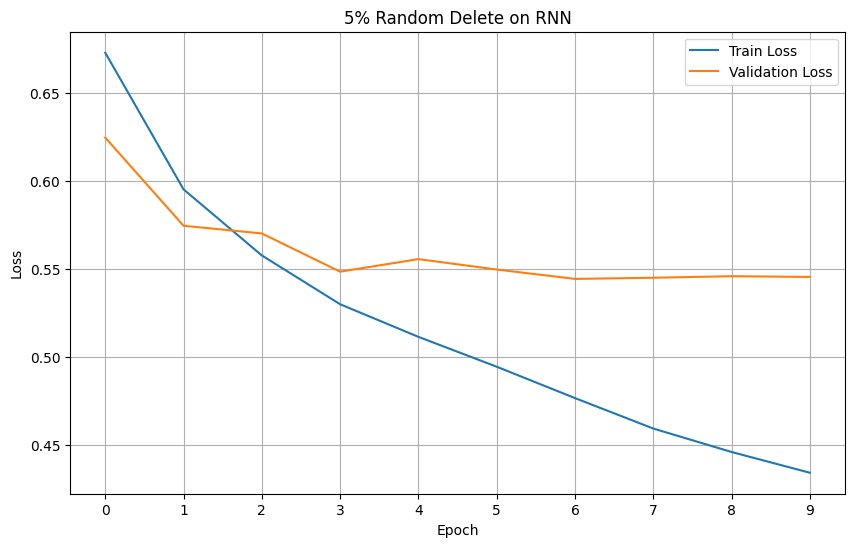

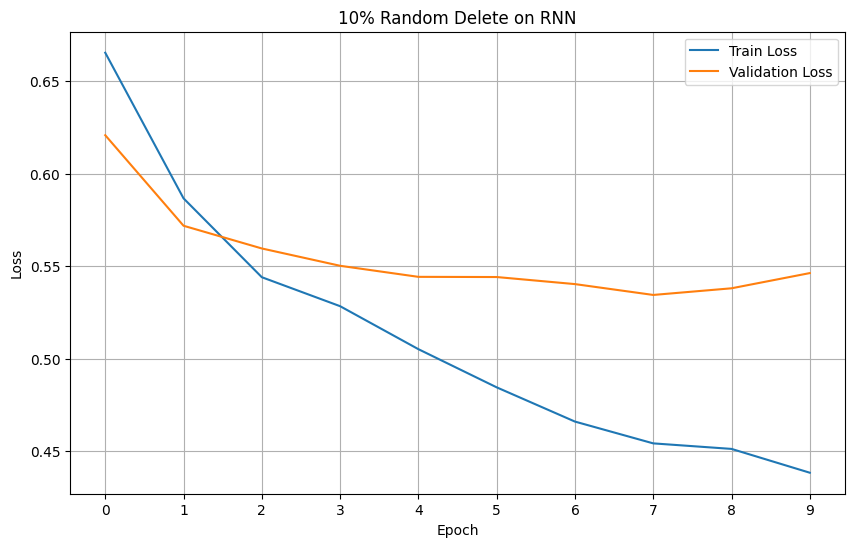

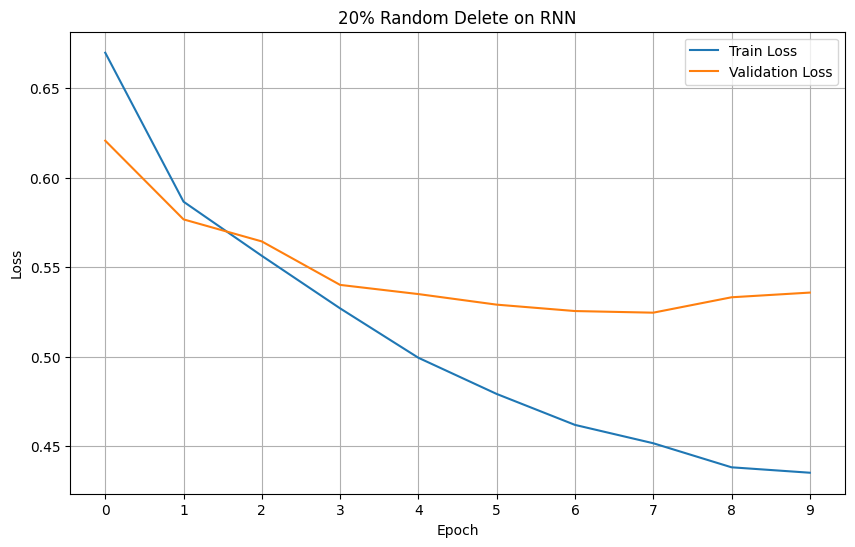

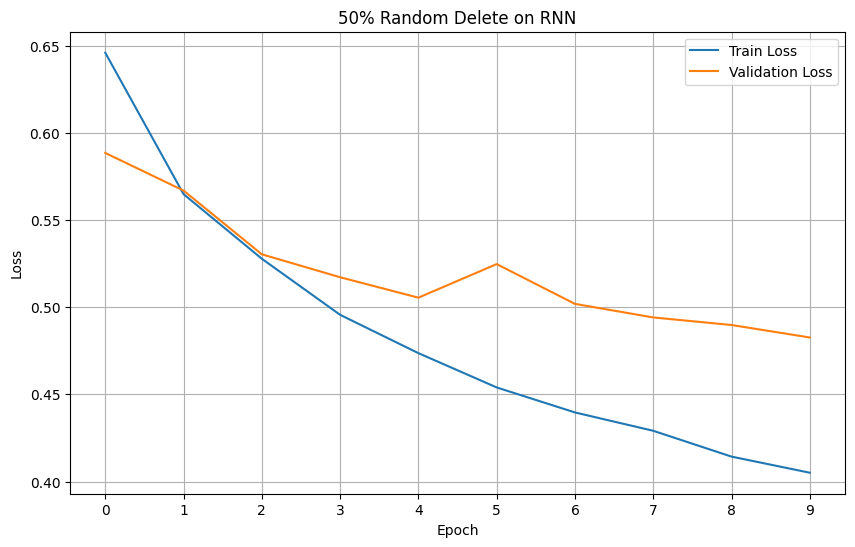

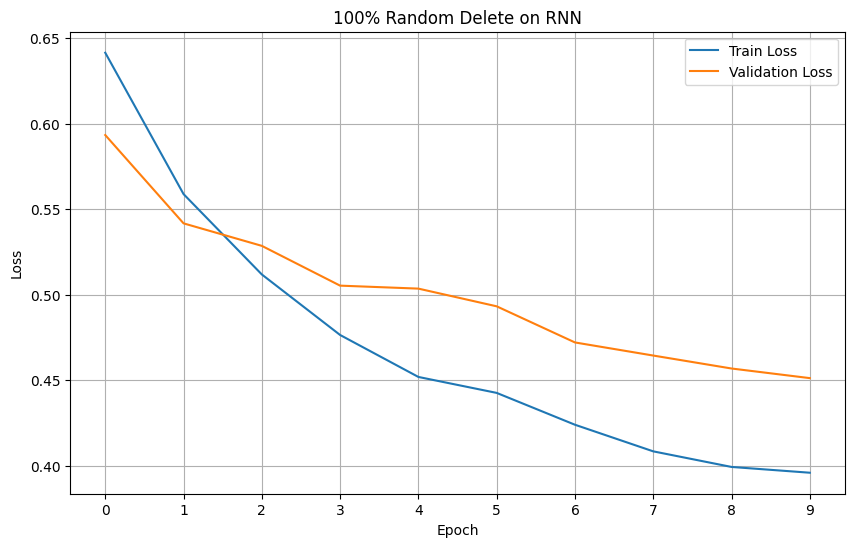

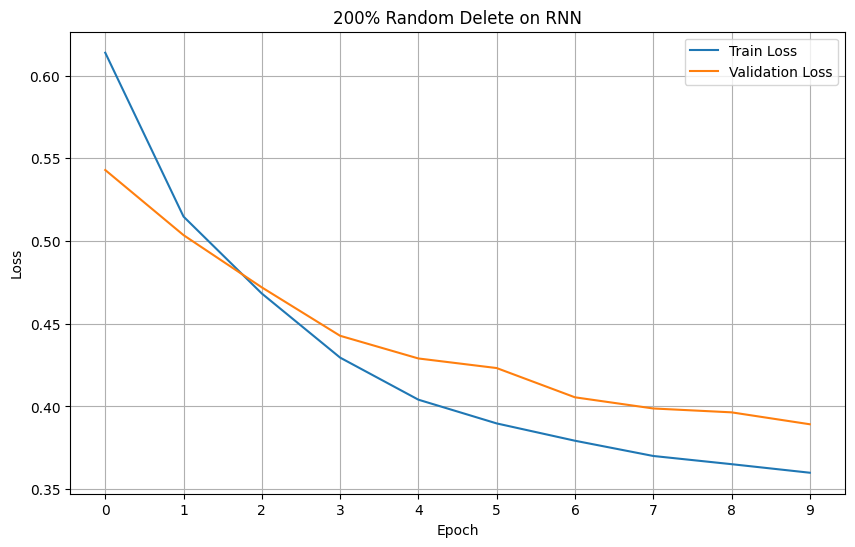

In [31]:
# Plot the acc graph
pipeline_random_5_CROP.plot_loss(title="5% Random Delete on RNN")
pipeline_random_10_CROP.plot_loss(title="10% Random Delete on RNN")
pipeline_random_20_CROP.plot_loss(title="20% Random Delete on RNN")
pipeline_random_50_CROP.plot_loss(title="50% Random Delete on RNN")
pipeline_random_100_CROP.plot_loss(title="100% Random Delete on RNN")
pipeline_random_200_CROP.plot_loss(title="200% Random Delete on RNN")

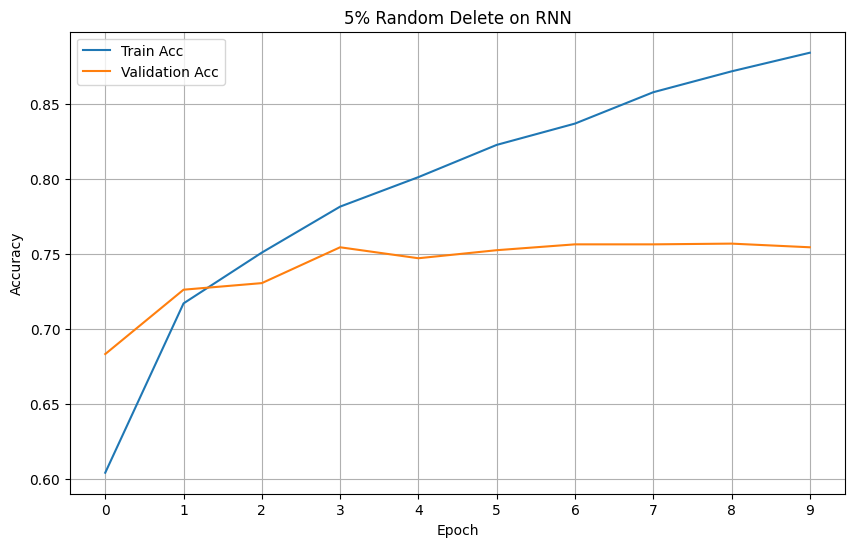

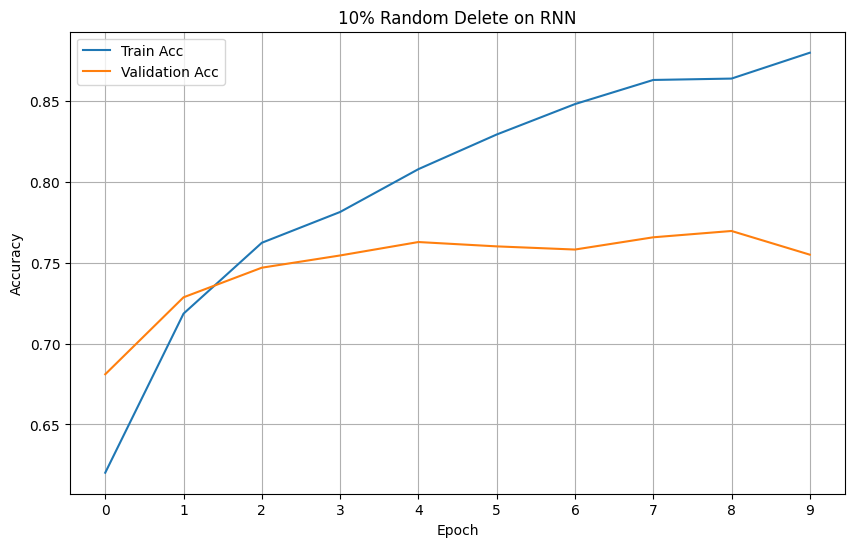

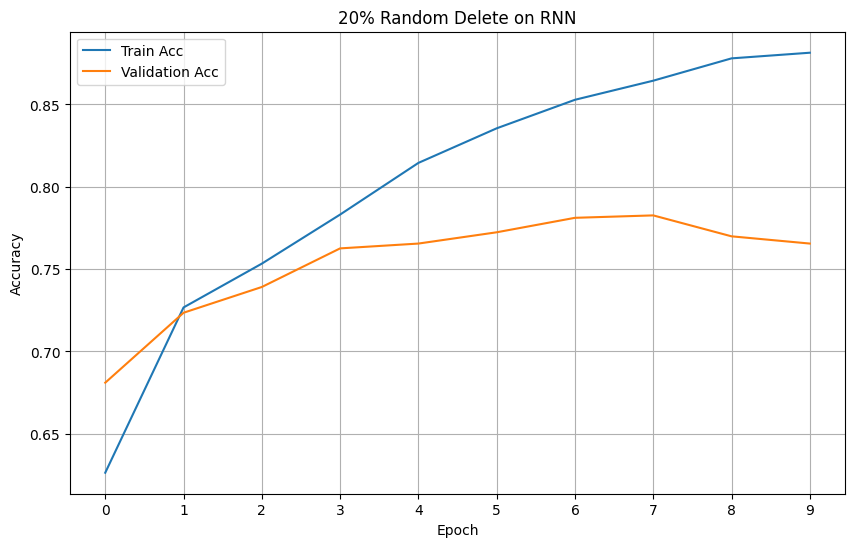

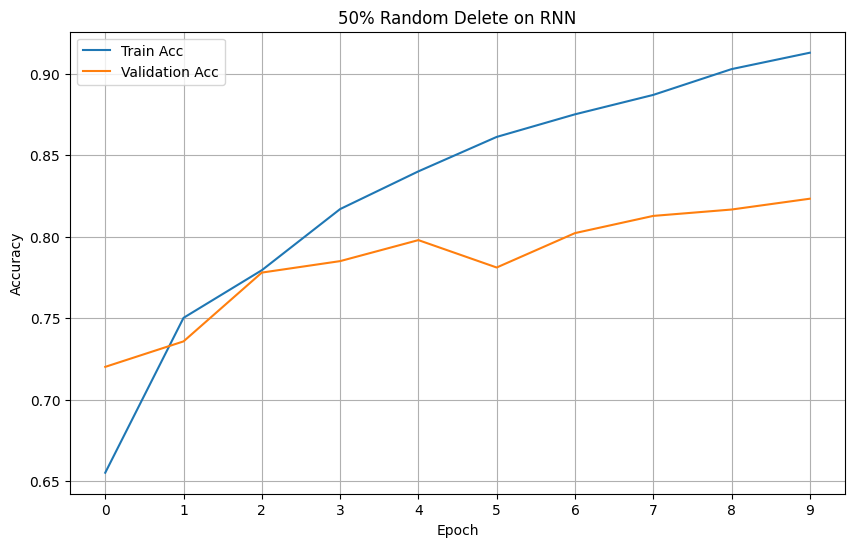

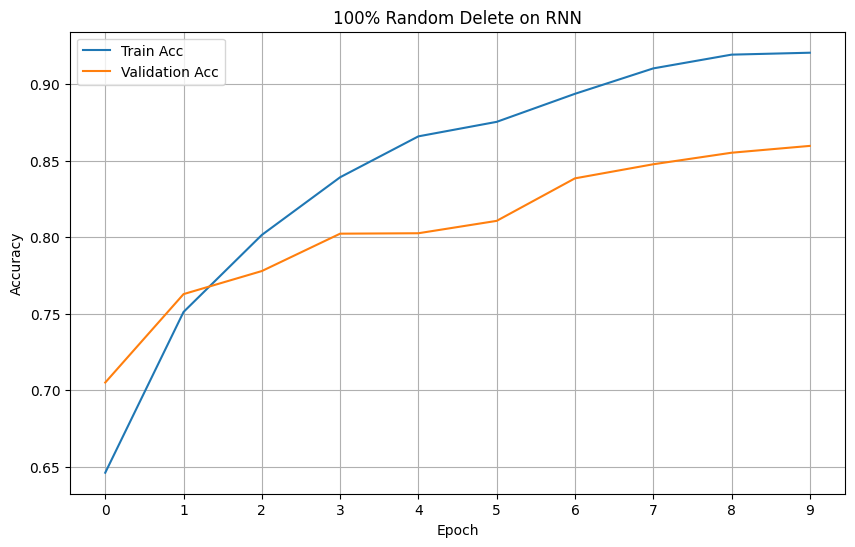

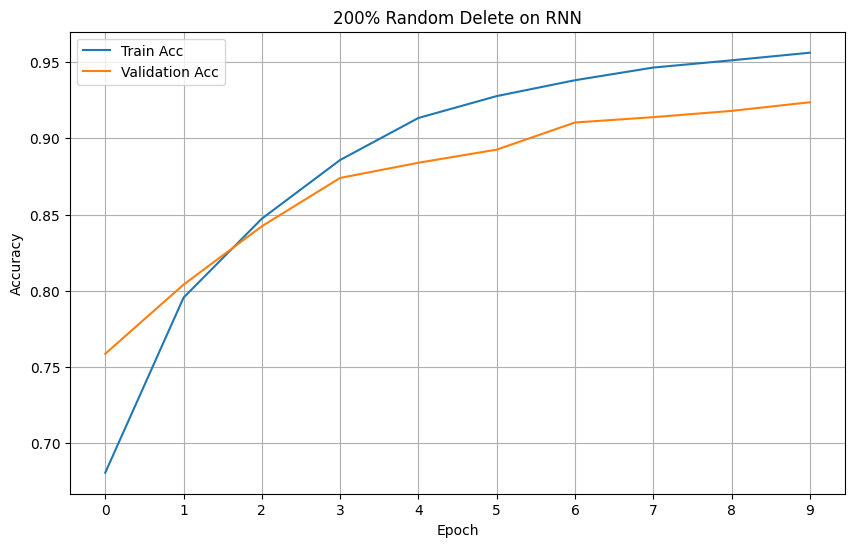

In [32]:
# Plot the acc graph
pipeline_random_5_CROP.plot_acc(title="5% Random Delete on RNN")
pipeline_random_10_CROP.plot_acc(title="10% Random Delete on RNN")
pipeline_random_20_CROP.plot_acc(title="20% Random Delete on RNN")
pipeline_random_50_CROP.plot_acc(title="50% Random Delete on RNN")
pipeline_random_100_CROP.plot_acc(title="100% Random Delete on RNN")
pipeline_random_200_CROP.plot_acc(title="200% Random Delete on RNN")

## Build and Train Pipelines - LSTM

In [33]:
pipeline_random_5_CROP_LSTM= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_10_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_20_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_50_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_50_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_100_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_100_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_200_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_200_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [34]:
pipeline_random_5_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_10_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_20_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_50_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_100_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_200_CROP_LSTM.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]


Epoch: 1/10
Train Loss: 0.688, Train Acc: 0.549
Valid Loss: 0.660, Valid Acc: 0.667


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]


Epoch: 2/10
Train Loss: 0.606, Train Acc: 0.695
Valid Loss: 0.574, Valid Acc: 0.720


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


Epoch: 3/10
Train Loss: 0.550, Train Acc: 0.745
Valid Loss: 0.550, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]


Epoch: 4/10
Train Loss: 0.526, Train Acc: 0.778
Valid Loss: 0.548, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]


Epoch: 5/10
Train Loss: 0.509, Train Acc: 0.795
Valid Loss: 0.543, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]


Epoch: 6/10
Train Loss: 0.496, Train Acc: 0.808
Valid Loss: 0.536, Valid Acc: 0.771


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]


Epoch: 7/10
Train Loss: 0.477, Train Acc: 0.831
Valid Loss: 0.546, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


Epoch: 8/10
Train Loss: 0.488, Train Acc: 0.818
Valid Loss: 0.551, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]


Epoch: 9/10
Train Loss: 0.466, Train Acc: 0.841
Valid Loss: 0.543, Valid Acc: 0.763


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]


Epoch: 10/10
Train Loss: 0.454, Train Acc: 0.857
Valid Loss: 0.544, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]


Epoch: 1/10
Train Loss: 0.684, Train Acc: 0.579
Valid Loss: 0.639, Valid Acc: 0.632


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]


Epoch: 2/10
Train Loss: 0.603, Train Acc: 0.692
Valid Loss: 0.602, Valid Acc: 0.677


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


Epoch: 3/10
Train Loss: 0.561, Train Acc: 0.742
Valid Loss: 0.567, Valid Acc: 0.727


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


Epoch: 4/10
Train Loss: 0.530, Train Acc: 0.772
Valid Loss: 0.551, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]


Epoch: 5/10
Train Loss: 0.507, Train Acc: 0.800
Valid Loss: 0.552, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


Epoch: 6/10
Train Loss: 0.486, Train Acc: 0.822
Valid Loss: 0.545, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


Epoch: 7/10
Train Loss: 0.485, Train Acc: 0.823
Valid Loss: 0.559, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


Epoch: 8/10
Train Loss: 0.478, Train Acc: 0.830
Valid Loss: 0.548, Valid Acc: 0.758


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


Epoch: 9/10
Train Loss: 0.456, Train Acc: 0.853
Valid Loss: 0.550, Valid Acc: 0.749


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


Epoch: 10/10
Train Loss: 0.443, Train Acc: 0.870
Valid Loss: 0.558, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]


Epoch: 1/10
Train Loss: 0.683, Train Acc: 0.575
Valid Loss: 0.637, Valid Acc: 0.651


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]


Epoch: 2/10
Train Loss: 0.589, Train Acc: 0.710
Valid Loss: 0.596, Valid Acc: 0.706


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


Epoch: 3/10
Train Loss: 0.537, Train Acc: 0.763
Valid Loss: 0.569, Valid Acc: 0.721


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]


Epoch: 4/10
Train Loss: 0.513, Train Acc: 0.788
Valid Loss: 0.571, Valid Acc: 0.727


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]


Epoch: 5/10
Train Loss: 0.494, Train Acc: 0.813
Valid Loss: 0.555, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]


Epoch: 6/10
Train Loss: 0.473, Train Acc: 0.835
Valid Loss: 0.559, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]


Epoch: 7/10
Train Loss: 0.460, Train Acc: 0.852
Valid Loss: 0.553, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]


Epoch: 8/10
Train Loss: 0.455, Train Acc: 0.855
Valid Loss: 0.559, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]


Epoch: 9/10
Train Loss: 0.447, Train Acc: 0.864
Valid Loss: 0.542, Valid Acc: 0.768


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]


Epoch: 10/10
Train Loss: 0.442, Train Acc: 0.870
Valid Loss: 0.556, Valid Acc: 0.745


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


Epoch: 1/10
Train Loss: 0.676, Train Acc: 0.573
Valid Loss: 0.624, Valid Acc: 0.676


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]


Epoch: 2/10
Train Loss: 0.566, Train Acc: 0.737
Valid Loss: 0.577, Valid Acc: 0.726


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]


Epoch: 3/10
Train Loss: 0.528, Train Acc: 0.772
Valid Loss: 0.555, Valid Acc: 0.748


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


Epoch: 4/10
Train Loss: 0.499, Train Acc: 0.807
Valid Loss: 0.538, Valid Acc: 0.768


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]


Epoch: 5/10
Train Loss: 0.492, Train Acc: 0.809
Valid Loss: 0.540, Valid Acc: 0.768


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


Epoch: 6/10
Train Loss: 0.492, Train Acc: 0.818
Valid Loss: 0.543, Valid Acc: 0.760


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


Epoch: 7/10
Train Loss: 0.469, Train Acc: 0.842
Valid Loss: 0.556, Valid Acc: 0.753


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


Epoch: 8/10
Train Loss: 0.459, Train Acc: 0.849
Valid Loss: 0.537, Valid Acc: 0.762


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


Epoch: 9/10
Train Loss: 0.479, Train Acc: 0.830
Valid Loss: 0.585, Valid Acc: 0.724


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]


Epoch: 10/10
Train Loss: 0.481, Train Acc: 0.830
Valid Loss: 0.555, Valid Acc: 0.758


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]


Epoch: 1/10
Train Loss: 0.659, Train Acc: 0.593
Valid Loss: 0.583, Valid Acc: 0.717


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]


Epoch: 2/10
Train Loss: 0.561, Train Acc: 0.746
Valid Loss: 0.551, Valid Acc: 0.747


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Epoch: 3/10
Train Loss: 0.546, Train Acc: 0.760
Valid Loss: 0.544, Valid Acc: 0.760


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Epoch: 4/10
Train Loss: 0.515, Train Acc: 0.790
Valid Loss: 0.529, Valid Acc: 0.779


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Epoch: 5/10
Train Loss: 0.500, Train Acc: 0.809
Valid Loss: 0.526, Valid Acc: 0.786


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Epoch: 6/10
Train Loss: 0.480, Train Acc: 0.828
Valid Loss: 0.514, Valid Acc: 0.794


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Epoch: 7/10
Train Loss: 0.463, Train Acc: 0.847
Valid Loss: 0.502, Valid Acc: 0.806


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]


Epoch: 8/10
Train Loss: 0.456, Train Acc: 0.856
Valid Loss: 0.517, Valid Acc: 0.791


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]


Epoch: 9/10
Train Loss: 0.455, Train Acc: 0.857
Valid Loss: 0.505, Valid Acc: 0.806


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]


Epoch: 10/10
Train Loss: 0.477, Train Acc: 0.834
Valid Loss: 0.526, Valid Acc: 0.784


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]


Epoch: 1/10
Train Loss: 0.628, Train Acc: 0.645
Valid Loss: 0.542, Valid Acc: 0.764


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


Epoch: 2/10
Train Loss: 0.513, Train Acc: 0.791
Valid Loss: 0.498, Valid Acc: 0.810


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]


Epoch: 3/10
Train Loss: 0.471, Train Acc: 0.837
Valid Loss: 0.473, Valid Acc: 0.837


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]


Epoch: 4/10
Train Loss: 0.444, Train Acc: 0.867
Valid Loss: 0.458, Valid Acc: 0.854


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]


Epoch: 5/10
Train Loss: 0.423, Train Acc: 0.889
Valid Loss: 0.443, Valid Acc: 0.868


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


Epoch: 6/10
Train Loss: 0.412, Train Acc: 0.900
Valid Loss: 0.436, Valid Acc: 0.875


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


Epoch: 7/10
Train Loss: 0.402, Train Acc: 0.911
Valid Loss: 0.438, Valid Acc: 0.873


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


Epoch: 8/10
Train Loss: 0.431, Train Acc: 0.880
Valid Loss: 0.605, Valid Acc: 0.708


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]


Epoch: 9/10
Train Loss: 0.514, Train Acc: 0.798
Valid Loss: 0.525, Valid Acc: 0.788


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

Epoch: 10/10
Train Loss: 0.435, Train Acc: 0.878
Valid Loss: 0.448, Valid Acc: 0.863


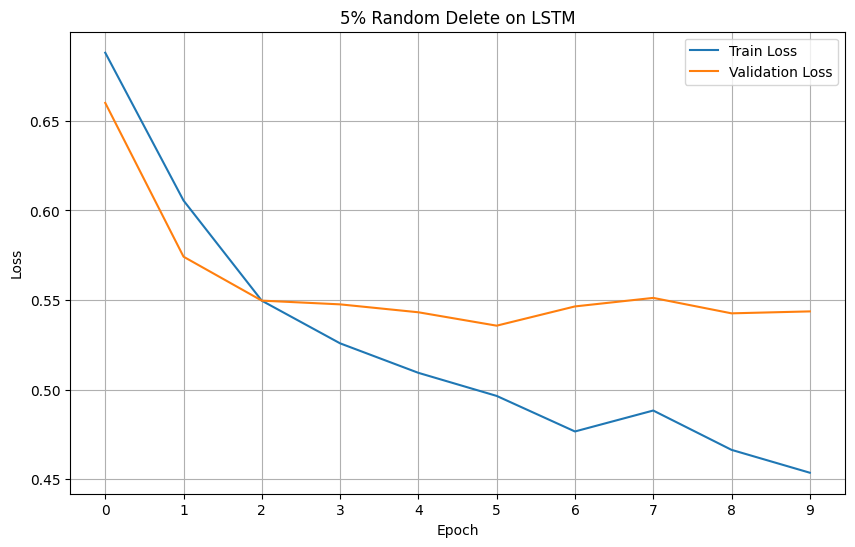

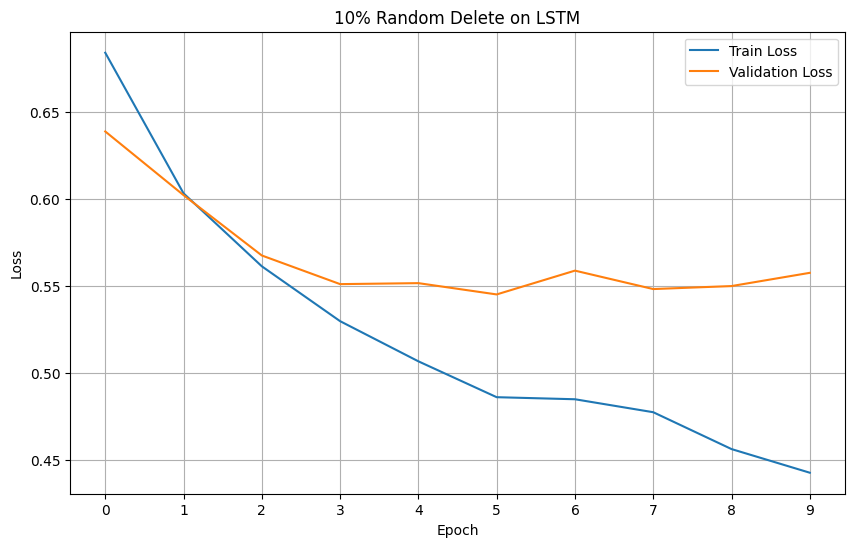

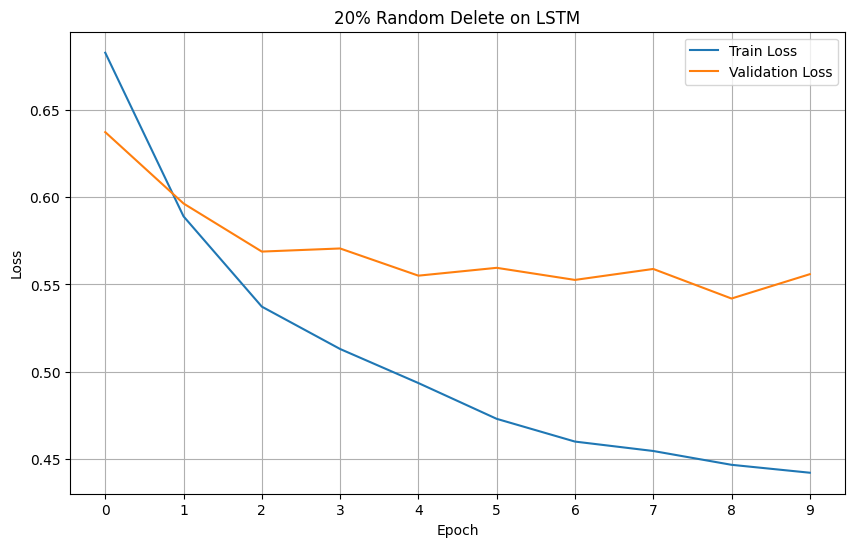

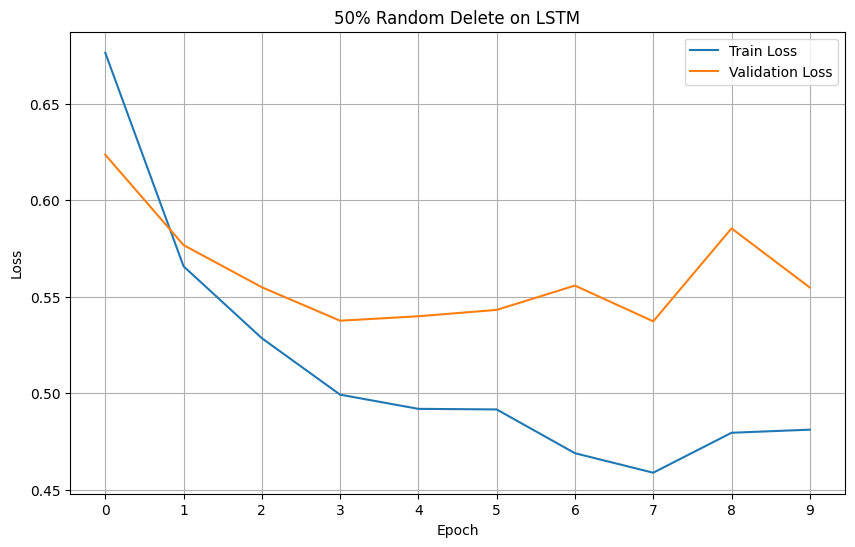

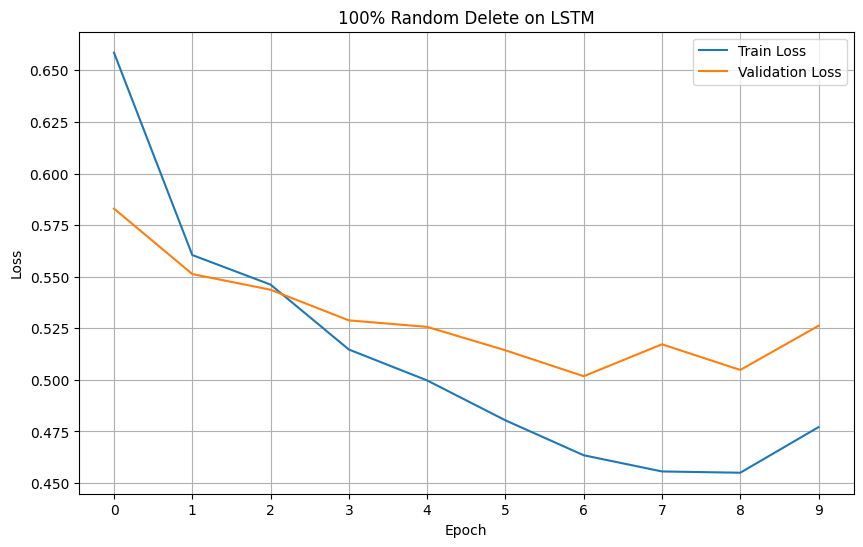

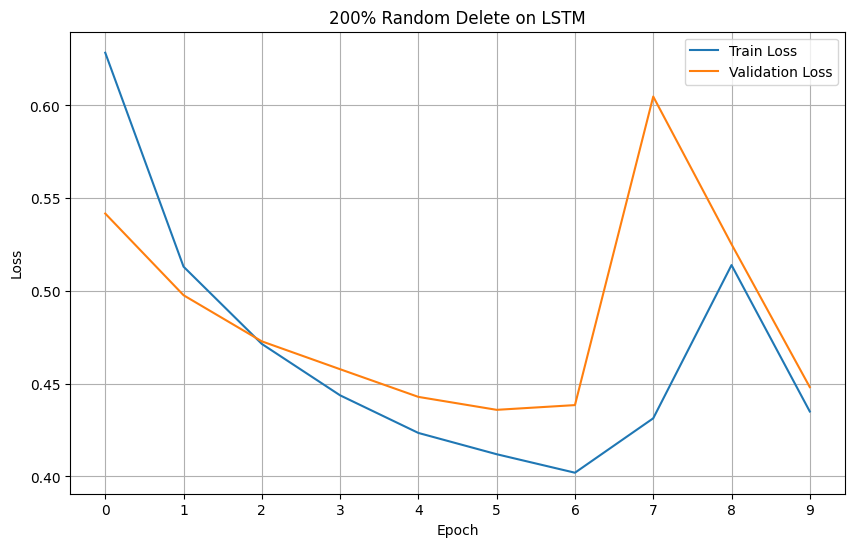

In [35]:
pipeline_random_5_CROP_LSTM.plot_loss(title="5% Random Delete on LSTM")
pipeline_random_10_CROP_LSTM.plot_loss(title="10% Random Delete on LSTM")
pipeline_random_20_CROP_LSTM.plot_loss(title="20% Random Delete on LSTM")
pipeline_random_50_CROP_LSTM.plot_loss(title="50% Random Delete on LSTM")
pipeline_random_100_CROP_LSTM.plot_loss(title="100% Random Delete on LSTM")
pipeline_random_200_CROP_LSTM.plot_loss(title="200% Random Delete on LSTM")

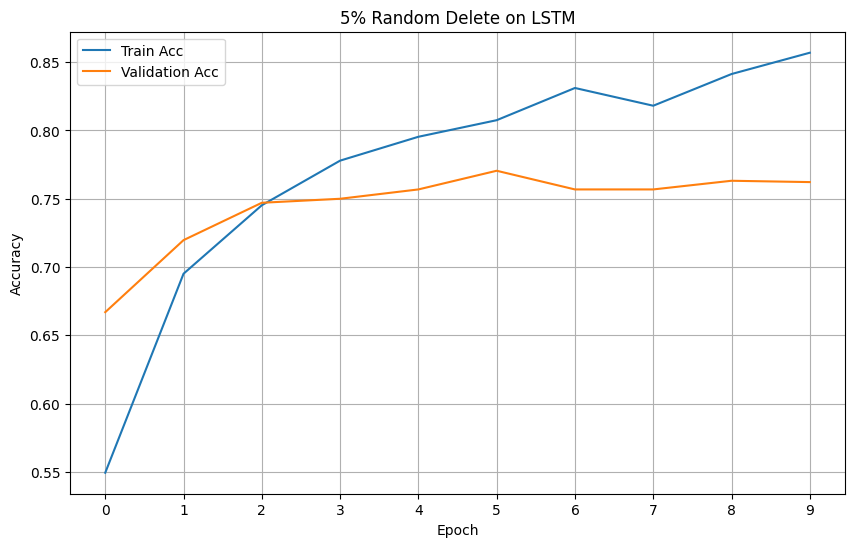

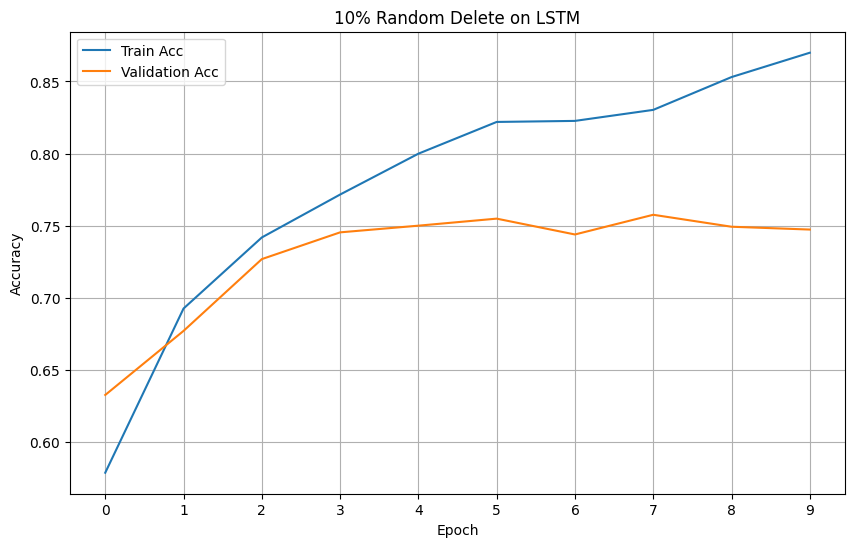

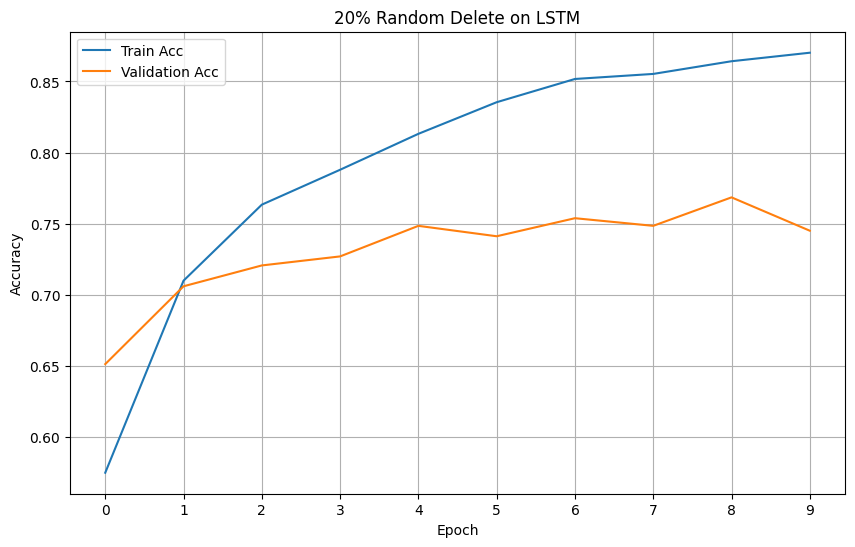

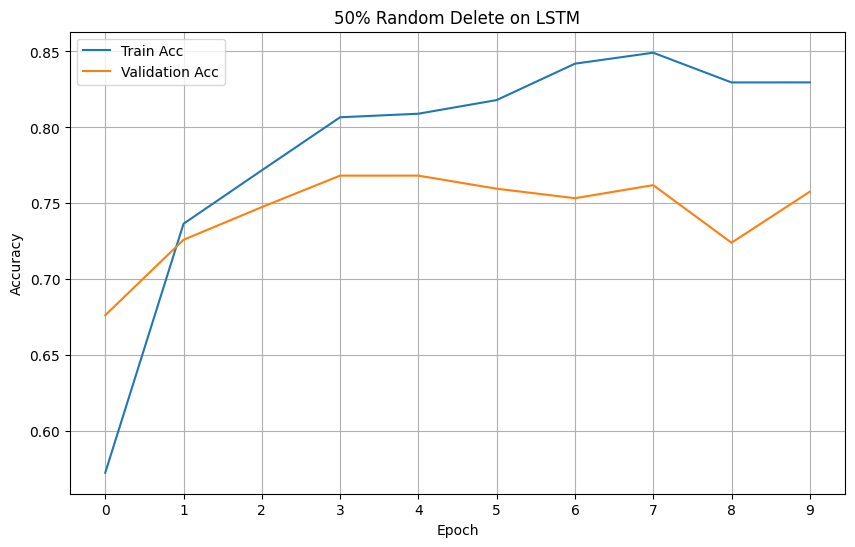

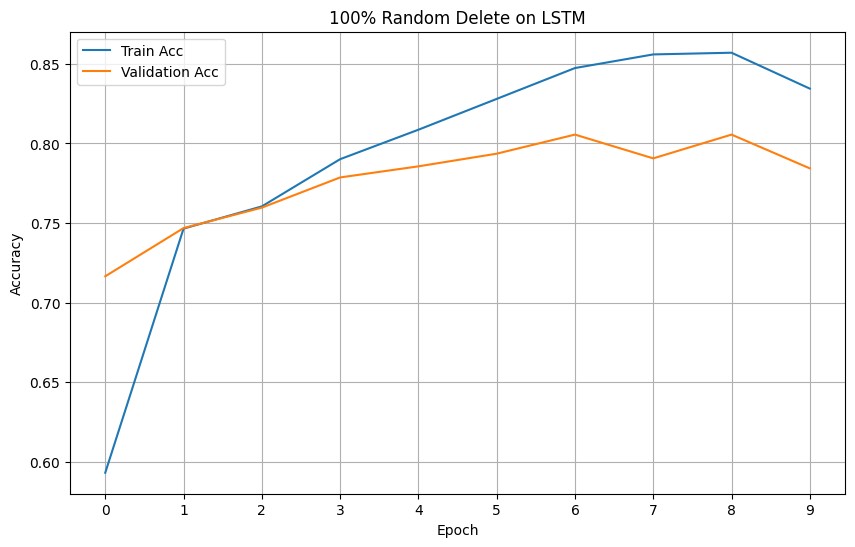

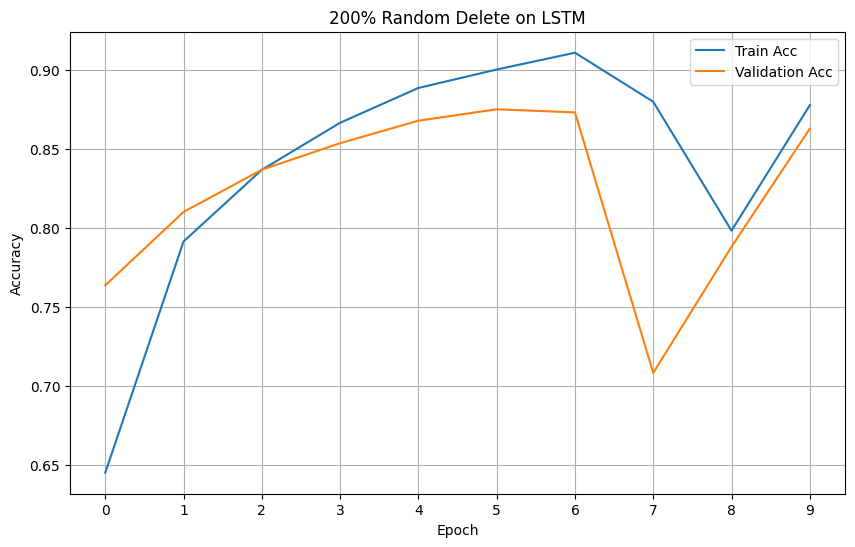

In [36]:
pipeline_random_5_CROP_LSTM.plot_acc(title="5% Random Delete on LSTM")
pipeline_random_10_CROP_LSTM.plot_acc(title="10% Random Delete on LSTM")
pipeline_random_20_CROP_LSTM.plot_acc(title="20% Random Delete on LSTM")
pipeline_random_50_CROP_LSTM.plot_acc(title="50% Random Delete on LSTM")
pipeline_random_100_CROP_LSTM.plot_acc(title="100% Random Delete on LSTM")
pipeline_random_200_CROP_LSTM.plot_acc(title="200% Random Delete on LSTM")

____

# Performance of Random Crop

## Download datasets

In [37]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Augment and Concatenate Dataset to enlarge it

In [38]:
# Augment by 5%, 10%, and 20%
percentage= {
    MODE.RANDOM.CROP: 0.05,
}
augmented_random_5_CROP = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.CROP: 0.10,
}
augmented_random_10_CROP = augment_data(original_train_data,  percentage)
percentage= {
    MODE.RANDOM.CROP: 0.20,
}
augmented_random_20_CROP = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.CROP: 0.50,
}
augmented_random_50_CROP = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.CROP: 1.00,
}
augmented_random_100_CROP = augment_data(original_train_data, percentage)
percentage= {
    MODE.RANDOM.CROP: 2.00,
}
augmented_random_200_CROP = augment_data(original_train_data, percentage)

# Convert augmented data into Datasets
augmented_random_5_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_5_CROP],
    "label": [item["label"] for item in augmented_random_5_CROP]
}, features=features)

augmented_random_10_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_10_CROP],
    "label": [item["label"] for item in augmented_random_10_CROP]
}, features=features)

augmented_random_20_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_20_CROP],
    "label": [item["label"] for item in augmented_random_20_CROP]
}, features=features)

augmented_random_50_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_50_CROP],
    "label": [item["label"] for item in augmented_random_50_CROP]
}, features=features)

augmented_random_100_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_100_CROP],
    "label": [item["label"] for item in augmented_random_100_CROP]
}, features=features)

augmented_random_200_CROP_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_200_CROP],
    "label": [item["label"] for item in augmented_random_200_CROP]
}, features=features)

# Concatenate original and augmented datasets
augmented_random_train_data_5_CROP = concatenate_datasets([original_train_data, augmented_random_5_CROP_dataset])
augmented_random_train_data_10_CROP = concatenate_datasets([original_train_data, augmented_random_10_CROP_dataset])
augmented_random_train_data_20_CROP = concatenate_datasets([original_train_data, augmented_random_20_CROP_dataset])
augmented_random_train_data_50_CROP = concatenate_datasets([original_train_data, augmented_random_50_CROP_dataset])
augmented_random_train_data_100_CROP = concatenate_datasets([original_train_data, augmented_random_100_CROP_dataset])
augmented_random_train_data_200_CROP = concatenate_datasets([original_train_data, augmented_random_200_CROP_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% augmentation: {len(augmented_random_train_data_5_CROP)}")
print(f"Train size after 10% augmentation: {len(augmented_random_train_data_10_CROP)}")
print(f"Train size after 20% augmentation: {len(augmented_random_train_data_20_CROP)}")
print(f"Train size after 50% augmentation: {len(augmented_random_train_data_50_CROP)}")
print(f"Train size after 100% augmentation: {len(augmented_random_train_data_100_CROP)}")
print(f"Train size after 200% augmentation: {len(augmented_random_train_data_200_CROP)}")

Original train size: 8530
Train size after 5% augmentation: 8956
Train size after 10% augmentation: 9382
Train size after 20% augmentation: 10235
Train size after 50% augmentation: 12794
Train size after 100% augmentation: 17058
Train size after 200% augmentation: 25586


## Build and Train Pipeline - RNN (MaxPooling)

In [39]:
pipeline_random_5_CROP= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_10_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_20_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_50_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_50_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_100_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_100_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_200_CROP = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_200_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [40]:
pipeline_random_5_CROP.train_model(n_epochs=10)
pipeline_random_10_CROP.train_model(n_epochs=10)
pipeline_random_20_CROP.train_model(n_epochs=10)
pipeline_random_50_CROP.train_model(n_epochs=10)
pipeline_random_100_CROP.train_model(n_epochs=10)
pipeline_random_200_CROP.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.81it/s]


Epoch: 1/10
Train Loss: 0.678, Train Acc: 0.597
Valid Loss: 0.635, Valid Acc: 0.671


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.79it/s]


Epoch: 2/10
Train Loss: 0.611, Train Acc: 0.693
Valid Loss: 0.590, Valid Acc: 0.718


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.49it/s]


Epoch: 3/10
Train Loss: 0.559, Train Acc: 0.749
Valid Loss: 0.571, Valid Acc: 0.733


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.41it/s]


Epoch: 4/10
Train Loss: 0.530, Train Acc: 0.777
Valid Loss: 0.569, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.81it/s]


Epoch: 5/10
Train Loss: 0.508, Train Acc: 0.804
Valid Loss: 0.563, Valid Acc: 0.733


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.82it/s]


Epoch: 6/10
Train Loss: 0.492, Train Acc: 0.822
Valid Loss: 0.559, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.31it/s]


Epoch: 7/10
Train Loss: 0.480, Train Acc: 0.834
Valid Loss: 0.552, Valid Acc: 0.749


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.51it/s]


Epoch: 8/10
Train Loss: 0.483, Train Acc: 0.830
Valid Loss: 0.551, Valid Acc: 0.743


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.56it/s]


Epoch: 9/10
Train Loss: 0.463, Train Acc: 0.853
Valid Loss: 0.560, Valid Acc: 0.738


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.50it/s]


Epoch: 10/10
Train Loss: 0.445, Train Acc: 0.870
Valid Loss: 0.555, Valid Acc: 0.749


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.98it/s]


Epoch: 1/10
Train Loss: 0.664, Train Acc: 0.625
Valid Loss: 0.627, Valid Acc: 0.670


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.21it/s]


Epoch: 2/10
Train Loss: 0.592, Train Acc: 0.718
Valid Loss: 0.581, Valid Acc: 0.711


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.82it/s]


Epoch: 3/10
Train Loss: 0.553, Train Acc: 0.755
Valid Loss: 0.562, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.90it/s]


Epoch: 4/10
Train Loss: 0.522, Train Acc: 0.791
Valid Loss: 0.551, Valid Acc: 0.743


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]


Epoch: 5/10
Train Loss: 0.503, Train Acc: 0.810
Valid Loss: 0.541, Valid Acc: 0.761


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.06it/s]


Epoch: 6/10
Train Loss: 0.482, Train Acc: 0.834
Valid Loss: 0.548, Valid Acc: 0.751


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.06it/s]


Epoch: 7/10
Train Loss: 0.472, Train Acc: 0.843
Valid Loss: 0.541, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.56it/s]


Epoch: 8/10
Train Loss: 0.457, Train Acc: 0.859
Valid Loss: 0.537, Valid Acc: 0.764


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]


Epoch: 9/10
Train Loss: 0.444, Train Acc: 0.873
Valid Loss: 0.530, Valid Acc: 0.775


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.28it/s]


Epoch: 10/10
Train Loss: 0.432, Train Acc: 0.885
Valid Loss: 0.530, Valid Acc: 0.773


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]


Epoch: 1/10
Train Loss: 0.665, Train Acc: 0.623
Valid Loss: 0.630, Valid Acc: 0.666


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]


Epoch: 2/10
Train Loss: 0.591, Train Acc: 0.718
Valid Loss: 0.594, Valid Acc: 0.708


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]


Epoch: 3/10
Train Loss: 0.559, Train Acc: 0.750
Valid Loss: 0.563, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.32it/s]


Epoch: 4/10
Train Loss: 0.525, Train Acc: 0.785
Valid Loss: 0.539, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]


Epoch: 5/10
Train Loss: 0.501, Train Acc: 0.810
Valid Loss: 0.532, Valid Acc: 0.778


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]


Epoch: 6/10
Train Loss: 0.480, Train Acc: 0.833
Valid Loss: 0.529, Valid Acc: 0.777


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]


Epoch: 7/10
Train Loss: 0.461, Train Acc: 0.855
Valid Loss: 0.522, Valid Acc: 0.778


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]


Epoch: 8/10
Train Loss: 0.451, Train Acc: 0.865
Valid Loss: 0.521, Valid Acc: 0.781


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]


Epoch: 9/10
Train Loss: 0.443, Train Acc: 0.874
Valid Loss: 0.521, Valid Acc: 0.789


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.48it/s]


Epoch: 10/10
Train Loss: 0.432, Train Acc: 0.883
Valid Loss: 0.512, Valid Acc: 0.796


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.76it/s]


Epoch: 1/10
Train Loss: 0.660, Train Acc: 0.617
Valid Loss: 0.593, Valid Acc: 0.725


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.70it/s]


Epoch: 2/10
Train Loss: 0.575, Train Acc: 0.734
Valid Loss: 0.548, Valid Acc: 0.759


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.80it/s]


Epoch: 3/10
Train Loss: 0.530, Train Acc: 0.782
Valid Loss: 0.527, Valid Acc: 0.787


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.87it/s]


Epoch: 4/10
Train Loss: 0.499, Train Acc: 0.816
Valid Loss: 0.522, Valid Acc: 0.787


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.72it/s]


Epoch: 5/10
Train Loss: 0.491, Train Acc: 0.826
Valid Loss: 0.513, Valid Acc: 0.790


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.80it/s]


Epoch: 6/10
Train Loss: 0.465, Train Acc: 0.852
Valid Loss: 0.502, Valid Acc: 0.808


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.90it/s]


Epoch: 7/10
Train Loss: 0.444, Train Acc: 0.875
Valid Loss: 0.495, Valid Acc: 0.815


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]


Epoch: 8/10
Train Loss: 0.428, Train Acc: 0.891
Valid Loss: 0.489, Valid Acc: 0.819


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.63it/s]


Epoch: 9/10
Train Loss: 0.417, Train Acc: 0.901
Valid Loss: 0.486, Valid Acc: 0.822


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.76it/s]


Epoch: 10/10
Train Loss: 0.407, Train Acc: 0.912
Valid Loss: 0.482, Valid Acc: 0.828


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.57it/s]


Epoch: 1/10
Train Loss: 0.642, Train Acc: 0.655
Valid Loss: 0.587, Valid Acc: 0.725


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]


Epoch: 2/10
Train Loss: 0.548, Train Acc: 0.761
Valid Loss: 0.558, Valid Acc: 0.741


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]


Epoch: 3/10
Train Loss: 0.512, Train Acc: 0.801
Valid Loss: 0.528, Valid Acc: 0.778


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]


Epoch: 4/10
Train Loss: 0.474, Train Acc: 0.841
Valid Loss: 0.507, Valid Acc: 0.800


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.84it/s]


Epoch: 5/10
Train Loss: 0.444, Train Acc: 0.872
Valid Loss: 0.493, Valid Acc: 0.819


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.37it/s]


Epoch: 6/10
Train Loss: 0.428, Train Acc: 0.889
Valid Loss: 0.485, Valid Acc: 0.827


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.56it/s]


Epoch: 7/10
Train Loss: 0.414, Train Acc: 0.904
Valid Loss: 0.477, Valid Acc: 0.835


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.64it/s]


Epoch: 8/10
Train Loss: 0.402, Train Acc: 0.916
Valid Loss: 0.466, Valid Acc: 0.848


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.53it/s]


Epoch: 9/10
Train Loss: 0.391, Train Acc: 0.927
Valid Loss: 0.457, Valid Acc: 0.856


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]


Epoch: 10/10
Train Loss: 0.384, Train Acc: 0.934
Valid Loss: 0.453, Valid Acc: 0.858


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]


Epoch: 1/10
Train Loss: 0.623, Train Acc: 0.676
Valid Loss: 0.556, Valid Acc: 0.749


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.94it/s]


Epoch: 2/10
Train Loss: 0.518, Train Acc: 0.794
Valid Loss: 0.507, Valid Acc: 0.803


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]


Epoch: 3/10
Train Loss: 0.463, Train Acc: 0.854
Valid Loss: 0.493, Valid Acc: 0.813


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]


Epoch: 4/10
Train Loss: 0.432, Train Acc: 0.885
Valid Loss: 0.451, Valid Acc: 0.863


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.03it/s]


Epoch: 5/10
Train Loss: 0.404, Train Acc: 0.913
Valid Loss: 0.441, Valid Acc: 0.875


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.08it/s]


Epoch: 6/10
Train Loss: 0.389, Train Acc: 0.929
Valid Loss: 0.421, Valid Acc: 0.897


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]


Epoch: 7/10
Train Loss: 0.378, Train Acc: 0.939
Valid Loss: 0.420, Valid Acc: 0.895


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.87it/s]


Epoch: 8/10
Train Loss: 0.374, Train Acc: 0.942
Valid Loss: 0.409, Valid Acc: 0.905


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]


Epoch: 9/10
Train Loss: 0.371, Train Acc: 0.945
Valid Loss: 0.417, Valid Acc: 0.896


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]

Epoch: 10/10
Train Loss: 0.368, Train Acc: 0.948
Valid Loss: 0.403, Valid Acc: 0.910


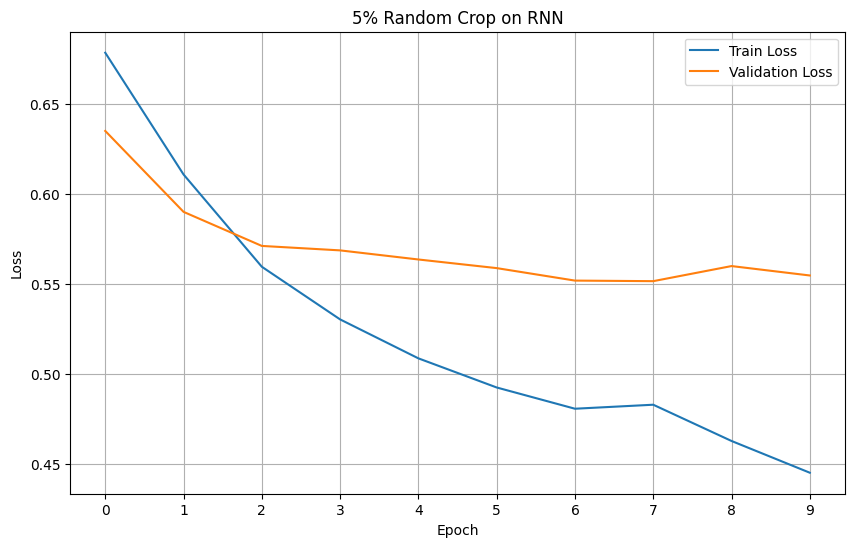

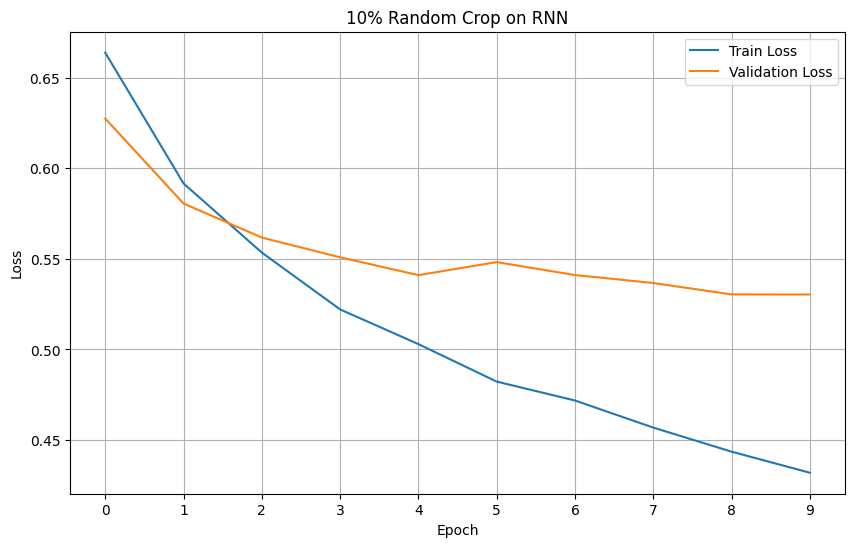

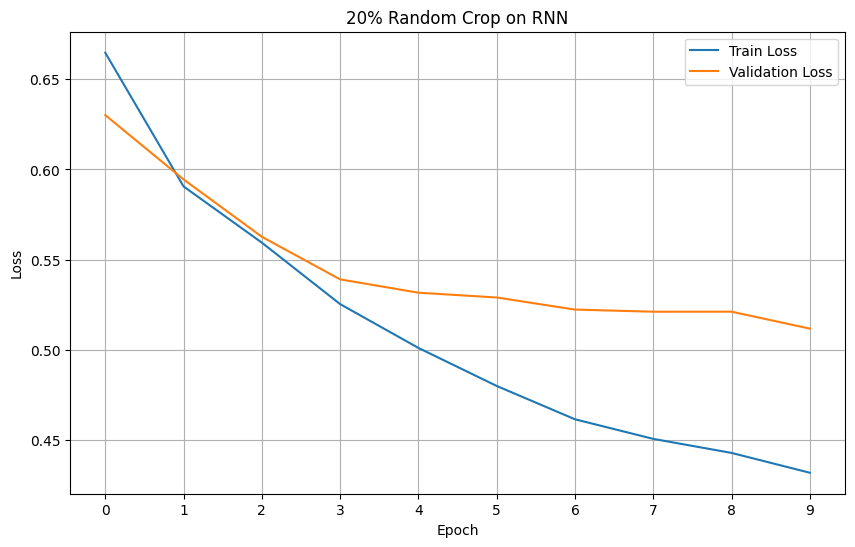

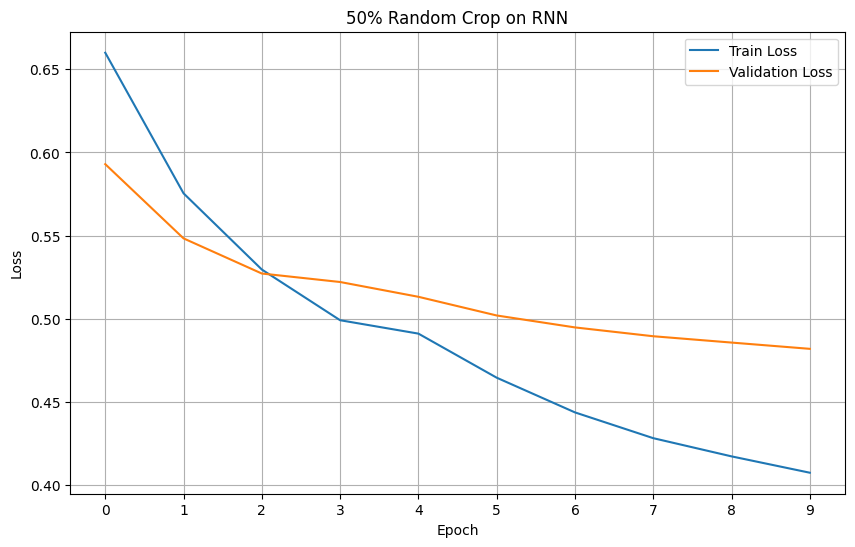

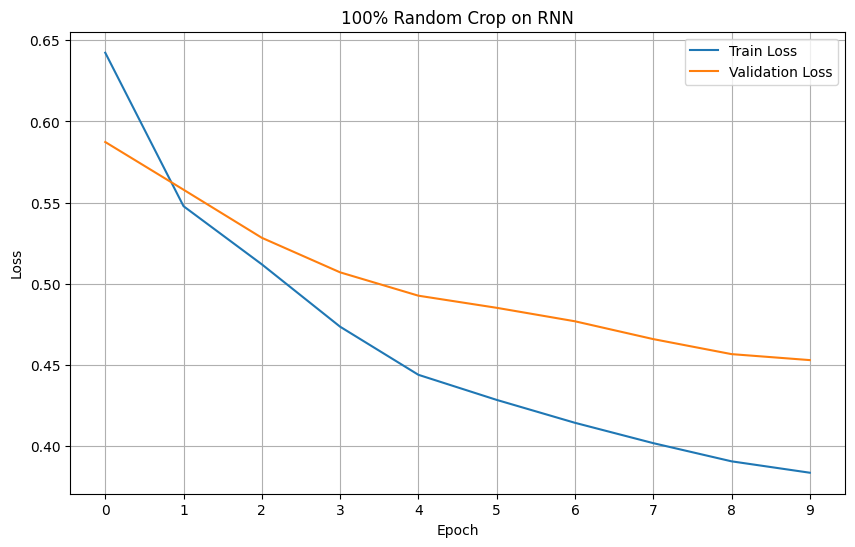

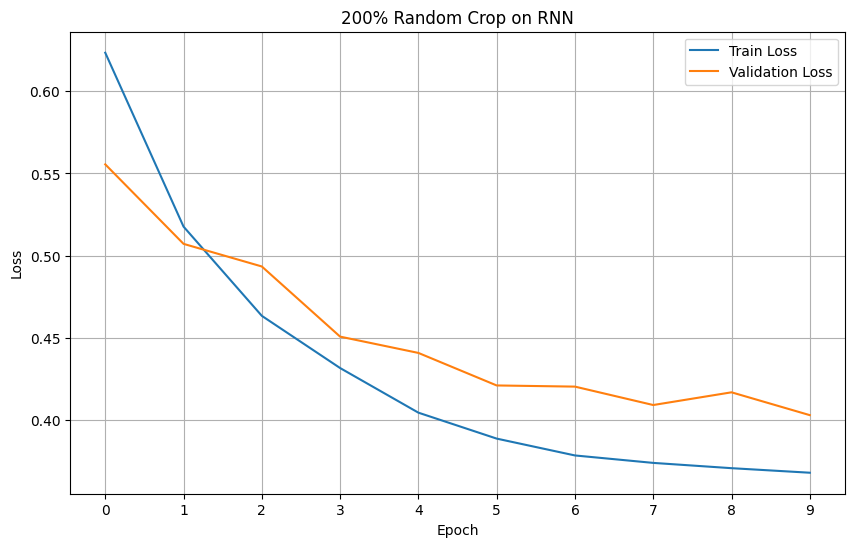

In [41]:
# Plot the acc graph
pipeline_random_5_CROP.plot_loss(title="5% Random Crop on RNN")
pipeline_random_10_CROP.plot_loss(title="10% Random Crop on RNN")
pipeline_random_20_CROP.plot_loss(title="20% Random Crop on RNN")
pipeline_random_50_CROP.plot_loss(title="50% Random Crop on RNN")
pipeline_random_100_CROP.plot_loss(title="100% Random Crop on RNN")
pipeline_random_200_CROP.plot_loss(title="200% Random Crop on RNN")

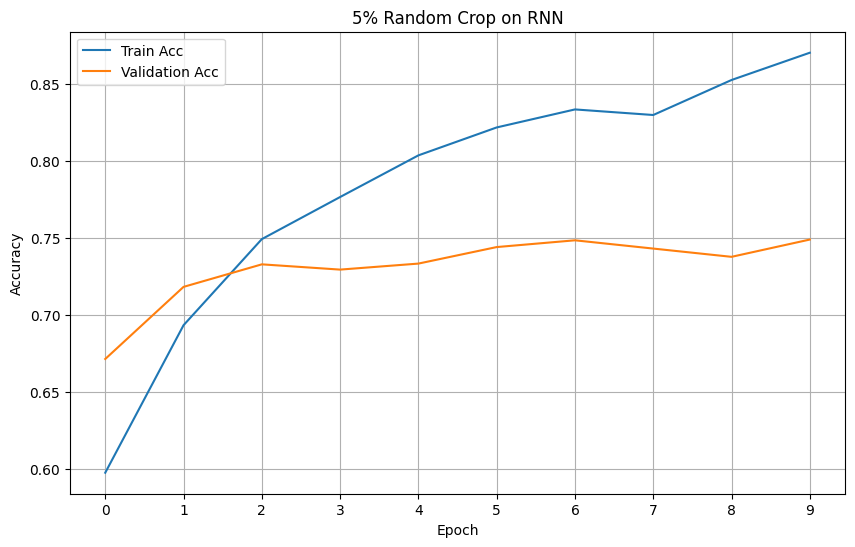

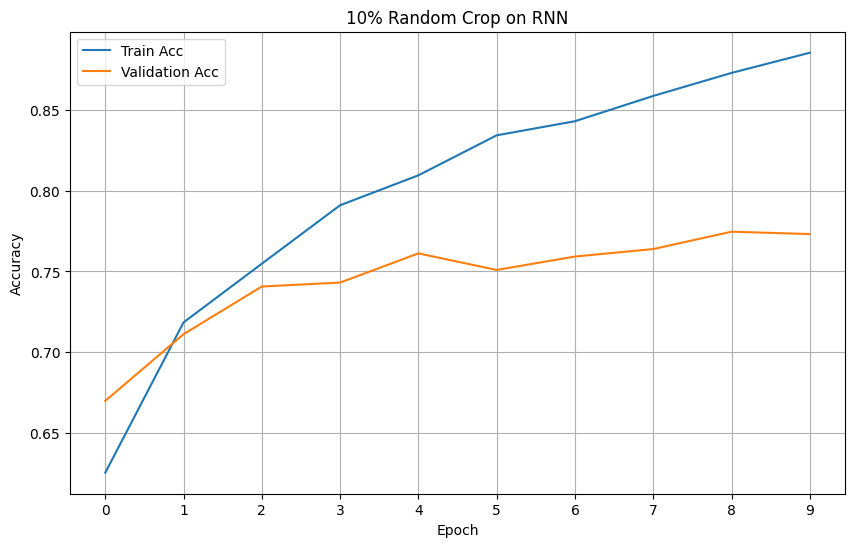

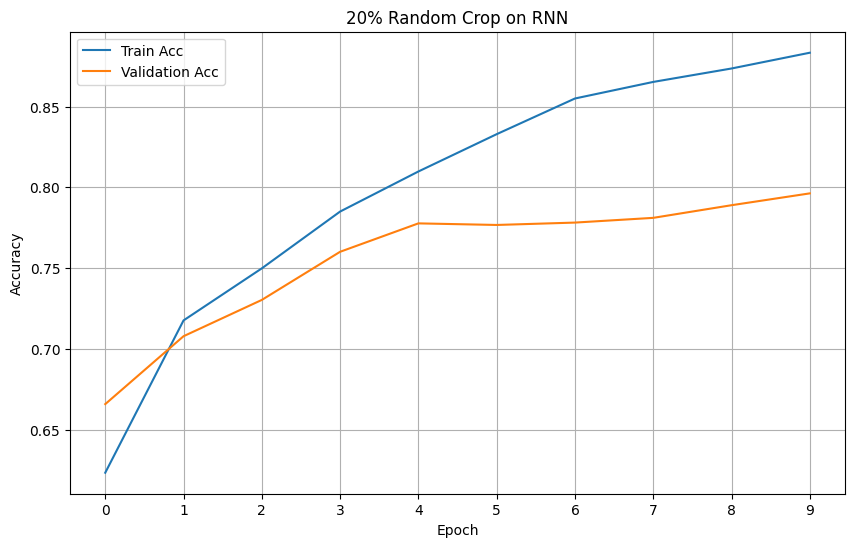

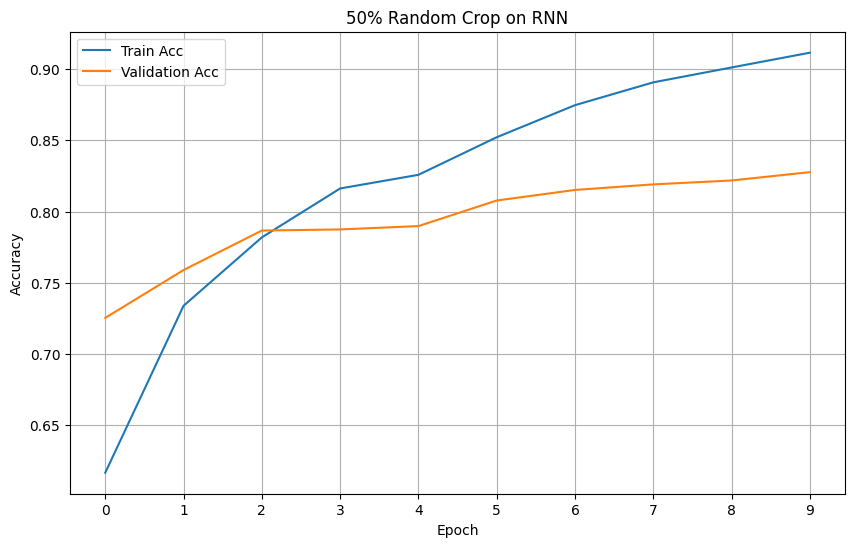

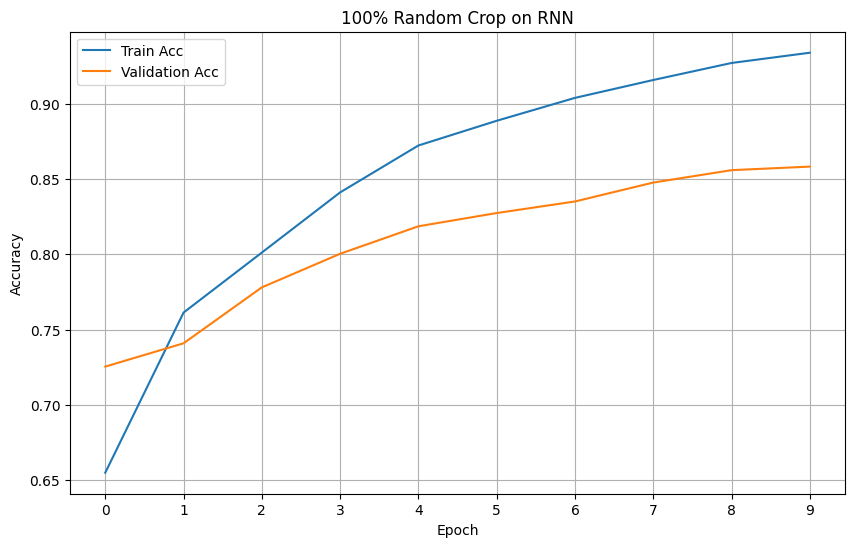

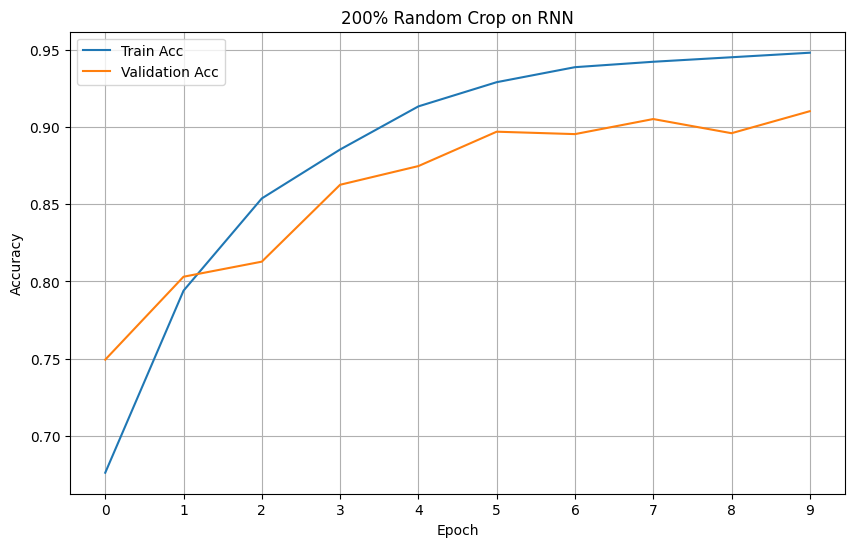

In [42]:
# Plot the acc graph
pipeline_random_5_CROP.plot_acc(title="5% Random Crop on RNN")
pipeline_random_10_CROP.plot_acc(title="10% Random Crop on RNN")
pipeline_random_20_CROP.plot_acc(title="20% Random Crop on RNN")
pipeline_random_50_CROP.plot_acc(title="50% Random Crop on RNN")
pipeline_random_100_CROP.plot_acc(title="100% Random Crop on RNN")
pipeline_random_200_CROP.plot_acc(title="200% Random Crop on RNN")

## Build and Train Pipelines - LSTM

In [43]:
pipeline_random_5_CROP_LSTM= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_10_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_20_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_50_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_50_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_100_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_100_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_200_CROP_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_200_CROP, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25586 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20468 [00:00<?, ? examples/s]

Map:   0%|          | 0/5118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [44]:
pipeline_random_5_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_10_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_20_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_50_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_100_CROP_LSTM.train_model(n_epochs=10)
pipeline_random_200_CROP_LSTM.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


Epoch: 1/10
Train Loss: 0.686, Train Acc: 0.555
Valid Loss: 0.646, Valid Acc: 0.653


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


Epoch: 2/10
Train Loss: 0.601, Train Acc: 0.694
Valid Loss: 0.587, Valid Acc: 0.710


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


Epoch: 3/10
Train Loss: 0.568, Train Acc: 0.731
Valid Loss: 0.582, Valid Acc: 0.717


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]


Epoch: 4/10
Train Loss: 0.537, Train Acc: 0.762
Valid Loss: 0.567, Valid Acc: 0.718


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


Epoch: 5/10
Train Loss: 0.518, Train Acc: 0.784
Valid Loss: 0.571, Valid Acc: 0.724


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


Epoch: 6/10
Train Loss: 0.505, Train Acc: 0.803
Valid Loss: 0.559, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]


Epoch: 7/10
Train Loss: 0.486, Train Acc: 0.821
Valid Loss: 0.556, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]


Epoch: 8/10
Train Loss: 0.471, Train Acc: 0.839
Valid Loss: 0.563, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


Epoch: 9/10
Train Loss: 0.463, Train Acc: 0.847
Valid Loss: 0.552, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]


Epoch: 10/10
Train Loss: 0.457, Train Acc: 0.852
Valid Loss: 0.558, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]


Epoch: 1/10
Train Loss: 0.679, Train Acc: 0.591
Valid Loss: 0.630, Valid Acc: 0.657


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


Epoch: 2/10
Train Loss: 0.601, Train Acc: 0.686
Valid Loss: 0.574, Valid Acc: 0.727


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]


Epoch: 3/10
Train Loss: 0.589, Train Acc: 0.710
Valid Loss: 0.559, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


Epoch: 4/10
Train Loss: 0.565, Train Acc: 0.737
Valid Loss: 0.545, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]


Epoch: 5/10
Train Loss: 0.526, Train Acc: 0.774
Valid Loss: 0.532, Valid Acc: 0.763


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


Epoch: 6/10
Train Loss: 0.542, Train Acc: 0.768
Valid Loss: 0.652, Valid Acc: 0.662


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


Epoch: 7/10
Train Loss: 0.615, Train Acc: 0.699
Valid Loss: 0.680, Valid Acc: 0.631


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]


Epoch: 8/10
Train Loss: 0.719, Train Acc: 0.594
Valid Loss: 0.788, Valid Acc: 0.525


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


Epoch: 9/10
Train Loss: 0.737, Train Acc: 0.566
Valid Loss: 0.668, Valid Acc: 0.591


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


Epoch: 10/10
Train Loss: 0.579, Train Acc: 0.713
Valid Loss: 0.605, Valid Acc: 0.702


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]


Epoch: 1/10
Train Loss: 0.684, Train Acc: 0.565
Valid Loss: 0.644, Valid Acc: 0.629


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]


Epoch: 2/10
Train Loss: 0.603, Train Acc: 0.697
Valid Loss: 0.581, Valid Acc: 0.713


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]


Epoch: 3/10
Train Loss: 0.551, Train Acc: 0.749
Valid Loss: 0.548, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]


Epoch: 4/10
Train Loss: 0.518, Train Acc: 0.783
Valid Loss: 0.560, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]


Epoch: 5/10
Train Loss: 0.496, Train Acc: 0.809
Valid Loss: 0.534, Valid Acc: 0.765


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]


Epoch: 6/10
Train Loss: 0.476, Train Acc: 0.831
Valid Loss: 0.534, Valid Acc: 0.770


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]


Epoch: 7/10
Train Loss: 0.462, Train Acc: 0.848
Valid Loss: 0.529, Valid Acc: 0.781


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]


Epoch: 8/10
Train Loss: 0.451, Train Acc: 0.860
Valid Loss: 0.529, Valid Acc: 0.775


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]


Epoch: 9/10
Train Loss: 0.442, Train Acc: 0.870
Valid Loss: 0.532, Valid Acc: 0.778


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]


Epoch: 10/10
Train Loss: 0.433, Train Acc: 0.879
Valid Loss: 0.524, Valid Acc: 0.784


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


Epoch: 1/10
Train Loss: 0.681, Train Acc: 0.577
Valid Loss: 0.634, Valid Acc: 0.650


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


Epoch: 2/10
Train Loss: 0.575, Train Acc: 0.728
Valid Loss: 0.584, Valid Acc: 0.718


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


Epoch: 3/10
Train Loss: 0.530, Train Acc: 0.769
Valid Loss: 0.551, Valid Acc: 0.753


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


Epoch: 4/10
Train Loss: 0.505, Train Acc: 0.802
Valid Loss: 0.531, Valid Acc: 0.767


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]


Epoch: 5/10
Train Loss: 0.482, Train Acc: 0.828
Valid Loss: 0.527, Valid Acc: 0.780


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


Epoch: 6/10
Train Loss: 0.462, Train Acc: 0.847
Valid Loss: 0.526, Valid Acc: 0.782


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


Epoch: 7/10
Train Loss: 0.449, Train Acc: 0.864
Valid Loss: 0.512, Valid Acc: 0.796


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]


Epoch: 8/10
Train Loss: 0.446, Train Acc: 0.865
Valid Loss: 0.565, Valid Acc: 0.742


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


Epoch: 9/10
Train Loss: 0.469, Train Acc: 0.842
Valid Loss: 0.521, Valid Acc: 0.792


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]


Epoch: 10/10
Train Loss: 0.483, Train Acc: 0.829
Valid Loss: 0.552, Valid Acc: 0.757


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]


Epoch: 1/10
Train Loss: 0.659, Train Acc: 0.606
Valid Loss: 0.578, Valid Acc: 0.718


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]


Epoch: 2/10
Train Loss: 0.550, Train Acc: 0.750
Valid Loss: 0.562, Valid Acc: 0.738


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]


Epoch: 3/10
Train Loss: 0.515, Train Acc: 0.792
Valid Loss: 0.525, Valid Acc: 0.779


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]


Epoch: 4/10
Train Loss: 0.481, Train Acc: 0.827
Valid Loss: 0.509, Valid Acc: 0.797


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]


Epoch: 5/10
Train Loss: 0.474, Train Acc: 0.834
Valid Loss: 0.510, Valid Acc: 0.798


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]


Epoch: 6/10
Train Loss: 0.461, Train Acc: 0.849
Valid Loss: 0.496, Valid Acc: 0.812


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


Epoch: 7/10
Train Loss: 0.443, Train Acc: 0.867
Valid Loss: 0.501, Valid Acc: 0.803


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]


Epoch: 8/10
Train Loss: 0.433, Train Acc: 0.879
Valid Loss: 0.487, Valid Acc: 0.825


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]


Epoch: 9/10
Train Loss: 0.425, Train Acc: 0.888
Valid Loss: 0.495, Valid Acc: 0.815


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Epoch: 10/10
Train Loss: 0.423, Train Acc: 0.889
Valid Loss: 0.486, Valid Acc: 0.824


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


Epoch: 1/10
Train Loss: 0.633, Train Acc: 0.628
Valid Loss: 0.558, Valid Acc: 0.721


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]


Epoch: 2/10
Train Loss: 0.541, Train Acc: 0.756
Valid Loss: 0.562, Valid Acc: 0.746


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


Epoch: 3/10
Train Loss: 0.505, Train Acc: 0.800
Valid Loss: 0.493, Valid Acc: 0.812


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


Epoch: 4/10
Train Loss: 0.460, Train Acc: 0.850
Valid Loss: 0.467, Valid Acc: 0.844


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


Epoch: 5/10
Train Loss: 0.436, Train Acc: 0.877
Valid Loss: 0.468, Valid Acc: 0.839


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


Epoch: 6/10
Train Loss: 0.424, Train Acc: 0.888
Valid Loss: 0.448, Valid Acc: 0.861


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]


Epoch: 7/10
Train Loss: 0.411, Train Acc: 0.902
Valid Loss: 0.438, Valid Acc: 0.876


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


Epoch: 8/10
Train Loss: 0.412, Train Acc: 0.900
Valid Loss: 0.481, Valid Acc: 0.832


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]


Epoch: 9/10
Train Loss: 0.405, Train Acc: 0.908
Valid Loss: 0.438, Valid Acc: 0.873


evaluating...: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

Epoch: 10/10
Train Loss: 0.397, Train Acc: 0.916
Valid Loss: 0.429, Valid Acc: 0.883


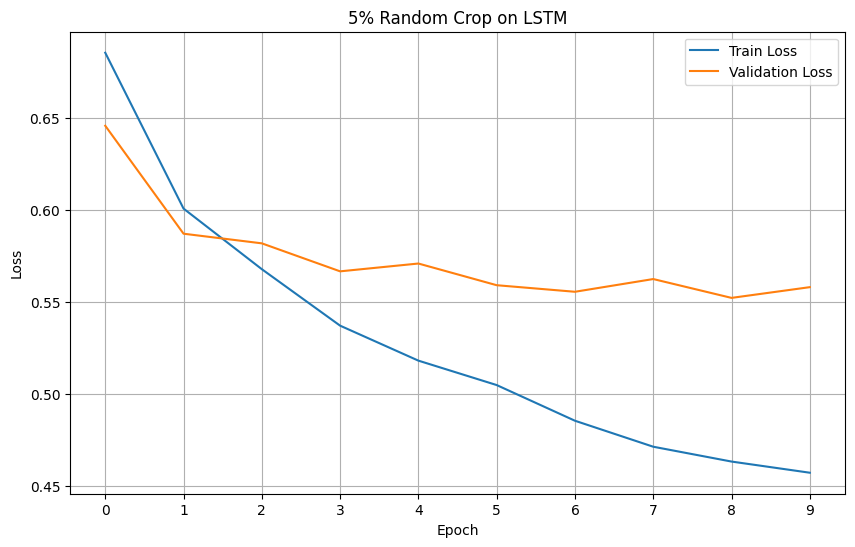

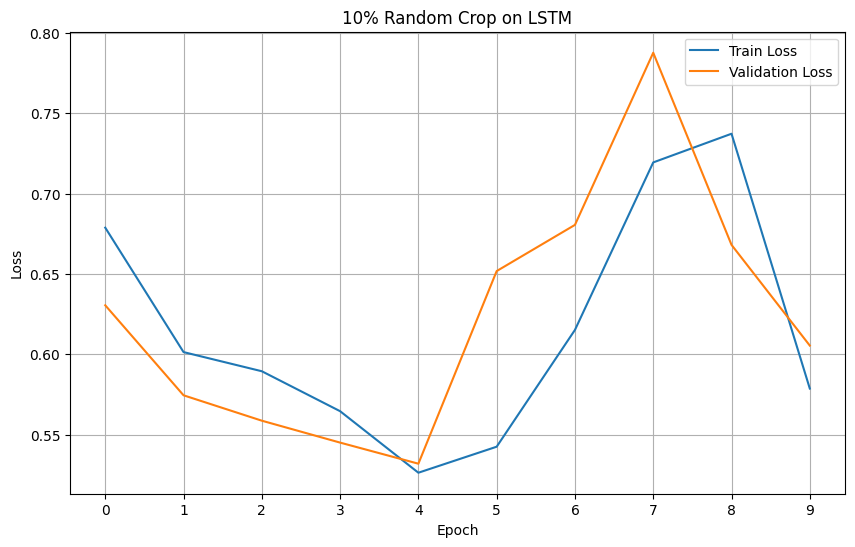

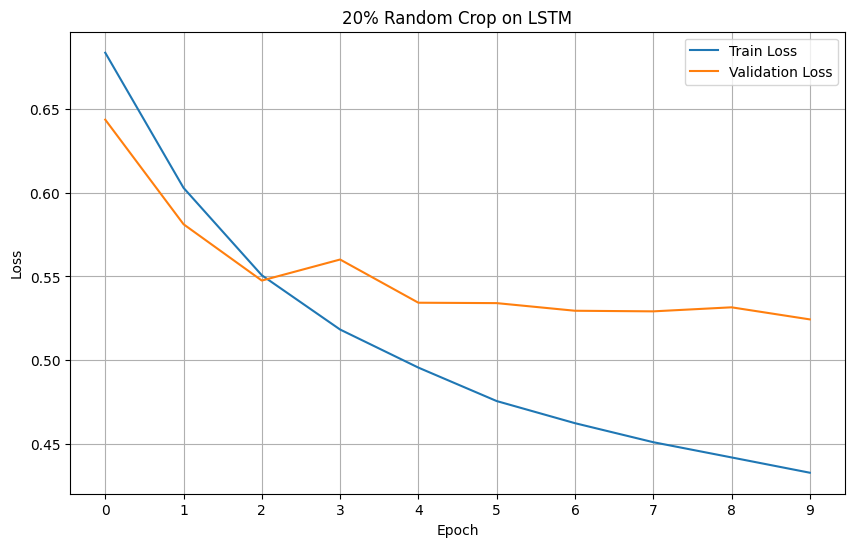

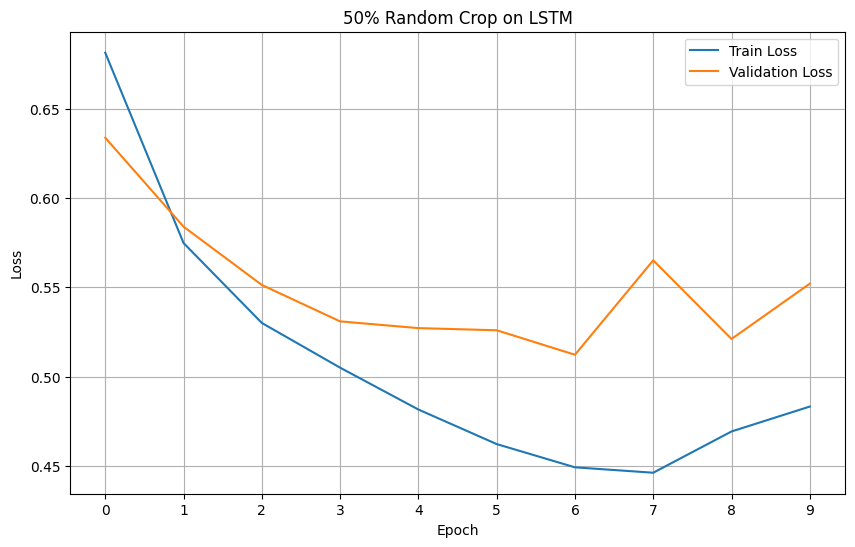

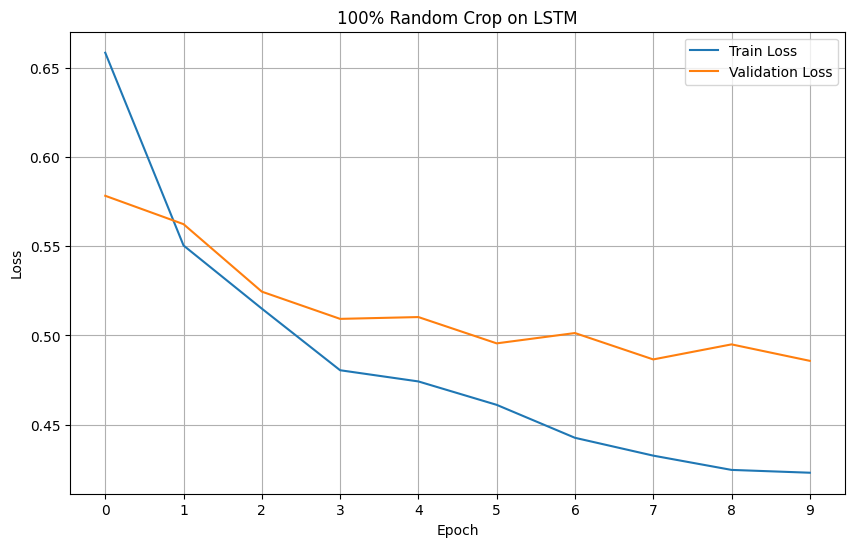

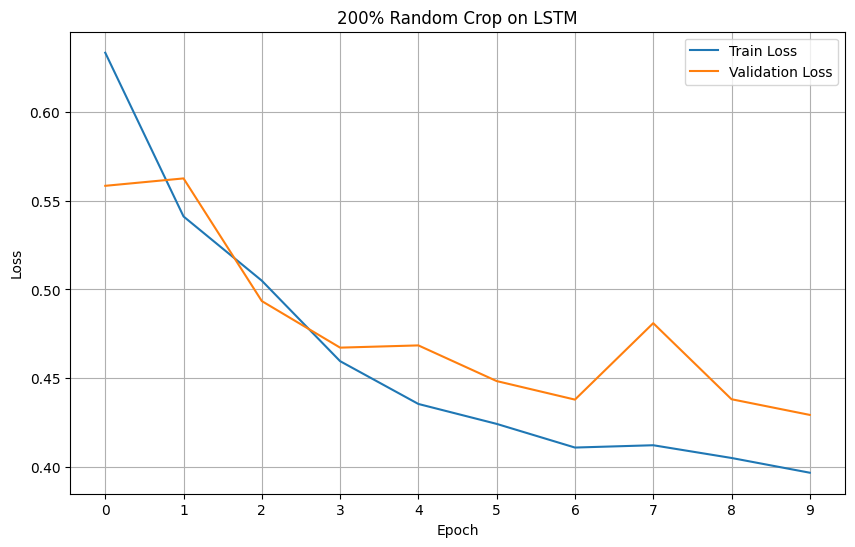

In [45]:
pipeline_random_5_CROP_LSTM.plot_loss(title="5% Random Crop on LSTM")
pipeline_random_10_CROP_LSTM.plot_loss(title="10% Random Crop on LSTM")
pipeline_random_20_CROP_LSTM.plot_loss(title="20% Random Crop on LSTM")
pipeline_random_50_CROP_LSTM.plot_loss(title="50% Random Crop on LSTM")
pipeline_random_100_CROP_LSTM.plot_loss(title="100% Random Crop on LSTM")
pipeline_random_200_CROP_LSTM.plot_loss(title="200% Random Crop on LSTM")

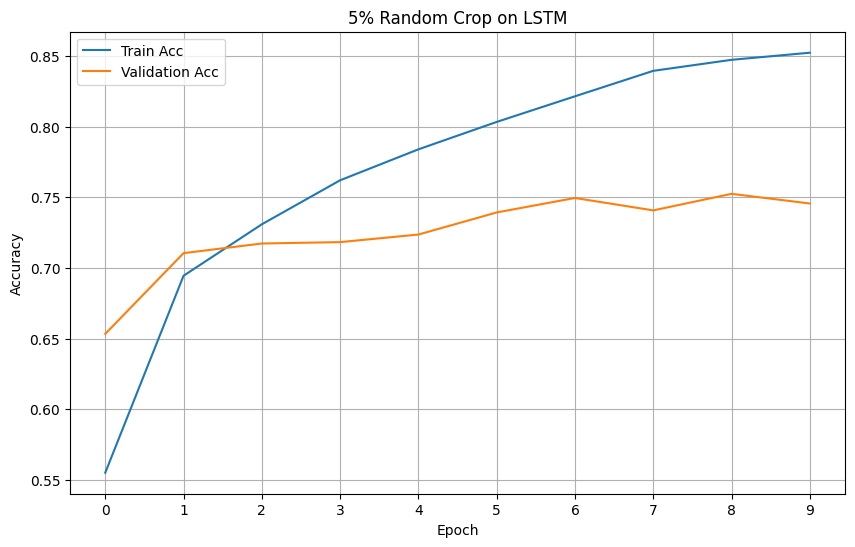

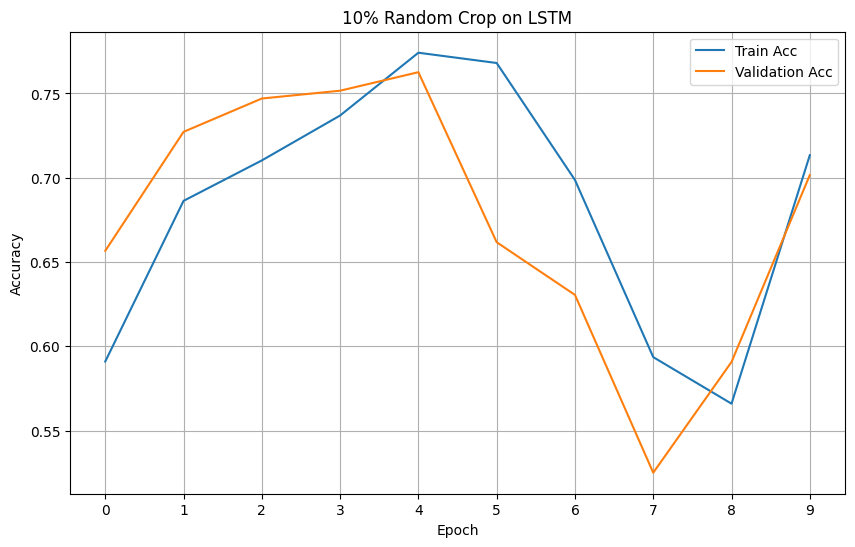

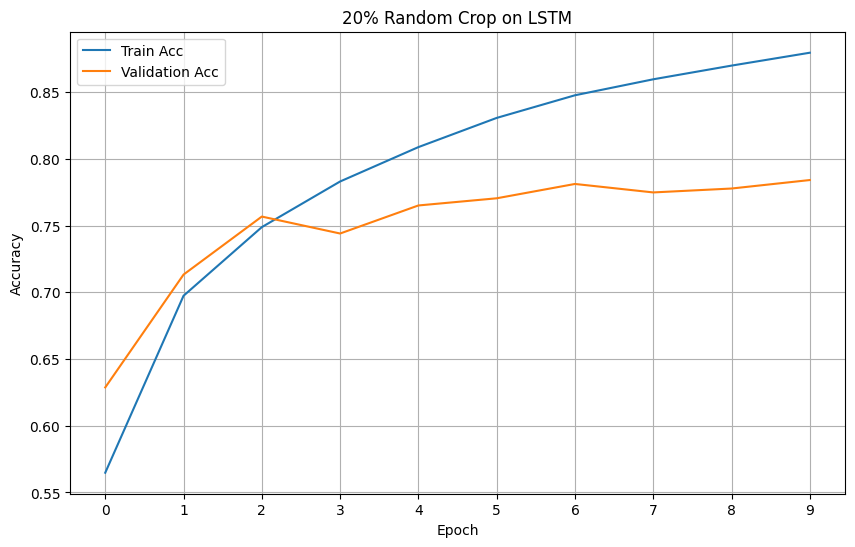

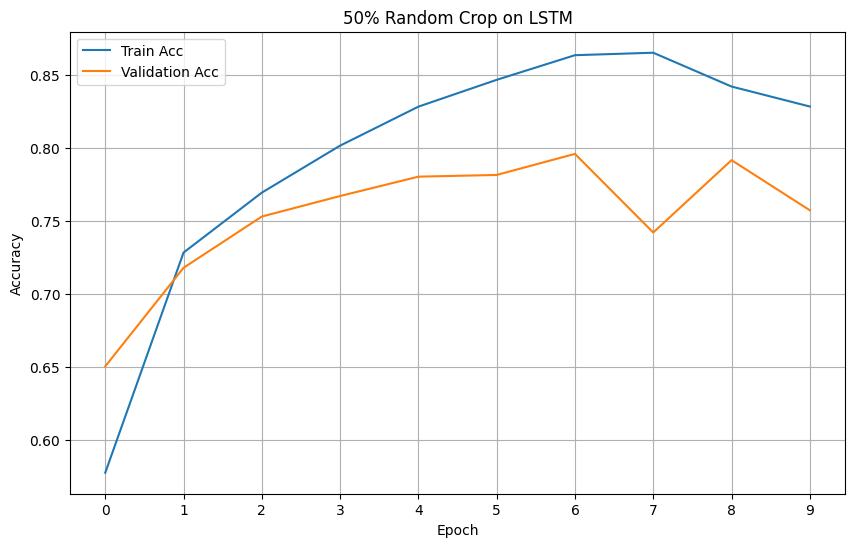

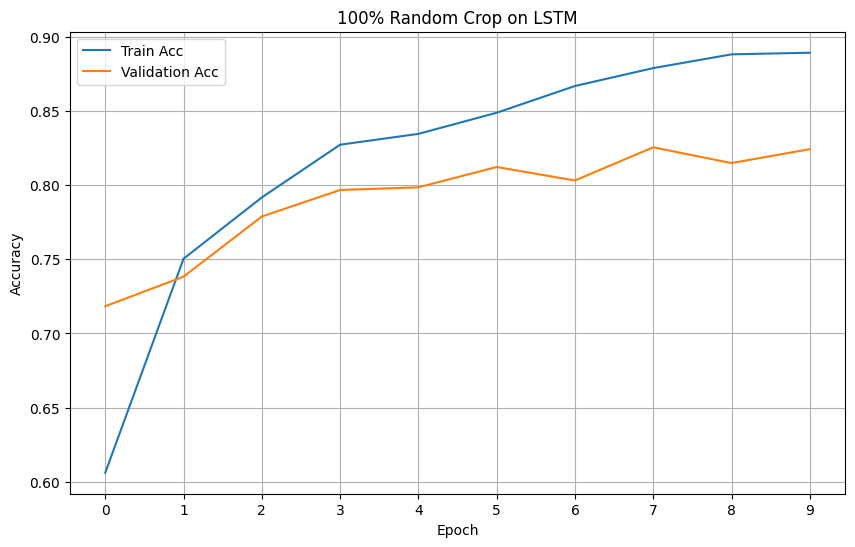

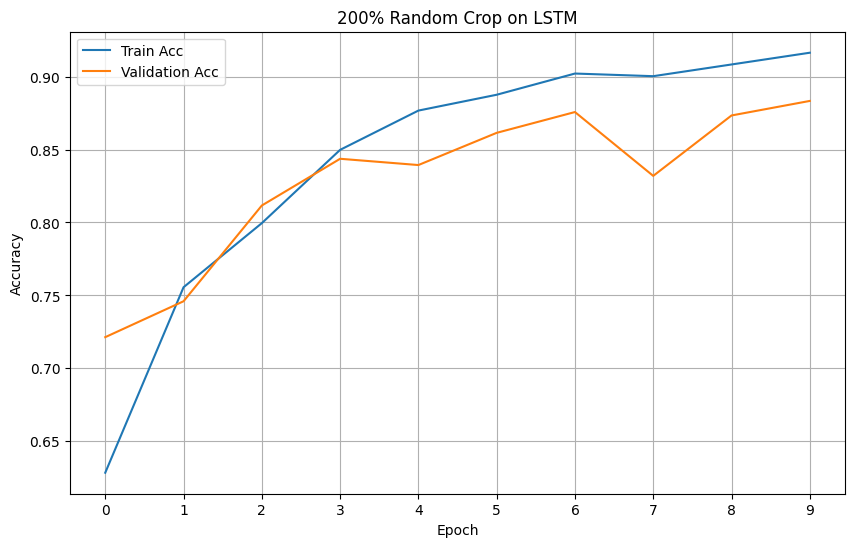

In [46]:
pipeline_random_5_CROP_LSTM.plot_acc(title="5% Random Crop on LSTM")
pipeline_random_10_CROP_LSTM.plot_acc(title="10% Random Crop on LSTM")
pipeline_random_20_CROP_LSTM.plot_acc(title="20% Random Crop on LSTM")
pipeline_random_50_CROP_LSTM.plot_acc(title="50% Random Crop on LSTM")
pipeline_random_100_CROP_LSTM.plot_acc(title="100% Random Crop on LSTM")
pipeline_random_200_CROP_LSTM.plot_acc(title="200% Random Crop on LSTM")